# Actividad: Clasificación con máquina de vectores de soporte y redes de neuronas

Nombre: Joel Elí Orellana Martínez

## 1. Descripción de la actividad:

El conjunto de datos con el cual vamos a trabajar se encuentra en el siguiente enlace y se puede descargar junto con la descripción de la actividad. 

https://www.kaggle.com/bricevergnou/spotify-recommendation

Contiene la información necesaria sobre los datos, la variable respuesta es «liked»

### Tareas a realizar:

1. Análisis descriptivo de los datos:
* De las variables numéricas, hallar datos estadísticos.
* Crear matriz de correlaciones existentes entre las variables numéricas del conjunto de datos, analiza los resultados. 

2. Aplicar el algoritmo de máquina de vectores de soporte y redes neuronales. Decidir los parámetros de cada uno y justificar su conveniencia.
* Comparar, mediante las medidas que le parezcan adecuadas, la capacidad predictiva de ambos métodos. 
* Comentar las ventajas y desventajas de cada modelo. De acuerdo con los resultados, ¿son realmente útiles los modelos creados para el conjunto de datos propuesto? 

3. Otros comentarios.

### 2. Data features (Características de los datos)

Tomados del respositorio de GitHub basada en la documentación API de Spotify: 

* acousticness : A confidence measure from 0.0 to 1.0 of whether the track is acoustic. 1.0 represents high confidence the track is acoustic.

* danceability : Danceability describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. A value of 0.0 is least danceable and 1.0 is most danceable.

* duration_ms : The duration of the track in milliseconds.

* energy : Energy is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity. Typically, energetic tracks feel fast, loud, and noisy. For example, death metal has high energy, while a Bach prelude scores low on the scale. Perceptual features contributing to this attribute include dynamic range, perceived loudness, timbre, onset rate, and general entropy.

* instrumentalness : Predicts whether a track contains no vocals. “Ooh” and “aah” sounds are treated as instrumental in this context. Rap or spoken word tracks are clearly “vocal”. The closer the instrumentalness value is to 1.0, the greater likelihood the track contains no vocal content. Values above 0.5 are intended to represent instrumental tracks, but confidence is higher as the value approaches 1.0.

* key : The key the track is in. Integers map to pitches using standard Pitch Class notation . E.g. 0 = C, 1 = C♯/D♭, 2 = D, and so on.
* liveness : Detects the presence of an audience in the recording. Higher liveness values represent an increased probability that the track was performed live. A value above 0.8 provides strong likelihood that the track is live.
* loudness : The overall loudness of a track in decibels (dB). Loudness values are averaged across the entire track and are useful for comparing relative loudness of tracks. Loudness is the quality of a sound that is the primary psychological correlate of physical strength (amplitude). Values typical range between -60 and 0 db.
* mode : Mode indicates the modality (major or minor) of a track, the type of scale from which its melodic content is derived. Major is represented by 1 and minor is 0.
* speechiness : Speechiness detects the presence of spoken words in a track. The more exclusively speech-like the recording (e.g. talk show, audio book, poetry), the closer to 1.0 the attribute value. Values above 0.66 describe tracks that are probably made entirely of spoken words. Values between 0.33 and 0.66 describe tracks that may contain both music and speech, either in sections or layered, including such cases as rap music. Values below 0.33 most likely represent music and other non-speech-like tracks.
* tempo : The overall estimated tempo of a track in beats per minute (BPM). In musical terminology, tempo is the speed or pace of a given piece and derives directly from the average beat duration.
* time_signature : An estimated overall time signature of a track. The time signature (meter) is a notational convention to specify how many beats are in each bar (or measure).
* valence : A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry).

Y la variable a predecir:

* liked : 1 for liked songs , 0 for disliked songs

### 3. Importación de librerías y estudio de las características del dataset

In [1]:
# Importando las librerías a usar para esta parte
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
# Obteniendo el dataset
df = pd.read_csv('data.csv')
df.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,liked
0,0.803,0.6240,7,-6.764,0,0.0477,0.451,0.000734,0.1000,0.6280,95.968,304524,4,0
1,0.762,0.7030,10,-7.951,0,0.3060,0.206,0.000000,0.0912,0.5190,151.329,247178,4,1
2,0.261,0.0149,1,-27.528,1,0.0419,0.992,0.897000,0.1020,0.0382,75.296,286987,4,0
3,0.722,0.7360,3,-6.994,0,0.0585,0.431,0.000001,0.1230,0.5820,89.860,208920,4,1
4,0.787,0.5720,1,-7.516,1,0.2220,0.145,0.000000,0.0753,0.6470,155.117,179413,4,1


In [3]:
# analizando las principales medidas de tendencia para el dataset:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
danceability,195.0,0.636656,0.216614,0.130000,0.4625,0.705000,0.7990,0.946
energy,195.0,0.638431,0.260096,0.002400,0.5335,0.659000,0.8375,0.996
key,195.0,5.497436,3.415209,0.000000,2.0000,6.000000,8.0000,11.000
loudness,195.0,-9.481631,6.525086,-42.261000,-9.9620,-7.766000,-5.8290,-2.336
mode,195.0,0.538462,0.499802,0.000000,0.0000,1.000000,1.0000,1.000
speechiness,195.0,0.148957,0.120414,0.027800,0.0568,0.096200,0.2305,0.540
acousticness,195.0,0.319093,0.320782,0.000003,0.0422,0.213000,0.5040,0.995
instrumentalness,195.0,0.192337,0.346226,0.000000,0.0000,0.000008,0.0975,0.969
liveness,195.0,0.148455,0.105975,0.033100,0.0840,0.105000,0.1770,0.633
valence,195.0,0.493632,0.267695,0.035300,0.2690,0.525000,0.7175,0.980


In [4]:
# Revisando los tipos de datos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   danceability      195 non-null    float64
 1   energy            195 non-null    float64
 2   key               195 non-null    int64  
 3   loudness          195 non-null    float64
 4   mode              195 non-null    int64  
 5   speechiness       195 non-null    float64
 6   acousticness      195 non-null    float64
 7   instrumentalness  195 non-null    float64
 8   liveness          195 non-null    float64
 9   valence           195 non-null    float64
 10  tempo             195 non-null    float64
 11  duration_ms       195 non-null    int64  
 12  time_signature    195 non-null    int64  
 13  liked             195 non-null    int64  
dtypes: float64(9), int64(5)
memory usage: 21.5 KB


In [5]:
# de info se puede observar dos aspectos:
# 1. Los datos son numéricos de tipo flotante o entero
# 2. No existe ningún valor nulo, esto lo podemos verificar con:
df.isnull().sum()

danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
duration_ms         0
time_signature      0
liked               0
dtype: int64

In [6]:
# Al leer la descripción del dataset podemos intuir que la columna key, es un dato
# categórico que indica en que clave musical está la pista de musica
# analizando esta variable:
df.key.value_counts()

1     30
8     22
6     20
7     19
9     18
5     18
10    17
2     15
0     12
11    10
4      9
3      5
Name: key, dtype: int64

<AxesSubplot: xlabel='key', ylabel='count'>

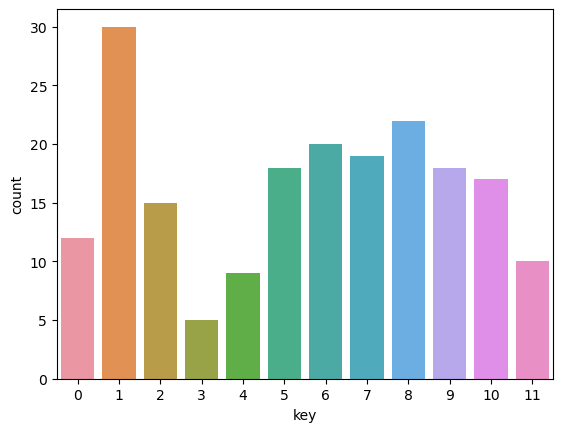

In [7]:
# Observamos que los datos coinciden con las 12 notas musicales
# de 0 a 11, visualicemos mejor la variable:
sns.countplot(x=df.key)

<AxesSubplot: xlabel='mode', ylabel='count'>

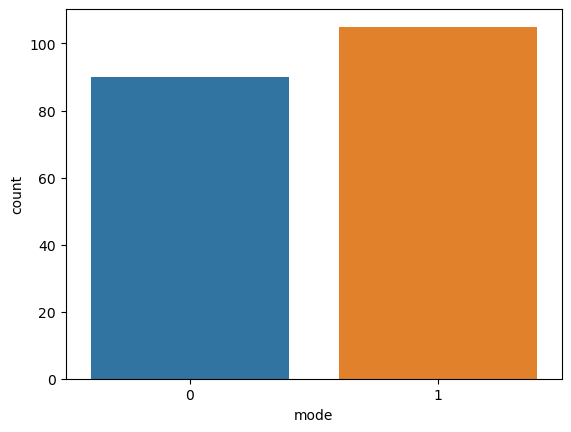

In [8]:
# analicemos otra variable categórica binaria, en este caso "mode"
# mode indica la escala del ritmo "mayor" o "menor"
sns.countplot(x=df['mode'])

In [9]:
# hay una distribución aproximadamente equilibrada de los modos en el dataset
# analicemos ahora la correlación general entre las variables:
df.corr()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,liked
danceability,1.000000,0.137188,-0.063906,0.455078,0.043759,0.388596,-0.234176,-0.807053,-0.137069,0.612344,0.223522,-0.232621,0.317096,0.569425
energy,0.137188,1.000000,0.130251,0.813567,-0.068308,0.122825,-0.772583,-0.241444,0.166508,0.319409,0.214905,-0.134527,0.123942,0.176179
key,-0.063906,0.130251,1.000000,0.046865,-0.103371,-0.093395,-0.066844,0.003597,-0.039622,0.033336,0.097240,0.054522,0.048344,-0.044406
loudness,0.455078,0.813567,0.046865,1.000000,-0.041678,0.279710,-0.664989,-0.538266,0.078093,0.363532,0.274462,-0.206334,0.207806,0.410774
mode,0.043759,-0.068308,-0.103371,-0.041678,1.000000,0.031953,-0.025709,0.075442,-0.048661,0.033409,-0.036270,-0.060965,-0.110739,0.023747
speechiness,0.388596,0.122825,-0.093395,0.279710,0.031953,1.000000,-0.079710,-0.343242,-0.006665,0.180708,0.313918,-0.388397,0.140325,0.591505
acousticness,-0.234176,-0.772583,-0.066844,-0.664989,-0.025709,-0.079710,1.000000,0.294320,-0.140988,-0.313806,-0.255097,0.138793,-0.142177,-0.179375
instrumentalness,-0.807053,-0.241444,0.003597,-0.538266,0.075442,-0.343242,0.294320,1.000000,0.055730,-0.572224,-0.299493,0.249683,-0.375199,-0.569440
liveness,-0.137069,0.166508,-0.039622,0.078093,-0.048661,-0.006665,-0.140988,0.055730,1.000000,-0.013004,-0.010555,-0.143966,-0.135409,-0.009797
valence,0.612344,0.319409,0.033336,0.363532,0.033409,0.180708,-0.313806,-0.572224,-0.013004,1.000000,0.218017,-0.114842,0.201111,0.268653


<AxesSubplot: >

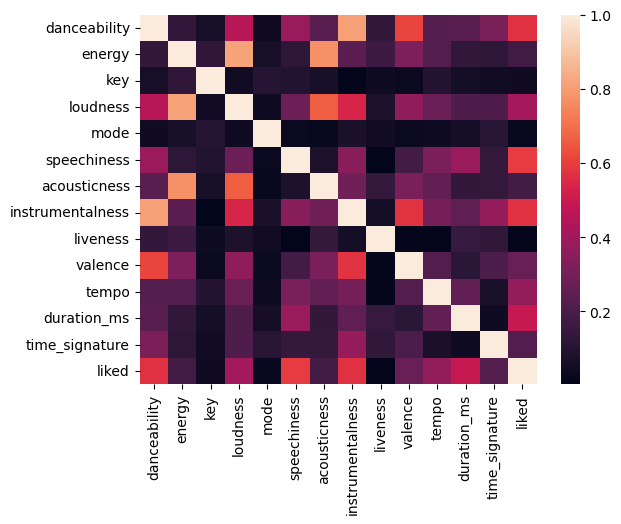

In [10]:
# no existe ninguna correlación alta entre variables (0.9 o más)
# por lo que no se recomienda eliminar ninguna columna
# veamos visualmente el mapa de correlaciones:
sns.heatmap(abs(df.corr()))
# el valor absoluto solamente es para visualizar la escala de correlaciones
# de 0 a 1

In [11]:
# analicemos detenidamente la correlación entre "liked", la variable a predecir
# y las demas columnas
abs(df.corr())['liked'].sort_values(ascending=False)[1:]
# se toman solamente las correlaciones en valor absoluto
# se ordenan de mayor a menor
# se elimina la correlación de la variable "liked" con ella misma  (por ser 1.0)

speechiness         0.591505
instrumentalness    0.569440
danceability        0.569425
duration_ms         0.490651
loudness            0.410774
tempo               0.371202
valence             0.268653
time_signature      0.221479
acousticness        0.179375
energy              0.176179
key                 0.044406
mode                0.023747
liveness            0.009797
Name: liked, dtype: float64

<AxesSubplot: >

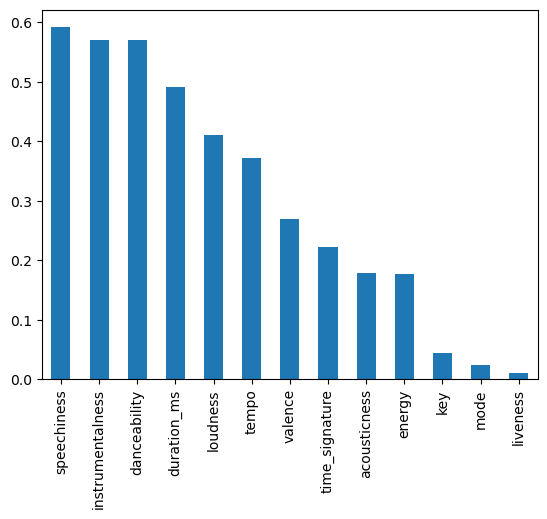

In [12]:
# no hay ninguna correlación alta con la variable a predecir
# hagamos un gráfico de las correlaciones con la variable de salida
abs(df.corr())['liked'].sort_values(ascending=False)[1:].plot(kind='bar')
# Se observa que la mayor correlación con liked es apróximadamente 0.6

<AxesSubplot: xlabel='duration_ms', ylabel='Count'>

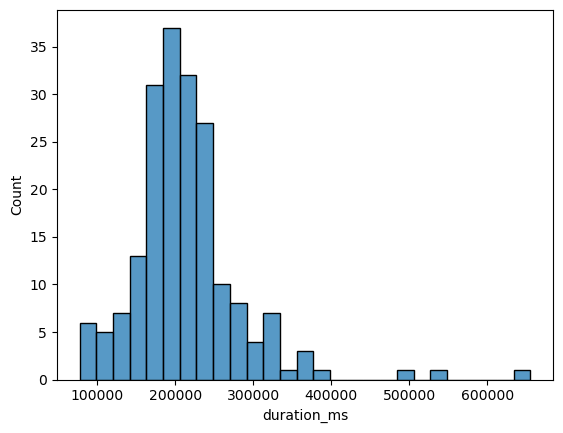

In [13]:
# la variable "duration_ms" tiene un valor máximo que sobrepasa
# casi 3 veces el valor del tercer cuartil
# esto se puede ver de df.describe().T
# una visualización de los datos será así:
sns.histplot(x='duration_ms', data=df)

In [14]:
# hay canciones cuya duración en ms sobrepasan la de las demás
# canciones del dataset
# vamos a identificar esas canciones:
df[df.duration_ms > 400000]

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,liked
86,0.263,0.202,1,-17.687,1,0.0408,0.9840,0.905,0.0890,0.120,71.462,545747,4,0
89,0.780,0.551,5,-13.038,0,0.0625,0.0613,0.104,0.0331,0.969,126.009,491933,4,0
93,0.798,0.746,10,-8.639,1,0.0313,0.0304,0.361,0.0703,0.965,128.553,655213,4,0


In [15]:
# eliminando los outliers:
# la eliminación procede por que son tres canciones lo suficientemente separadas de la distribución casi normal 
# de la duración
df = df.drop(labels=[86, 89, 93], axis=0)
df.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,liked
0,0.803,0.6240,7,-6.764,0,0.0477,0.451,0.000734,0.1000,0.6280,95.968,304524,4,0
1,0.762,0.7030,10,-7.951,0,0.3060,0.206,0.000000,0.0912,0.5190,151.329,247178,4,1
2,0.261,0.0149,1,-27.528,1,0.0419,0.992,0.897000,0.1020,0.0382,75.296,286987,4,0
3,0.722,0.7360,3,-6.994,0,0.0585,0.431,0.000001,0.1230,0.5820,89.860,208920,4,1
4,0.787,0.5720,1,-7.516,1,0.2220,0.145,0.000000,0.0753,0.6470,155.117,179413,4,1


<AxesSubplot: xlabel='duration_ms', ylabel='Count'>

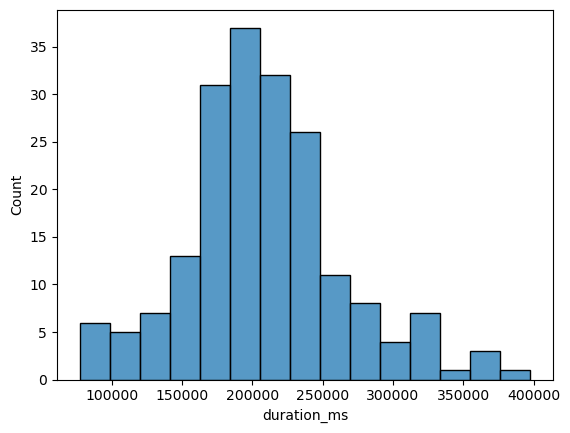

In [16]:
# visualizando nuevamente el histograma:
sns.histplot(x='duration_ms', data=df)

In [17]:
# analicemos otras variables en las que la media y la desviación típica son muy parecidas o incluso
# la desviación típica es mayor
df.describe().T

,count,mean,std,min,25%,50%,75%,max
danceability,192.0,0.637016,0.216064,0.130000,0.462750,0.705000,0.80050,0.946
energy,192.0,0.640600,0.260019,0.002400,0.533750,0.661000,0.83925,0.996
key,192.0,5.500000,3.410793,0.000000,2.000000,6.000000,8.00000,11.000
loudness,192.0,-9.424760,6.543684,-42.261000,-9.919250,-7.737000,-5.81050,-2.336
mode,192.0,0.536458,0.499973,0.000000,0.000000,1.000000,1.00000,1.000
speechiness,192.0,0.150584,0.120630,0.027800,0.057400,0.096750,0.23175,0.540
acousticness,192.0,0.318476,0.318462,0.000003,0.042200,0.217000,0.50150,0.995
instrumentalness,192.0,0.188207,0.344803,0.000000,0.000000,0.000006,0.04070,0.969
liveness,192.0,0.149773,0.106231,0.037700,0.084325,0.106000,0.17925,0.633
valence,192.0,0.490647,0.264007,0.035300,0.270000,0.523000,0.71300,0.980


In [18]:
# "speechiness", "instrumentalness", "acousticness" son variables que entran
# en esa categoría

<AxesSubplot: xlabel='speechiness', ylabel='Count'>

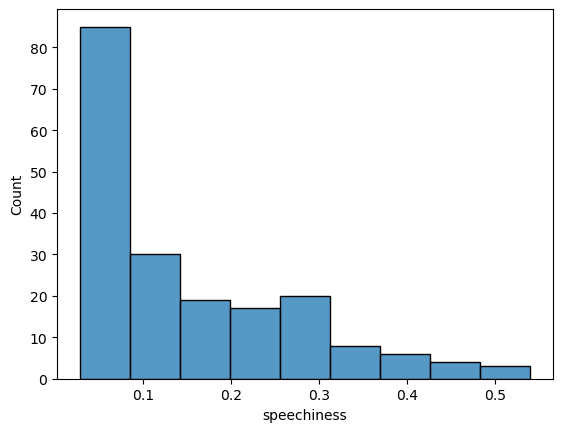

In [19]:
sns.histplot(x='speechiness', data=df)

In [20]:
# "speechiness" es la variable que indica la relación de palabras habladas
# con la duración de la canción, no se observan outliers y la correlación con la
# variable de salida es aceptable

<AxesSubplot: xlabel='instrumentalness', ylabel='Count'>

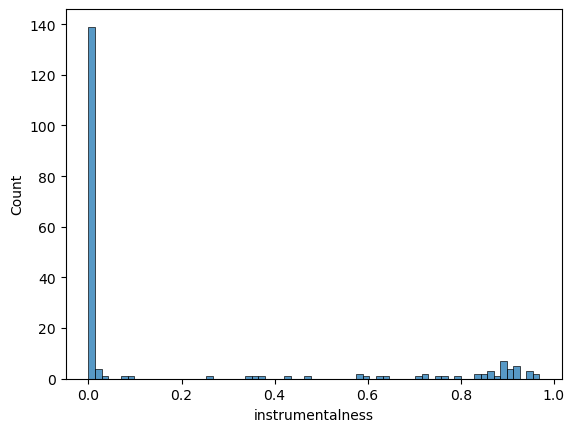

In [21]:
sns.histplot(x='instrumentalness', data=df)

In [22]:
# se observa que la variable instrumentalness 
# tiene una excesiva desviación de los datos hacia el valor de 0
# dicho comportamiento se aprecia mejor con un diagrama de caja

<AxesSubplot: >

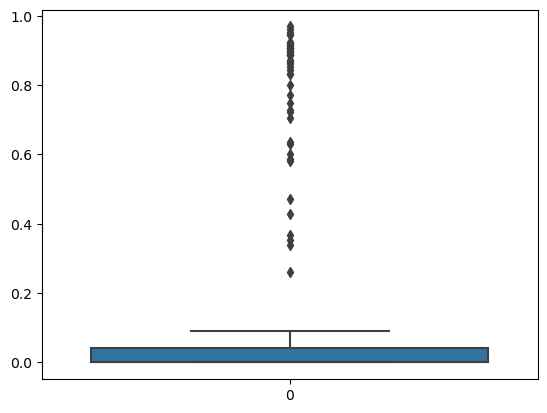

In [23]:
sns.boxplot(df.instrumentalness)

In [24]:
# esta columna podría recomendar eliminarse, aunque la correlación que tiene con la variable a predecir
# liked, hace que la dejemos en reserva. Sí es necesario, se procederá a la eliminación

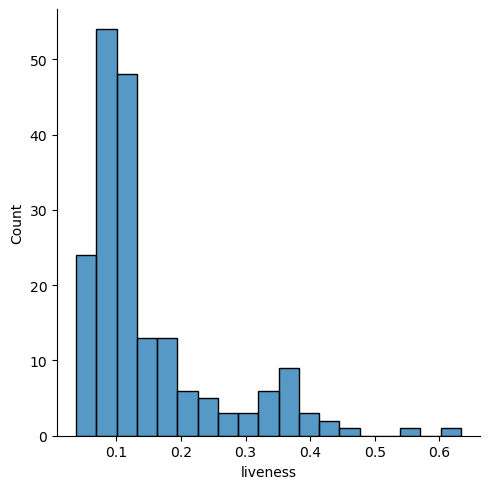

In [25]:
# analicemos la variable "liveness"
sns.displot(x=df.liveness)

In [26]:
# por la cercanía de los dos valores no los consideraremos como outliers

### 4. Tratamiento de las variables 

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
# Importando train_test_split para dividir en datos de entrenamiento y prueba
# sklearn recomienda escalar los datos para modelos de redes neuronales y support vector classifier
# por lo que importamos el escalador standard

In [28]:
X = df.drop('liked', axis=1)
y = df.liked
# tomamos como variable a predecir "y" liked
# todas las demás variables del dataframe serán X

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101,)
# dividimos los datos en 75% entrenamiento, 25% prueba
# usamos una semilla aleatoria para poder dar replicabilidad al experimento
# hacemos orden aleatorio de filas con shuffle= True para tener aun más variabilidad en el modelo

In [30]:
scaler = StandardScaler() # creando una instancia del escalador

In [31]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
# entrenamos el escalador con X_train y transformamos los datos
# para evitar el sesgo, solo transformamos X_test, de esa forma el escalador aun no toma en cuenta 
# los datos de X_test para su entrenamiento

### 5. Entrenamiento de modelos

In [32]:
# primero entrenaremos los modelos de redes neuronales usando varias capas escondidas
# de neuronas con sklearn: MLPClassifier
# entrenaremos el modelo por defecto
# usamos MLPClassifier porque es un problema de clasificación binaria

In [33]:
# importamos ambos modelos de clasificación
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC

In [34]:
# creando un modelo por defecto de redes neuronales
model_nn = MLPClassifier()

In [35]:
# entrenando el modelo 
model_nn.fit(X_train, y_train)

/Users/joelorellana/anaconda3/envs/ML/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier()

In [36]:
# probando el modelo con valores aun no vistos por el modelo
# está métrica es accuracy
model_nn.score(X_test, y_test)

0.9375

In [37]:
# Los valores por defecto del modelo muestran un resultado muy bueno, más adelante trataremos de mejorarlo
# usando hiperparámetros

### entrenando un modelo de support vector classifier

In [38]:
# creando una instancia por defecto de support vector classifier
model_svc = SVC()

In [39]:
# entrenando el modelo
model_svc.fit(X_train, y_train)

SVC()

In [40]:
# evaluando el modelo con datos no vistos
# está métrica es accuracy
model_svc.score(X_test, y_test)

0.9166666666666666

### 6. Mejoramiento por hiperparámetros

In [41]:
# realizaremos una busqueda de los mejores hiperparámetros usando
# GridSearchCV, en el caso de los parámetros de redes neuronales se han usado los
# propuestos por Almudena en el foro de Aprendizaje Automático
from sklearn.model_selection import GridSearchCV

In [42]:
model_nn2 = MLPClassifier()
# creamos un modelo por defecto de redes neuronales

In [43]:
# grilla de parámetros a buscar
# algunos de ellos son los parámetros por defecto
# en otros se realizará la búsqueda para determinar los mejores
# numéro de capas neuronales escondidas entre 100, 300 y 500
# numero de iteraciones máximas del algoritmo entre 300, 550 y 800
# función de activación entre: relu, identidad, logistic y tanh (tangente hiperbólica)
# estas funciones son las usuales para modelos de clasificación
param_grid = {
    'activation': ['relu', 'identity', 'logistic', 'tanh'],
    'solver': ['adam'],
    'hidden_layer_sizes': [100, 300, 500],
    'max_iter': [300, 550, 800],
    'alpha': [0.0001],
    'learning_rate': ['constant'],
    'learning_rate_init': [0.001],
    'verbose': [True],
    'early_stopping': [False],
    'beta_1': [0.9],
    'beta_2': [0.999],
    'epsilon': [1e-8],
    'random_state': [1]
}

In [44]:
# creamos el modelo de grilla con una cross validation de 5 
grid_nn = GridSearchCV(model_nn2, param_grid, cv=5, verbose=0)

In [45]:
# entrenamos la grilla para buscar mejores hiperparámetros
grid_nn.fit(X_train, y_train)

/Users/joelorellana/anaconda3/envs/ML/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/joelorellana/anaconda3/envs/ML/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 0.70464084
Iteration 2, loss = 0.68636304
Iteration 3, loss = 0.66885461
Iteration 4, loss = 0.65210223
Iteration 5, loss = 0.63606334
Iteration 6, loss = 0.62071658
Iteration 7, loss = 0.60601645
Iteration 8, loss = 0.59190346
Iteration 9, loss = 0.57834846
Iteration 10, loss = 0.56537051
Iteration 11, loss = 0.55296099
Iteration 12, loss = 0.54105235
Iteration 13, loss = 0.52965751
Iteration 14, loss = 0.51875382
Iteration 15, loss = 0.50828436
Iteration 16, loss = 0.49822476
Iteration 17, loss = 0.48856908
Iteration 18, loss = 0.47927885
Iteration 19, loss = 0.47034443
Iteration 20, loss = 0.46173540
Iteration 21, loss = 0.45343377
Iteration 22, loss = 0.44541413
Iteration 23, loss = 0.43766144
Iteration 24, loss = 0.43015960
Iteration 25, loss = 0.42288181
Iteration 26, loss = 0.41582929
Iteration 27, loss = 0.40898308
Iteration 28, loss = 0.40232908
Iteration 29, loss = 0.39585581
Iteration 30, loss = 0.38955908
Iteration 31, loss = 0.38343080
Iteration 32, los

/Users/joelorellana/anaconda3/envs/ML/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 257, loss = 0.06318311
Iteration 258, loss = 0.06282583
Iteration 259, loss = 0.06247048
Iteration 260, loss = 0.06211899
Iteration 261, loss = 0.06176906
Iteration 262, loss = 0.06141889
Iteration 263, loss = 0.06107364
Iteration 264, loss = 0.06073022
Iteration 265, loss = 0.06038794
Iteration 266, loss = 0.06004946
Iteration 267, loss = 0.05971381
Iteration 268, loss = 0.05937958
Iteration 269, loss = 0.05904878
Iteration 270, loss = 0.05872215
Iteration 271, loss = 0.05839749
Iteration 272, loss = 0.05807660
Iteration 273, loss = 0.05775640
Iteration 274, loss = 0.05743828
Iteration 275, loss = 0.05712292
Iteration 276, loss = 0.05680953
Iteration 277, loss = 0.05649925
Iteration 278, loss = 0.05618874
Iteration 279, loss = 0.05588131
Iteration 280, loss = 0.05557807
Iteration 281, loss = 0.05527926
Iteration 282, loss = 0.05498274
Iteration 283, loss = 0.05468667
Iteration 284, loss = 0.05439406
Iteration 285, loss = 0.05410526
Iteration 286, loss = 0.05381832
Iteration 

/Users/joelorellana/anaconda3/envs/ML/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/joelorellana/anaconda3/envs/ML/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 177, loss = 0.09037595
Iteration 178, loss = 0.08976877
Iteration 179, loss = 0.08916446
Iteration 180, loss = 0.08856311
Iteration 181, loss = 0.08796743
Iteration 182, loss = 0.08737631
Iteration 183, loss = 0.08678865
Iteration 184, loss = 0.08620714
Iteration 185, loss = 0.08563035
Iteration 186, loss = 0.08505795
Iteration 187, loss = 0.08449090
Iteration 188, loss = 0.08393248
Iteration 189, loss = 0.08337672
Iteration 190, loss = 0.08282234
Iteration 191, loss = 0.08227111
Iteration 192, loss = 0.08172141
Iteration 193, loss = 0.08117542
Iteration 194, loss = 0.08063744
Iteration 195, loss = 0.08010573
Iteration 196, loss = 0.07958087
Iteration 197, loss = 0.07906460
Iteration 198, loss = 0.07855010
Iteration 199, loss = 0.07803749
Iteration 200, loss = 0.07752681
Iteration 201, loss = 0.07702206
Iteration 202, loss = 0.07652401
Iteration 203, loss = 0.07602831
Iteration 204, loss = 0.07553417
Iteration 205, loss = 0.07504333
Iteration 206, loss = 0.07455732
Iteration 

Iteration 48, loss = 0.31116542
Iteration 49, loss = 0.30692015
Iteration 50, loss = 0.30276813
Iteration 51, loss = 0.29871163
Iteration 52, loss = 0.29473012
Iteration 53, loss = 0.29083149
Iteration 54, loss = 0.28701840
Iteration 55, loss = 0.28329033
Iteration 56, loss = 0.27963938
Iteration 57, loss = 0.27606394
Iteration 58, loss = 0.27256357
Iteration 59, loss = 0.26913813
Iteration 60, loss = 0.26578707
Iteration 61, loss = 0.26250877
Iteration 62, loss = 0.25929888
Iteration 63, loss = 0.25616165
Iteration 64, loss = 0.25309117
Iteration 65, loss = 0.25008661
Iteration 66, loss = 0.24714828
Iteration 67, loss = 0.24427181
Iteration 68, loss = 0.24145463
Iteration 69, loss = 0.23869583
Iteration 70, loss = 0.23599298
Iteration 71, loss = 0.23334040
Iteration 72, loss = 0.23073132
Iteration 73, loss = 0.22817079
Iteration 74, loss = 0.22566049
Iteration 75, loss = 0.22319938
Iteration 76, loss = 0.22078011
Iteration 77, loss = 0.21840921
Iteration 78, loss = 0.21608380
Iteratio

Iteration 385, loss = 0.03167050
Iteration 386, loss = 0.03152716
Iteration 387, loss = 0.03138556
Iteration 388, loss = 0.03124299
Iteration 389, loss = 0.03110064
Iteration 390, loss = 0.03096131
Iteration 391, loss = 0.03082257
Iteration 392, loss = 0.03068434
Iteration 393, loss = 0.03054649
Iteration 394, loss = 0.03040896
Iteration 395, loss = 0.03027247
Iteration 396, loss = 0.03013640
Iteration 397, loss = 0.03000133
Iteration 398, loss = 0.02986771
Iteration 399, loss = 0.02973344
Iteration 400, loss = 0.02960057
Iteration 401, loss = 0.02946965
Iteration 402, loss = 0.02933802
Iteration 403, loss = 0.02920668
Iteration 404, loss = 0.02907705
Iteration 405, loss = 0.02894793
Iteration 406, loss = 0.02881977
Iteration 407, loss = 0.02869209
Iteration 408, loss = 0.02856455
Iteration 409, loss = 0.02843927
Iteration 410, loss = 0.02831346
Iteration 411, loss = 0.02818724
Iteration 412, loss = 0.02806410
Iteration 413, loss = 0.02794054
Iteration 414, loss = 0.02781639
Iteration 

Iteration 223, loss = 0.06681279
Iteration 224, loss = 0.06639021
Iteration 225, loss = 0.06596822
Iteration 226, loss = 0.06554783
Iteration 227, loss = 0.06512940
Iteration 228, loss = 0.06471233
Iteration 229, loss = 0.06429796
Iteration 230, loss = 0.06388345
Iteration 231, loss = 0.06347107
Iteration 232, loss = 0.06306613
Iteration 233, loss = 0.06266180
Iteration 234, loss = 0.06225827
Iteration 235, loss = 0.06186023
Iteration 236, loss = 0.06146433
Iteration 237, loss = 0.06107079
Iteration 238, loss = 0.06068228
Iteration 239, loss = 0.06029558
Iteration 240, loss = 0.05991113
Iteration 241, loss = 0.05953057
Iteration 242, loss = 0.05915249
Iteration 243, loss = 0.05877797
Iteration 244, loss = 0.05840692
Iteration 245, loss = 0.05803867
Iteration 246, loss = 0.05767443
Iteration 247, loss = 0.05731212
Iteration 248, loss = 0.05695194
Iteration 249, loss = 0.05659594
Iteration 250, loss = 0.05624325
Iteration 251, loss = 0.05589431
Iteration 252, loss = 0.05554749
Iteration 

Iteration 99, loss = 0.17648770
Iteration 100, loss = 0.17495632
Iteration 101, loss = 0.17345308
Iteration 102, loss = 0.17198130
Iteration 103, loss = 0.17052815
Iteration 104, loss = 0.16909360
Iteration 105, loss = 0.16768085
Iteration 106, loss = 0.16628897
Iteration 107, loss = 0.16491742
Iteration 108, loss = 0.16356566
Iteration 109, loss = 0.16223460
Iteration 110, loss = 0.16092415
Iteration 111, loss = 0.15963638
Iteration 112, loss = 0.15836992
Iteration 113, loss = 0.15712376
Iteration 114, loss = 0.15589412
Iteration 115, loss = 0.15467966
Iteration 116, loss = 0.15347839
Iteration 117, loss = 0.15229094
Iteration 118, loss = 0.15112300
Iteration 119, loss = 0.14997124
Iteration 120, loss = 0.14883721
Iteration 121, loss = 0.14772073
Iteration 122, loss = 0.14661905
Iteration 123, loss = 0.14553096
Iteration 124, loss = 0.14445860
Iteration 125, loss = 0.14339767
Iteration 126, loss = 0.14234699
Iteration 127, loss = 0.14131308
Iteration 128, loss = 0.14029198
Iteration 1

Iteration 427, loss = 0.02624753
Iteration 428, loss = 0.02612925
Iteration 429, loss = 0.02601368
Iteration 430, loss = 0.02589814
Iteration 431, loss = 0.02578235
Iteration 432, loss = 0.02566628
Iteration 433, loss = 0.02555204
Iteration 434, loss = 0.02543851
Iteration 435, loss = 0.02532492
Iteration 436, loss = 0.02521174
Iteration 437, loss = 0.02509896
Iteration 438, loss = 0.02498719
Iteration 439, loss = 0.02487541
Iteration 440, loss = 0.02476541
Iteration 441, loss = 0.02465501
Iteration 442, loss = 0.02454560
Iteration 443, loss = 0.02443677
Iteration 444, loss = 0.02432921
Iteration 445, loss = 0.02422143
Iteration 446, loss = 0.02411338
Iteration 447, loss = 0.02400690
Iteration 448, loss = 0.02390111
Iteration 449, loss = 0.02379581
Iteration 450, loss = 0.02368957
Iteration 451, loss = 0.02358365
Iteration 452, loss = 0.02348055
Iteration 453, loss = 0.02337753
Iteration 454, loss = 0.02327480
Iteration 455, loss = 0.02317299
Iteration 456, loss = 0.02307081
Iteration 

Iteration 55, loss = 0.19863031
Iteration 56, loss = 0.19537373
Iteration 57, loss = 0.19219378
Iteration 58, loss = 0.18909074
Iteration 59, loss = 0.18606418
Iteration 60, loss = 0.18311308
Iteration 61, loss = 0.18023218
Iteration 62, loss = 0.17742042
Iteration 63, loss = 0.17467052
Iteration 64, loss = 0.17198051
Iteration 65, loss = 0.16935135
Iteration 66, loss = 0.16678282
Iteration 67, loss = 0.16427102
Iteration 68, loss = 0.16181663
Iteration 69, loss = 0.15941793
Iteration 70, loss = 0.15707413
Iteration 71, loss = 0.15478319
Iteration 72, loss = 0.15254100
Iteration 73, loss = 0.15034250
Iteration 74, loss = 0.14818367
Iteration 75, loss = 0.14607053
Iteration 76, loss = 0.14399937
Iteration 77, loss = 0.14197146
Iteration 78, loss = 0.13998624
Iteration 79, loss = 0.13804442
Iteration 80, loss = 0.13614312
Iteration 81, loss = 0.13428104
Iteration 82, loss = 0.13245783
Iteration 83, loss = 0.13066898
Iteration 84, loss = 0.12891404
Iteration 85, loss = 0.12719105
Iteratio

/Users/joelorellana/anaconda3/envs/ML/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 2, loss = 0.72223554
Iteration 3, loss = 0.69063773
Iteration 4, loss = 0.66100312
Iteration 5, loss = 0.63331658
Iteration 6, loss = 0.60751102
Iteration 7, loss = 0.58351170
Iteration 8, loss = 0.56120610
Iteration 9, loss = 0.54045395
Iteration 10, loss = 0.52114733
Iteration 11, loss = 0.50317372
Iteration 12, loss = 0.48644182
Iteration 13, loss = 0.47086335
Iteration 14, loss = 0.45635079
Iteration 15, loss = 0.44279426
Iteration 16, loss = 0.43009595
Iteration 17, loss = 0.41817490
Iteration 18, loss = 0.40696814
Iteration 19, loss = 0.39641622
Iteration 20, loss = 0.38645162
Iteration 21, loss = 0.37702572
Iteration 22, loss = 0.36809789
Iteration 23, loss = 0.35964622
Iteration 24, loss = 0.35161707
Iteration 25, loss = 0.34397466
Iteration 26, loss = 0.33668308
Iteration 27, loss = 0.32970460
Iteration 28, loss = 0.32301951
Iteration 29, loss = 0.31660763
Iteration 30, loss = 0.31044239
Iteration 31, loss = 0.30450831
Iteration 32, loss = 0.29879249
Iteration 33, lo

/Users/joelorellana/anaconda3/envs/ML/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 20, loss = 0.39946058
Iteration 21, loss = 0.39002340
Iteration 22, loss = 0.38105300
Iteration 23, loss = 0.37251797
Iteration 24, loss = 0.36436849
Iteration 25, loss = 0.35658403
Iteration 26, loss = 0.34912882
Iteration 27, loss = 0.34196833
Iteration 28, loss = 0.33508509
Iteration 29, loss = 0.32844701
Iteration 30, loss = 0.32204110
Iteration 31, loss = 0.31585887
Iteration 32, loss = 0.30987204
Iteration 33, loss = 0.30407048
Iteration 34, loss = 0.29845175
Iteration 35, loss = 0.29300586
Iteration 36, loss = 0.28773199
Iteration 37, loss = 0.28261998
Iteration 38, loss = 0.27766241
Iteration 39, loss = 0.27285581
Iteration 40, loss = 0.26819373
Iteration 41, loss = 0.26366296
Iteration 42, loss = 0.25926162
Iteration 43, loss = 0.25498845
Iteration 44, loss = 0.25083417
Iteration 45, loss = 0.24679512
Iteration 46, loss = 0.24286560
Iteration 47, loss = 0.23904165
Iteration 48, loss = 0.23531532
Iteration 49, loss = 0.23168115
Iteration 50, loss = 0.22814100
Iteratio

/Users/joelorellana/anaconda3/envs/ML/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 56, loss = 0.20590810
Iteration 57, loss = 0.20301260
Iteration 58, loss = 0.20017444
Iteration 59, loss = 0.19738810
Iteration 60, loss = 0.19465497
Iteration 61, loss = 0.19197818
Iteration 62, loss = 0.18935720
Iteration 63, loss = 0.18678647
Iteration 64, loss = 0.18426863
Iteration 65, loss = 0.18179337
Iteration 66, loss = 0.17935935
Iteration 67, loss = 0.17696646
Iteration 68, loss = 0.17461518
Iteration 69, loss = 0.17230830
Iteration 70, loss = 0.17004136
Iteration 71, loss = 0.16781221
Iteration 72, loss = 0.16561840
Iteration 73, loss = 0.16345935
Iteration 74, loss = 0.16134395
Iteration 75, loss = 0.15926643
Iteration 76, loss = 0.15722153
Iteration 77, loss = 0.15520665
Iteration 78, loss = 0.15322201
Iteration 79, loss = 0.15127809
Iteration 80, loss = 0.14937052
Iteration 81, loss = 0.14748689
Iteration 82, loss = 0.14562993
Iteration 83, loss = 0.14380196
Iteration 84, loss = 0.14199689
Iteration 85, loss = 0.14021473
Iteration 86, loss = 0.13846346
Iteratio

/Users/joelorellana/anaconda3/envs/ML/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 80, loss = 0.16533079
Iteration 81, loss = 0.16342012
Iteration 82, loss = 0.16153499
Iteration 83, loss = 0.15967168
Iteration 84, loss = 0.15782607
Iteration 85, loss = 0.15599687
Iteration 86, loss = 0.15418873
Iteration 87, loss = 0.15240323
Iteration 88, loss = 0.15063526
Iteration 89, loss = 0.14888816
Iteration 90, loss = 0.14716323
Iteration 91, loss = 0.14546043
Iteration 92, loss = 0.14377587
Iteration 93, loss = 0.14210879
Iteration 94, loss = 0.14045634
Iteration 95, loss = 0.13882128
Iteration 96, loss = 0.13720272
Iteration 97, loss = 0.13560546
Iteration 98, loss = 0.13402543
Iteration 99, loss = 0.13246372
Iteration 100, loss = 0.13092166
Iteration 101, loss = 0.12939885
Iteration 102, loss = 0.12789428
Iteration 103, loss = 0.12640406
Iteration 104, loss = 0.12493480
Iteration 105, loss = 0.12348168
Iteration 106, loss = 0.12204154
Iteration 107, loss = 0.12061632
Iteration 108, loss = 0.11920794
Iteration 109, loss = 0.11781084
Iteration 110, loss = 0.116433

/Users/joelorellana/anaconda3/envs/ML/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 125, loss = 0.07690085
Iteration 126, loss = 0.07598480
Iteration 127, loss = 0.07508377
Iteration 128, loss = 0.07419637
Iteration 129, loss = 0.07331865
Iteration 130, loss = 0.07245021
Iteration 131, loss = 0.07159263
Iteration 132, loss = 0.07074844
Iteration 133, loss = 0.06991471
Iteration 134, loss = 0.06909306
Iteration 135, loss = 0.06828304
Iteration 136, loss = 0.06748315
Iteration 137, loss = 0.06669288
Iteration 138, loss = 0.06591508
Iteration 139, loss = 0.06514827
Iteration 140, loss = 0.06439047
Iteration 141, loss = 0.06364425
Iteration 142, loss = 0.06290898
Iteration 143, loss = 0.06218222
Iteration 144, loss = 0.06146298
Iteration 145, loss = 0.06075363
Iteration 146, loss = 0.06005196
Iteration 147, loss = 0.05935667
Iteration 148, loss = 0.05867183
Iteration 149, loss = 0.05799884
Iteration 150, loss = 0.05733603
Iteration 151, loss = 0.05668128
Iteration 152, loss = 0.05603519
Iteration 153, loss = 0.05539769
Iteration 154, loss = 0.05476954
Iteration 

Iteration 166, loss = 0.05938480
Iteration 167, loss = 0.05882919
Iteration 168, loss = 0.05827668
Iteration 169, loss = 0.05772880
Iteration 170, loss = 0.05718803
Iteration 171, loss = 0.05665433
Iteration 172, loss = 0.05612450
Iteration 173, loss = 0.05559946
Iteration 174, loss = 0.05507943
Iteration 175, loss = 0.05456415
Iteration 176, loss = 0.05405441
Iteration 177, loss = 0.05354998
Iteration 178, loss = 0.05305233
Iteration 179, loss = 0.05256072
Iteration 180, loss = 0.05207269
Iteration 181, loss = 0.05158972
Iteration 182, loss = 0.05111146
Iteration 183, loss = 0.05063781
Iteration 184, loss = 0.05017048
Iteration 185, loss = 0.04970702
Iteration 186, loss = 0.04924989
Iteration 187, loss = 0.04879616
Iteration 188, loss = 0.04834785
Iteration 189, loss = 0.04790410
Iteration 190, loss = 0.04746521
Iteration 191, loss = 0.04703132
Iteration 192, loss = 0.04660123
Iteration 193, loss = 0.04617755
Iteration 194, loss = 0.04575839
Iteration 195, loss = 0.04534346
Iteration 

Iteration 75, loss = 0.16126238
Iteration 76, loss = 0.15919650
Iteration 77, loss = 0.15716649
Iteration 78, loss = 0.15517171
Iteration 79, loss = 0.15320868
Iteration 80, loss = 0.15127891
Iteration 81, loss = 0.14938128
Iteration 82, loss = 0.14751310
Iteration 83, loss = 0.14567443
Iteration 84, loss = 0.14386481
Iteration 85, loss = 0.14208248
Iteration 86, loss = 0.14032408
Iteration 87, loss = 0.13859468
Iteration 88, loss = 0.13689266
Iteration 89, loss = 0.13521865
Iteration 90, loss = 0.13357041
Iteration 91, loss = 0.13194845
Iteration 92, loss = 0.13035004
Iteration 93, loss = 0.12877396
Iteration 94, loss = 0.12722417
Iteration 95, loss = 0.12569758
Iteration 96, loss = 0.12419232
Iteration 97, loss = 0.12270398
Iteration 98, loss = 0.12123300
Iteration 99, loss = 0.11977766
Iteration 100, loss = 0.11834478
Iteration 101, loss = 0.11692861
Iteration 102, loss = 0.11553213
Iteration 103, loss = 0.11416004
Iteration 104, loss = 0.11280570
Iteration 105, loss = 0.11147291
It

Iteration 39, loss = 0.26785515
Iteration 40, loss = 0.26337979
Iteration 41, loss = 0.25902765
Iteration 42, loss = 0.25479864
Iteration 43, loss = 0.25068786
Iteration 44, loss = 0.24669250
Iteration 45, loss = 0.24281008
Iteration 46, loss = 0.23902510
Iteration 47, loss = 0.23533042
Iteration 48, loss = 0.23173076
Iteration 49, loss = 0.22822068
Iteration 50, loss = 0.22479157
Iteration 51, loss = 0.22145059
Iteration 52, loss = 0.21819354
Iteration 53, loss = 0.21501125
Iteration 54, loss = 0.21190261
Iteration 55, loss = 0.20886705
Iteration 56, loss = 0.20590810
Iteration 57, loss = 0.20301260
Iteration 58, loss = 0.20017444
Iteration 59, loss = 0.19738810
Iteration 60, loss = 0.19465497
Iteration 61, loss = 0.19197818
Iteration 62, loss = 0.18935720
Iteration 63, loss = 0.18678647
Iteration 64, loss = 0.18426863
Iteration 65, loss = 0.18179337
Iteration 66, loss = 0.17935935
Iteration 67, loss = 0.17696646
Iteration 68, loss = 0.17461518
Iteration 69, loss = 0.17230830
Iteratio

Iteration 42, loss = 0.26419158
Iteration 43, loss = 0.26056457
Iteration 44, loss = 0.25702504
Iteration 45, loss = 0.25356766
Iteration 46, loss = 0.25019702
Iteration 47, loss = 0.24690562
Iteration 48, loss = 0.24368079
Iteration 49, loss = 0.24051814
Iteration 50, loss = 0.23741937
Iteration 51, loss = 0.23438862
Iteration 52, loss = 0.23141812
Iteration 53, loss = 0.22850293
Iteration 54, loss = 0.22564079
Iteration 55, loss = 0.22282658
Iteration 56, loss = 0.22005971
Iteration 57, loss = 0.21733765
Iteration 58, loss = 0.21466096
Iteration 59, loss = 0.21203246
Iteration 60, loss = 0.20945618
Iteration 61, loss = 0.20692185
Iteration 62, loss = 0.20442845
Iteration 63, loss = 0.20197656
Iteration 64, loss = 0.19956819
Iteration 65, loss = 0.19719469
Iteration 66, loss = 0.19485638
Iteration 67, loss = 0.19255575
Iteration 68, loss = 0.19028797
Iteration 69, loss = 0.18805080
Iteration 70, loss = 0.18584212
Iteration 71, loss = 0.18366517
Iteration 72, loss = 0.18152031
Iteratio

Iteration 74, loss = 0.14818367
Iteration 75, loss = 0.14607053
Iteration 76, loss = 0.14399937
Iteration 77, loss = 0.14197146
Iteration 78, loss = 0.13998624
Iteration 79, loss = 0.13804442
Iteration 80, loss = 0.13614312
Iteration 81, loss = 0.13428104
Iteration 82, loss = 0.13245783
Iteration 83, loss = 0.13066898
Iteration 84, loss = 0.12891404
Iteration 85, loss = 0.12719105
Iteration 86, loss = 0.12550173
Iteration 87, loss = 0.12384448
Iteration 88, loss = 0.12221569
Iteration 89, loss = 0.12061227
Iteration 90, loss = 0.11903592
Iteration 91, loss = 0.11748494
Iteration 92, loss = 0.11595852
Iteration 93, loss = 0.11445872
Iteration 94, loss = 0.11298420
Iteration 95, loss = 0.11153469
Iteration 96, loss = 0.11010677
Iteration 97, loss = 0.10870278
Iteration 98, loss = 0.10732256
Iteration 99, loss = 0.10596430
Iteration 100, loss = 0.10462504
Iteration 101, loss = 0.10330752
Iteration 102, loss = 0.10201305
Iteration 103, loss = 0.10074250
Iteration 104, loss = 0.09948608
Ite

Iteration 93, loss = 0.12538222
Iteration 94, loss = 0.12394344
Iteration 95, loss = 0.12252863
Iteration 96, loss = 0.12113349
Iteration 97, loss = 0.11975900
Iteration 98, loss = 0.11841393
Iteration 99, loss = 0.11708948
Iteration 100, loss = 0.11578240
Iteration 101, loss = 0.11449213
Iteration 102, loss = 0.11321997
Iteration 103, loss = 0.11196710
Iteration 104, loss = 0.11073352
Iteration 105, loss = 0.10951989
Iteration 106, loss = 0.10832316
Iteration 107, loss = 0.10714451
Iteration 108, loss = 0.10598679
Iteration 109, loss = 0.10484833
Iteration 110, loss = 0.10372580
Iteration 111, loss = 0.10261784
Iteration 112, loss = 0.10152348
Iteration 113, loss = 0.10044640
Iteration 114, loss = 0.09938230
Iteration 115, loss = 0.09833193
Iteration 116, loss = 0.09729483
Iteration 117, loss = 0.09627279
Iteration 118, loss = 0.09526627
Iteration 119, loss = 0.09427323
Iteration 120, loss = 0.09329877
Iteration 121, loss = 0.09233486
Iteration 122, loss = 0.09138386
Iteration 123, lo

Iteration 74, loss = 0.16336818
Iteration 75, loss = 0.16126238
Iteration 76, loss = 0.15919650
Iteration 77, loss = 0.15716649
Iteration 78, loss = 0.15517171
Iteration 79, loss = 0.15320868
Iteration 80, loss = 0.15127891
Iteration 81, loss = 0.14938128
Iteration 82, loss = 0.14751310
Iteration 83, loss = 0.14567443
Iteration 84, loss = 0.14386481
Iteration 85, loss = 0.14208248
Iteration 86, loss = 0.14032408
Iteration 87, loss = 0.13859468
Iteration 88, loss = 0.13689266
Iteration 89, loss = 0.13521865
Iteration 90, loss = 0.13357041
Iteration 91, loss = 0.13194845
Iteration 92, loss = 0.13035004
Iteration 93, loss = 0.12877396
Iteration 94, loss = 0.12722417
Iteration 95, loss = 0.12569758
Iteration 96, loss = 0.12419232
Iteration 97, loss = 0.12270398
Iteration 98, loss = 0.12123300
Iteration 99, loss = 0.11977766
Iteration 100, loss = 0.11834478
Iteration 101, loss = 0.11692861
Iteration 102, loss = 0.11553213
Iteration 103, loss = 0.11416004
Iteration 104, loss = 0.11280570
Ite

Iteration 106, loss = 0.10846444
Iteration 107, loss = 0.10717960
Iteration 108, loss = 0.10591580
Iteration 109, loss = 0.10467236
Iteration 110, loss = 0.10344763
Iteration 111, loss = 0.10224198
Iteration 112, loss = 0.10105017
Iteration 113, loss = 0.09987040
Iteration 114, loss = 0.09870866
Iteration 115, loss = 0.09756659
Iteration 116, loss = 0.09644161
Iteration 117, loss = 0.09533456
Iteration 118, loss = 0.09424538
Iteration 119, loss = 0.09317006
Iteration 120, loss = 0.09210924
Iteration 121, loss = 0.09106012
Iteration 122, loss = 0.09002426
Iteration 123, loss = 0.08900511
Iteration 124, loss = 0.08799847
Iteration 125, loss = 0.08701021
Iteration 126, loss = 0.08603670
Iteration 127, loss = 0.08507606
Iteration 128, loss = 0.08412950
Iteration 129, loss = 0.08319293
Iteration 130, loss = 0.08226640
Iteration 131, loss = 0.08135189
Iteration 132, loss = 0.08044805
Iteration 133, loss = 0.07955696
Iteration 134, loss = 0.07867566
Iteration 135, loss = 0.07781008
Iteration 

Iteration 64, loss = 0.19956819
Iteration 65, loss = 0.19719469
Iteration 66, loss = 0.19485638
Iteration 67, loss = 0.19255575
Iteration 68, loss = 0.19028797
Iteration 69, loss = 0.18805080
Iteration 70, loss = 0.18584212
Iteration 71, loss = 0.18366517
Iteration 72, loss = 0.18152031
Iteration 73, loss = 0.17940483
Iteration 74, loss = 0.17731343
Iteration 75, loss = 0.17524645
Iteration 76, loss = 0.17320682
Iteration 77, loss = 0.17119807
Iteration 78, loss = 0.16921816
Iteration 79, loss = 0.16726371
Iteration 80, loss = 0.16533079
Iteration 81, loss = 0.16342012
Iteration 82, loss = 0.16153499
Iteration 83, loss = 0.15967168
Iteration 84, loss = 0.15782607
Iteration 85, loss = 0.15599687
Iteration 86, loss = 0.15418873
Iteration 87, loss = 0.15240323
Iteration 88, loss = 0.15063526
Iteration 89, loss = 0.14888816
Iteration 90, loss = 0.14716323
Iteration 91, loss = 0.14546043
Iteration 92, loss = 0.14377587
Iteration 93, loss = 0.14210879
Iteration 94, loss = 0.14045634
Iteratio

Iteration 319, loss = 0.01550968
Iteration 320, loss = 0.01540100
Iteration 321, loss = 0.01529369
Iteration 322, loss = 0.01518730
Iteration 323, loss = 0.01508197
Iteration 324, loss = 0.01497764
Iteration 325, loss = 0.01487471
Iteration 326, loss = 0.01477235
Iteration 327, loss = 0.01467110
Iteration 328, loss = 0.01457105
Iteration 329, loss = 0.01447218
Iteration 330, loss = 0.01437413
Iteration 331, loss = 0.01427654
Iteration 332, loss = 0.01418004
Iteration 333, loss = 0.01408494
Iteration 334, loss = 0.01399064
Iteration 335, loss = 0.01389687
Iteration 336, loss = 0.01380381
Iteration 337, loss = 0.01371190
Iteration 338, loss = 0.01362083
Iteration 339, loss = 0.01353099
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 0.68147831
Iteration 2, loss = 0.64411887
Iteration 3, loss = 0.60969819
Iteration 4, loss = 0.57820495
Iteration 5, loss = 0.54943425
Iteration 6, loss = 0.52317710
Iteration 7, loss = 0.49923690


Iteration 16, loss = 0.35728863
Iteration 17, loss = 0.34672615
Iteration 18, loss = 0.33681992
Iteration 19, loss = 0.32749915
Iteration 20, loss = 0.31870035
Iteration 21, loss = 0.31036744
Iteration 22, loss = 0.30245602
Iteration 23, loss = 0.29492310
Iteration 24, loss = 0.28774206
Iteration 25, loss = 0.28087151
Iteration 26, loss = 0.27429443
Iteration 27, loss = 0.26799228
Iteration 28, loss = 0.26194426
Iteration 29, loss = 0.25613346
Iteration 30, loss = 0.25054612
Iteration 31, loss = 0.24515906
Iteration 32, loss = 0.23995892
Iteration 33, loss = 0.23494418
Iteration 34, loss = 0.23010782
Iteration 35, loss = 0.22544145
Iteration 36, loss = 0.22093363
Iteration 37, loss = 0.21657689
Iteration 38, loss = 0.21235809
Iteration 39, loss = 0.20827211
Iteration 40, loss = 0.20431115
Iteration 41, loss = 0.20046489
Iteration 42, loss = 0.19673200
Iteration 43, loss = 0.19310774
Iteration 44, loss = 0.18958378
Iteration 45, loss = 0.18615516
Iteration 46, loss = 0.18282206
Iteratio

Iteration 35, loss = 0.22958731
Iteration 36, loss = 0.22497646
Iteration 37, loss = 0.22052342
Iteration 38, loss = 0.21622188
Iteration 39, loss = 0.21205964
Iteration 40, loss = 0.20803439
Iteration 41, loss = 0.20414305
Iteration 42, loss = 0.20036463
Iteration 43, loss = 0.19669963
Iteration 44, loss = 0.19314030
Iteration 45, loss = 0.18967378
Iteration 46, loss = 0.18629786
Iteration 47, loss = 0.18300710
Iteration 48, loss = 0.17980052
Iteration 49, loss = 0.17667511
Iteration 50, loss = 0.17362881
Iteration 51, loss = 0.17065884
Iteration 52, loss = 0.16775775
Iteration 53, loss = 0.16492306
Iteration 54, loss = 0.16214952
Iteration 55, loss = 0.15943848
Iteration 56, loss = 0.15678050
Iteration 57, loss = 0.15417530
Iteration 58, loss = 0.15162289
Iteration 59, loss = 0.14912125
Iteration 60, loss = 0.14666281
Iteration 61, loss = 0.14424949
Iteration 62, loss = 0.14188627
Iteration 63, loss = 0.13956766
Iteration 64, loss = 0.13729223
Iteration 65, loss = 0.13506992
Iteratio

Iteration 78, loss = 0.10649563
Iteration 79, loss = 0.10486022
Iteration 80, loss = 0.10325703
Iteration 81, loss = 0.10168500
Iteration 82, loss = 0.10014170
Iteration 83, loss = 0.09862875
Iteration 84, loss = 0.09714639
Iteration 85, loss = 0.09569155
Iteration 86, loss = 0.09426206
Iteration 87, loss = 0.09285921
Iteration 88, loss = 0.09148255
Iteration 89, loss = 0.09013008
Iteration 90, loss = 0.08880445
Iteration 91, loss = 0.08749989
Iteration 92, loss = 0.08621957
Iteration 93, loss = 0.08495904
Iteration 94, loss = 0.08371875
Iteration 95, loss = 0.08249620
Iteration 96, loss = 0.08129817
Iteration 97, loss = 0.08012516
Iteration 98, loss = 0.07897308
Iteration 99, loss = 0.07784201
Iteration 100, loss = 0.07672918
Iteration 101, loss = 0.07563613
Iteration 102, loss = 0.07456366
Iteration 103, loss = 0.07351367
Iteration 104, loss = 0.07248080
Iteration 105, loss = 0.07146431
Iteration 106, loss = 0.07046155
Iteration 107, loss = 0.06947585
Iteration 108, loss = 0.06850398

Iteration 90, loss = 0.10348674
Iteration 91, loss = 0.10195053
Iteration 92, loss = 0.10043782
Iteration 93, loss = 0.09895056
Iteration 94, loss = 0.09748596
Iteration 95, loss = 0.09604530
Iteration 96, loss = 0.09462897
Iteration 97, loss = 0.09323163
Iteration 98, loss = 0.09185699
Iteration 99, loss = 0.09050522
Iteration 100, loss = 0.08917518
Iteration 101, loss = 0.08786406
Iteration 102, loss = 0.08657474
Iteration 103, loss = 0.08530532
Iteration 104, loss = 0.08405514
Iteration 105, loss = 0.08282565
Iteration 106, loss = 0.08161764
Iteration 107, loss = 0.08042669
Iteration 108, loss = 0.07925566
Iteration 109, loss = 0.07810399
Iteration 110, loss = 0.07696862
Iteration 111, loss = 0.07585409
Iteration 112, loss = 0.07475973
Iteration 113, loss = 0.07368189
Iteration 114, loss = 0.07262112
Iteration 115, loss = 0.07157671
Iteration 116, loss = 0.07054562
Iteration 117, loss = 0.06953079
Iteration 118, loss = 0.06853251
Iteration 119, loss = 0.06755451
Iteration 120, loss 

Iteration 137, loss = 0.04010507
Iteration 138, loss = 0.03954395
Iteration 139, loss = 0.03899251
Iteration 140, loss = 0.03845141
Iteration 141, loss = 0.03791949
Iteration 142, loss = 0.03739571
Iteration 143, loss = 0.03688122
Iteration 144, loss = 0.03637535
Iteration 145, loss = 0.03587900
Iteration 146, loss = 0.03539231
Iteration 147, loss = 0.03491247
Iteration 148, loss = 0.03444284
Iteration 149, loss = 0.03398142
Iteration 150, loss = 0.03352547
Iteration 151, loss = 0.03307651
Iteration 152, loss = 0.03263448
Iteration 153, loss = 0.03219910
Iteration 154, loss = 0.03177109
Iteration 155, loss = 0.03135308
Iteration 156, loss = 0.03094215
Iteration 157, loss = 0.03053700
Iteration 158, loss = 0.03013801
Iteration 159, loss = 0.02974758
Iteration 160, loss = 0.02936487
Iteration 161, loss = 0.02898710
Iteration 162, loss = 0.02861541
Iteration 163, loss = 0.02825047
Iteration 164, loss = 0.02789147
Iteration 165, loss = 0.02753827
Iteration 166, loss = 0.02719013
Iteration 

Iteration 257, loss = 0.01603011
Iteration 258, loss = 0.01589235
Iteration 259, loss = 0.01575611
Iteration 260, loss = 0.01562143
Iteration 261, loss = 0.01548862
Iteration 262, loss = 0.01535750
Iteration 263, loss = 0.01522775
Iteration 264, loss = 0.01509921
Iteration 265, loss = 0.01497266
Iteration 266, loss = 0.01484796
Iteration 267, loss = 0.01472391
Iteration 268, loss = 0.01460120
Iteration 269, loss = 0.01448035
Iteration 270, loss = 0.01436075
Iteration 271, loss = 0.01424255
Iteration 272, loss = 0.01412548
Iteration 273, loss = 0.01400983
Iteration 274, loss = 0.01389568
Iteration 275, loss = 0.01378306
Iteration 276, loss = 0.01367123
Iteration 277, loss = 0.01356095
Iteration 278, loss = 0.01345180
Iteration 279, loss = 0.01334354
Iteration 280, loss = 0.01323694
Iteration 281, loss = 0.01313132
Iteration 282, loss = 0.01302701
Iteration 283, loss = 0.01292376
Iteration 284, loss = 0.01282167
Iteration 285, loss = 0.01272086
Iteration 286, loss = 0.01262121
Iteration 

Iteration 245, loss = 0.01436196
Iteration 246, loss = 0.01423315
Iteration 247, loss = 0.01410673
Iteration 248, loss = 0.01398157
Iteration 249, loss = 0.01385789
Iteration 250, loss = 0.01373584
Iteration 251, loss = 0.01361485
Iteration 252, loss = 0.01349558
Iteration 253, loss = 0.01337760
Iteration 254, loss = 0.01326173
Iteration 255, loss = 0.01314688
Iteration 256, loss = 0.01303300
Iteration 257, loss = 0.01292098
Iteration 258, loss = 0.01281047
Iteration 259, loss = 0.01270103
Iteration 260, loss = 0.01259296
Iteration 261, loss = 0.01248616
Iteration 262, loss = 0.01238081
Iteration 263, loss = 0.01227675
Iteration 264, loss = 0.01217449
Iteration 265, loss = 0.01207293
Iteration 266, loss = 0.01197242
Iteration 267, loss = 0.01187355
Iteration 268, loss = 0.01177538
Iteration 269, loss = 0.01167842
Iteration 270, loss = 0.01158270
Iteration 271, loss = 0.01148798
Iteration 272, loss = 0.01139393
Iteration 273, loss = 0.01130109
Iteration 274, loss = 0.01120955
Iteration 

Iteration 246, loss = 0.01448265
Iteration 247, loss = 0.01435601
Iteration 248, loss = 0.01423139
Iteration 249, loss = 0.01410805
Iteration 250, loss = 0.01398594
Iteration 251, loss = 0.01386473
Iteration 252, loss = 0.01374542
Iteration 253, loss = 0.01362760
Iteration 254, loss = 0.01351114
Iteration 255, loss = 0.01339489
Iteration 256, loss = 0.01328025
Iteration 257, loss = 0.01316692
Iteration 258, loss = 0.01305488
Iteration 259, loss = 0.01294430
Iteration 260, loss = 0.01283495
Iteration 261, loss = 0.01272700
Iteration 262, loss = 0.01261974
Iteration 263, loss = 0.01251353
Iteration 264, loss = 0.01240860
Iteration 265, loss = 0.01230537
Iteration 266, loss = 0.01220289
Iteration 267, loss = 0.01210141
Iteration 268, loss = 0.01200170
Iteration 269, loss = 0.01190343
Iteration 270, loss = 0.01180727
Iteration 271, loss = 0.01171212
Iteration 272, loss = 0.01161855
Iteration 273, loss = 0.01152563
Iteration 274, loss = 0.01143350
Iteration 275, loss = 0.01134292
Iteration 

Iteration 238, loss = 0.01634047
Iteration 239, loss = 0.01618850
Iteration 240, loss = 0.01603874
Iteration 241, loss = 0.01589119
Iteration 242, loss = 0.01574587
Iteration 243, loss = 0.01560231
Iteration 244, loss = 0.01546074
Iteration 245, loss = 0.01532120
Iteration 246, loss = 0.01518333
Iteration 247, loss = 0.01504739
Iteration 248, loss = 0.01491291
Iteration 249, loss = 0.01478028
Iteration 250, loss = 0.01464914
Iteration 251, loss = 0.01451976
Iteration 252, loss = 0.01439194
Iteration 253, loss = 0.01426536
Iteration 254, loss = 0.01414022
Iteration 255, loss = 0.01401681
Iteration 256, loss = 0.01389490
Iteration 257, loss = 0.01377499
Iteration 258, loss = 0.01365599
Iteration 259, loss = 0.01353877
Iteration 260, loss = 0.01342332
Iteration 261, loss = 0.01330899
Iteration 262, loss = 0.01319620
Iteration 263, loss = 0.01308463
Iteration 264, loss = 0.01297449
Iteration 265, loss = 0.01286573
Iteration 266, loss = 0.01275809
Iteration 267, loss = 0.01265170
Iteration 

Iteration 208, loss = 0.01658571
Iteration 209, loss = 0.01640783
Iteration 210, loss = 0.01623304
Iteration 211, loss = 0.01606121
Iteration 212, loss = 0.01589205
Iteration 213, loss = 0.01572495
Iteration 214, loss = 0.01556035
Iteration 215, loss = 0.01539787
Iteration 216, loss = 0.01523771
Iteration 217, loss = 0.01508029
Iteration 218, loss = 0.01492495
Iteration 219, loss = 0.01477138
Iteration 220, loss = 0.01462016
Iteration 221, loss = 0.01447136
Iteration 222, loss = 0.01432540
Iteration 223, loss = 0.01418086
Iteration 224, loss = 0.01403843
Iteration 225, loss = 0.01389805
Iteration 226, loss = 0.01375974
Iteration 227, loss = 0.01362331
Iteration 228, loss = 0.01348876
Iteration 229, loss = 0.01335578
Iteration 230, loss = 0.01322478
Iteration 231, loss = 0.01309567
Iteration 232, loss = 0.01296892
Iteration 233, loss = 0.01284348
Iteration 234, loss = 0.01271935
Iteration 235, loss = 0.01259708
Iteration 236, loss = 0.01247689
Iteration 237, loss = 0.01235860
Iteration 

Iteration 44, loss = 0.19314030
Iteration 45, loss = 0.18967378
Iteration 46, loss = 0.18629786
Iteration 47, loss = 0.18300710
Iteration 48, loss = 0.17980052
Iteration 49, loss = 0.17667511
Iteration 50, loss = 0.17362881
Iteration 51, loss = 0.17065884
Iteration 52, loss = 0.16775775
Iteration 53, loss = 0.16492306
Iteration 54, loss = 0.16214952
Iteration 55, loss = 0.15943848
Iteration 56, loss = 0.15678050
Iteration 57, loss = 0.15417530
Iteration 58, loss = 0.15162289
Iteration 59, loss = 0.14912125
Iteration 60, loss = 0.14666281
Iteration 61, loss = 0.14424949
Iteration 62, loss = 0.14188627
Iteration 63, loss = 0.13956766
Iteration 64, loss = 0.13729223
Iteration 65, loss = 0.13506992
Iteration 66, loss = 0.13289604
Iteration 67, loss = 0.13076116
Iteration 68, loss = 0.12866721
Iteration 69, loss = 0.12660974
Iteration 70, loss = 0.12459478
Iteration 71, loss = 0.12261524
Iteration 72, loss = 0.12067238
Iteration 73, loss = 0.11876958
Iteration 74, loss = 0.11690453
Iteratio

Iteration 61, loss = 0.13974633
Iteration 62, loss = 0.13747959
Iteration 63, loss = 0.13525697
Iteration 64, loss = 0.13307649
Iteration 65, loss = 0.13093273
Iteration 66, loss = 0.12882970
Iteration 67, loss = 0.12676738
Iteration 68, loss = 0.12474372
Iteration 69, loss = 0.12275906
Iteration 70, loss = 0.12080907
Iteration 71, loss = 0.11889845
Iteration 72, loss = 0.11702260
Iteration 73, loss = 0.11518232
Iteration 74, loss = 0.11337752
Iteration 75, loss = 0.11160637
Iteration 76, loss = 0.10986989
Iteration 77, loss = 0.10816538
Iteration 78, loss = 0.10649563
Iteration 79, loss = 0.10486022
Iteration 80, loss = 0.10325703
Iteration 81, loss = 0.10168500
Iteration 82, loss = 0.10014170
Iteration 83, loss = 0.09862875
Iteration 84, loss = 0.09714639
Iteration 85, loss = 0.09569155
Iteration 86, loss = 0.09426206
Iteration 87, loss = 0.09285921
Iteration 88, loss = 0.09148255
Iteration 89, loss = 0.09013008
Iteration 90, loss = 0.08880445
Iteration 91, loss = 0.08749989
Iteratio

Iteration 90, loss = 0.10348674
Iteration 91, loss = 0.10195053
Iteration 92, loss = 0.10043782
Iteration 93, loss = 0.09895056
Iteration 94, loss = 0.09748596
Iteration 95, loss = 0.09604530
Iteration 96, loss = 0.09462897
Iteration 97, loss = 0.09323163
Iteration 98, loss = 0.09185699
Iteration 99, loss = 0.09050522
Iteration 100, loss = 0.08917518
Iteration 101, loss = 0.08786406
Iteration 102, loss = 0.08657474
Iteration 103, loss = 0.08530532
Iteration 104, loss = 0.08405514
Iteration 105, loss = 0.08282565
Iteration 106, loss = 0.08161764
Iteration 107, loss = 0.08042669
Iteration 108, loss = 0.07925566
Iteration 109, loss = 0.07810399
Iteration 110, loss = 0.07696862
Iteration 111, loss = 0.07585409
Iteration 112, loss = 0.07475973
Iteration 113, loss = 0.07368189
Iteration 114, loss = 0.07262112
Iteration 115, loss = 0.07157671
Iteration 116, loss = 0.07054562
Iteration 117, loss = 0.06953079
Iteration 118, loss = 0.06853251
Iteration 119, loss = 0.06755451
Iteration 120, loss 

/Users/joelorellana/anaconda3/envs/ML/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/joelorellana/anaconda3/envs/ML/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/joelorellana/anaconda3/envs/ML/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/joelorellana/anaconda3/envs/ML/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converge

Iteration 27, loss = 0.34760702
Iteration 28, loss = 0.34059084
Iteration 29, loss = 0.33390197
Iteration 30, loss = 0.32753110
Iteration 31, loss = 0.32146846
Iteration 32, loss = 0.31570366
Iteration 33, loss = 0.31022562
Iteration 34, loss = 0.30502244
Iteration 35, loss = 0.30008151
Iteration 36, loss = 0.29538968
Iteration 37, loss = 0.29093353
Iteration 38, loss = 0.28669959
Iteration 39, loss = 0.28267453
Iteration 40, loss = 0.27884532
Iteration 41, loss = 0.27519927
Iteration 42, loss = 0.27172419
Iteration 43, loss = 0.26840851
Iteration 44, loss = 0.26524142
Iteration 45, loss = 0.26221290
Iteration 46, loss = 0.25931379
Iteration 47, loss = 0.25653573
Iteration 48, loss = 0.25387111
Iteration 49, loss = 0.25131301
Iteration 50, loss = 0.24885513
Iteration 51, loss = 0.24649181
Iteration 52, loss = 0.24421789
Iteration 53, loss = 0.24202872
Iteration 54, loss = 0.23992002
Iteration 55, loss = 0.23788781
Iteration 56, loss = 0.23592839
Iteration 57, loss = 0.23403826
Iteratio

/Users/joelorellana/anaconda3/envs/ML/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 66, loss = 0.21222626
Iteration 67, loss = 0.21063305
Iteration 68, loss = 0.20908176
Iteration 69, loss = 0.20757048
Iteration 70, loss = 0.20609745
Iteration 71, loss = 0.20466110
Iteration 72, loss = 0.20325997
Iteration 73, loss = 0.20189271
Iteration 74, loss = 0.20055809
Iteration 75, loss = 0.19925492
Iteration 76, loss = 0.19798210
Iteration 77, loss = 0.19673856
Iteration 78, loss = 0.19552329
Iteration 79, loss = 0.19433530
Iteration 80, loss = 0.19317362
Iteration 81, loss = 0.19203734
Iteration 82, loss = 0.19092557
Iteration 83, loss = 0.18983746
Iteration 84, loss = 0.18877218
Iteration 85, loss = 0.18772897
Iteration 86, loss = 0.18670709
Iteration 87, loss = 0.18570586
Iteration 88, loss = 0.18472462
Iteration 89, loss = 0.18376275
Iteration 90, loss = 0.18281969
Iteration 91, loss = 0.18189489
Iteration 92, loss = 0.18098782
Iteration 93, loss = 0.18009801
Iteration 94, loss = 0.17922497
Iteration 95, loss = 0.17836826
Iteration 96, loss = 0.17752742
Iteratio

Iteration 371, loss = 0.11609712
Iteration 372, loss = 0.11599514
Iteration 373, loss = 0.11589375
Iteration 374, loss = 0.11579294
Iteration 375, loss = 0.11569272
Iteration 376, loss = 0.11559307
Iteration 377, loss = 0.11549401
Iteration 378, loss = 0.11539551
Iteration 379, loss = 0.11529759
Iteration 380, loss = 0.11520023
Iteration 381, loss = 0.11510344
Iteration 382, loss = 0.11500721
Iteration 383, loss = 0.11491153
Iteration 384, loss = 0.11481642
Iteration 385, loss = 0.11472185
Iteration 386, loss = 0.11462783
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 0.73037087
Iteration 2, loss = 0.69821072
Iteration 3, loss = 0.66849501
Iteration 4, loss = 0.64110327
Iteration 5, loss = 0.61583833
Iteration 6, loss = 0.59250508
Iteration 7, loss = 0.57093472
Iteration 8, loss = 0.55097374
Iteration 9, loss = 0.53247448
Iteration 10, loss = 0.51529414
Iteration 11, loss = 0.49929737
Iteration 12, loss = 0.48435945
Iterati

Iteration 143, loss = 0.15013614
Iteration 144, loss = 0.14972837
Iteration 145, loss = 0.14932556
Iteration 146, loss = 0.14892762
Iteration 147, loss = 0.14853445
Iteration 148, loss = 0.14814596
Iteration 149, loss = 0.14776206
Iteration 150, loss = 0.14738266
Iteration 151, loss = 0.14700767
Iteration 152, loss = 0.14663702
Iteration 153, loss = 0.14627062
Iteration 154, loss = 0.14590839
Iteration 155, loss = 0.14555025
Iteration 156, loss = 0.14519614
Iteration 157, loss = 0.14484596
Iteration 158, loss = 0.14449966
Iteration 159, loss = 0.14415715
Iteration 160, loss = 0.14381838
Iteration 161, loss = 0.14348326
Iteration 162, loss = 0.14315175
Iteration 163, loss = 0.14282377
Iteration 164, loss = 0.14249925
Iteration 165, loss = 0.14217815
Iteration 166, loss = 0.14186039
Iteration 167, loss = 0.14154592
Iteration 168, loss = 0.14123468
Iteration 169, loss = 0.14092662
Iteration 170, loss = 0.14062167
Iteration 171, loss = 0.14031979
Iteration 172, loss = 0.14002092
Iteration 

Iteration 70, loss = 0.21096144
Iteration 71, loss = 0.20973839
Iteration 72, loss = 0.20854528
Iteration 73, loss = 0.20738063
Iteration 74, loss = 0.20624308
Iteration 75, loss = 0.20513136
Iteration 76, loss = 0.20404432
Iteration 77, loss = 0.20298088
Iteration 78, loss = 0.20194007
Iteration 79, loss = 0.20092100
Iteration 80, loss = 0.19992282
Iteration 81, loss = 0.19894475
Iteration 82, loss = 0.19798608
Iteration 83, loss = 0.19704611
Iteration 84, loss = 0.19612418
Iteration 85, loss = 0.19521967
Iteration 86, loss = 0.19433199
Iteration 87, loss = 0.19346056
Iteration 88, loss = 0.19260486
Iteration 89, loss = 0.19176435
Iteration 90, loss = 0.19093853
Iteration 91, loss = 0.19012693
Iteration 92, loss = 0.18932907
Iteration 93, loss = 0.18854452
Iteration 94, loss = 0.18777283
Iteration 95, loss = 0.18701359
Iteration 96, loss = 0.18626641
Iteration 97, loss = 0.18553091
Iteration 98, loss = 0.18480671
Iteration 99, loss = 0.18409348
Iteration 100, loss = 0.18339088
Iterati

Iteration 59, loss = 0.19870063
Iteration 60, loss = 0.19715836
Iteration 61, loss = 0.19566712
Iteration 62, loss = 0.19422360
Iteration 63, loss = 0.19282468
Iteration 64, loss = 0.19146745
Iteration 65, loss = 0.19014926
Iteration 66, loss = 0.18886770
Iteration 67, loss = 0.18762057
Iteration 68, loss = 0.18640589
Iteration 69, loss = 0.18522187
Iteration 70, loss = 0.18406689
Iteration 71, loss = 0.18293953
Iteration 72, loss = 0.18183856
Iteration 73, loss = 0.18076291
Iteration 74, loss = 0.17971165
Iteration 75, loss = 0.17868399
Iteration 76, loss = 0.17767917
Iteration 77, loss = 0.17669652
Iteration 78, loss = 0.17573538
Iteration 79, loss = 0.17479513
Iteration 80, loss = 0.17387516
Iteration 81, loss = 0.17297490
Iteration 82, loss = 0.17209380
Iteration 83, loss = 0.17123132
Iteration 84, loss = 0.17038691
Iteration 85, loss = 0.16956002
Iteration 86, loss = 0.16875013
Iteration 87, loss = 0.16795671
Iteration 88, loss = 0.16717925
Iteration 89, loss = 0.16641726
Iteratio

/Users/joelorellana/anaconda3/envs/ML/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 150, loss = 0.14096034
Iteration 151, loss = 0.14064449
Iteration 152, loss = 0.14033256
Iteration 153, loss = 0.14002449
Iteration 154, loss = 0.13972021
Iteration 155, loss = 0.13941968
Iteration 156, loss = 0.13912282
Iteration 157, loss = 0.13882958
Iteration 158, loss = 0.13853992
Iteration 159, loss = 0.13825376
Iteration 160, loss = 0.13797105
Iteration 161, loss = 0.13769176
Iteration 162, loss = 0.13741581
Iteration 163, loss = 0.13714317
Iteration 164, loss = 0.13687377
Iteration 165, loss = 0.13660758
Iteration 166, loss = 0.13634454
Iteration 167, loss = 0.13608461
Iteration 168, loss = 0.13582775
Iteration 169, loss = 0.13557389
Iteration 170, loss = 0.13532301
Iteration 171, loss = 0.13507506
Iteration 172, loss = 0.13482999
Iteration 173, loss = 0.13458777
Iteration 174, loss = 0.13434835
Iteration 175, loss = 0.13411169
Iteration 176, loss = 0.13387776
Iteration 177, loss = 0.13364651
Iteration 178, loss = 0.13341791
Iteration 179, loss = 0.13319191
Iteration 

/Users/joelorellana/anaconda3/envs/ML/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 49, loss = 0.22590820
Iteration 50, loss = 0.22418840
Iteration 51, loss = 0.22253145
Iteration 52, loss = 0.22093291
Iteration 53, loss = 0.21938868
Iteration 54, loss = 0.21789500
Iteration 55, loss = 0.21644837
Iteration 56, loss = 0.21504553
Iteration 57, loss = 0.21368347
Iteration 58, loss = 0.21235936
Iteration 59, loss = 0.21107056
Iteration 60, loss = 0.20981462
Iteration 61, loss = 0.20858926
Iteration 62, loss = 0.20739241
Iteration 63, loss = 0.20622216
Iteration 64, loss = 0.20507682
Iteration 65, loss = 0.20395488
Iteration 66, loss = 0.20285499
Iteration 67, loss = 0.20177600
Iteration 68, loss = 0.20071689
Iteration 69, loss = 0.19967677
Iteration 70, loss = 0.19865487
Iteration 71, loss = 0.19765048
Iteration 72, loss = 0.19666297
Iteration 73, loss = 0.19569175
Iteration 74, loss = 0.19473626
Iteration 75, loss = 0.19379596
Iteration 76, loss = 0.19287033
Iteration 77, loss = 0.19195886
Iteration 78, loss = 0.19106105
Iteration 79, loss = 0.19017643
Iteratio

/Users/joelorellana/anaconda3/envs/ML/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 132, loss = 0.17990301
Iteration 133, loss = 0.17937374
Iteration 134, loss = 0.17884764
Iteration 135, loss = 0.17832469
Iteration 136, loss = 0.17780487
Iteration 137, loss = 0.17728814
Iteration 138, loss = 0.17677448
Iteration 139, loss = 0.17626389
Iteration 140, loss = 0.17575633
Iteration 141, loss = 0.17525178
Iteration 142, loss = 0.17475024
Iteration 143, loss = 0.17425168
Iteration 144, loss = 0.17375609
Iteration 145, loss = 0.17326345
Iteration 146, loss = 0.17277375
Iteration 147, loss = 0.17228698
Iteration 148, loss = 0.17180313
Iteration 149, loss = 0.17132218
Iteration 150, loss = 0.17084412
Iteration 151, loss = 0.17036894
Iteration 152, loss = 0.16989664
Iteration 153, loss = 0.16942719
Iteration 154, loss = 0.16896059
Iteration 155, loss = 0.16849684
Iteration 156, loss = 0.16803592
Iteration 157, loss = 0.16757783
Iteration 158, loss = 0.16712255
Iteration 159, loss = 0.16667009
Iteration 160, loss = 0.16622043
Iteration 161, loss = 0.16577356
Iteration 

/Users/joelorellana/anaconda3/envs/ML/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 87, loss = 0.16795671
Iteration 88, loss = 0.16717925
Iteration 89, loss = 0.16641726
Iteration 90, loss = 0.16567025
Iteration 91, loss = 0.16493777
Iteration 92, loss = 0.16421934
Iteration 93, loss = 0.16351451
Iteration 94, loss = 0.16282280
Iteration 95, loss = 0.16214379
Iteration 96, loss = 0.16147704
Iteration 97, loss = 0.16082213
Iteration 98, loss = 0.16017869
Iteration 99, loss = 0.15954633
Iteration 100, loss = 0.15892471
Iteration 101, loss = 0.15831347
Iteration 102, loss = 0.15771232
Iteration 103, loss = 0.15712093
Iteration 104, loss = 0.15653903
Iteration 105, loss = 0.15596635
Iteration 106, loss = 0.15540262
Iteration 107, loss = 0.15484759
Iteration 108, loss = 0.15430102
Iteration 109, loss = 0.15376267
Iteration 110, loss = 0.15323232
Iteration 111, loss = 0.15270976
Iteration 112, loss = 0.15219476
Iteration 113, loss = 0.15168714
Iteration 114, loss = 0.15118669
Iteration 115, loss = 0.15069323
Iteration 116, loss = 0.15020656
Iteration 117, loss = 0

Iteration 148, loss = 0.14160406
Iteration 149, loss = 0.14128018
Iteration 150, loss = 0.14096034
Iteration 151, loss = 0.14064449
Iteration 152, loss = 0.14033256
Iteration 153, loss = 0.14002449
Iteration 154, loss = 0.13972021
Iteration 155, loss = 0.13941968
Iteration 156, loss = 0.13912282
Iteration 157, loss = 0.13882958
Iteration 158, loss = 0.13853992
Iteration 159, loss = 0.13825376
Iteration 160, loss = 0.13797105
Iteration 161, loss = 0.13769176
Iteration 162, loss = 0.13741581
Iteration 163, loss = 0.13714317
Iteration 164, loss = 0.13687377
Iteration 165, loss = 0.13660758
Iteration 166, loss = 0.13634454
Iteration 167, loss = 0.13608461
Iteration 168, loss = 0.13582775
Iteration 169, loss = 0.13557389
Iteration 170, loss = 0.13532301
Iteration 171, loss = 0.13507506
Iteration 172, loss = 0.13482999
Iteration 173, loss = 0.13458777
Iteration 174, loss = 0.13434835
Iteration 175, loss = 0.13411169
Iteration 176, loss = 0.13387776
Iteration 177, loss = 0.13364651
Iteration 

Iteration 150, loss = 0.14984836
Iteration 151, loss = 0.14941519
Iteration 152, loss = 0.14898544
Iteration 153, loss = 0.14855908
Iteration 154, loss = 0.14813606
Iteration 155, loss = 0.14771636
Iteration 156, loss = 0.14729994
Iteration 157, loss = 0.14688677
Iteration 158, loss = 0.14647682
Iteration 159, loss = 0.14607006
Iteration 160, loss = 0.14566645
Iteration 161, loss = 0.14526597
Iteration 162, loss = 0.14486859
Iteration 163, loss = 0.14447428
Iteration 164, loss = 0.14408302
Iteration 165, loss = 0.14369477
Iteration 166, loss = 0.14330951
Iteration 167, loss = 0.14292722
Iteration 168, loss = 0.14254787
Iteration 169, loss = 0.14217143
Iteration 170, loss = 0.14179788
Iteration 171, loss = 0.14142721
Iteration 172, loss = 0.14105938
Iteration 173, loss = 0.14069437
Iteration 174, loss = 0.14033216
Iteration 175, loss = 0.13997274
Iteration 176, loss = 0.13961608
Iteration 177, loss = 0.13926215
Iteration 178, loss = 0.13891095
Iteration 179, loss = 0.13856244
Iteration 

Iteration 151, loss = 0.14519737
Iteration 152, loss = 0.14472911
Iteration 153, loss = 0.14426407
Iteration 154, loss = 0.14380223
Iteration 155, loss = 0.14334359
Iteration 156, loss = 0.14288812
Iteration 157, loss = 0.14243582
Iteration 158, loss = 0.14198669
Iteration 159, loss = 0.14154070
Iteration 160, loss = 0.14109785
Iteration 161, loss = 0.14065813
Iteration 162, loss = 0.14022153
Iteration 163, loss = 0.13978803
Iteration 164, loss = 0.13935764
Iteration 165, loss = 0.13893034
Iteration 166, loss = 0.13850612
Iteration 167, loss = 0.13808497
Iteration 168, loss = 0.13766689
Iteration 169, loss = 0.13725186
Iteration 170, loss = 0.13683987
Iteration 171, loss = 0.13643092
Iteration 172, loss = 0.13602499
Iteration 173, loss = 0.13562208
Iteration 174, loss = 0.13522218
Iteration 175, loss = 0.13482528
Iteration 176, loss = 0.13443136
Iteration 177, loss = 0.13404042
Iteration 178, loss = 0.13365245
Iteration 179, loss = 0.13326745
Iteration 180, loss = 0.13288539
Iteration 

Iteration 229, loss = 0.14152891
Iteration 230, loss = 0.14125496
Iteration 231, loss = 0.14098313
Iteration 232, loss = 0.14071341
Iteration 233, loss = 0.14044577
Iteration 234, loss = 0.14018021
Iteration 235, loss = 0.13991672
Iteration 236, loss = 0.13965528
Iteration 237, loss = 0.13939588
Iteration 238, loss = 0.13913849
Iteration 239, loss = 0.13888312
Iteration 240, loss = 0.13862974
Iteration 241, loss = 0.13837835
Iteration 242, loss = 0.13812892
Iteration 243, loss = 0.13788145
Iteration 244, loss = 0.13763592
Iteration 245, loss = 0.13739232
Iteration 246, loss = 0.13715062
Iteration 247, loss = 0.13691083
Iteration 248, loss = 0.13667293
Iteration 249, loss = 0.13643689
Iteration 250, loss = 0.13620271
Iteration 251, loss = 0.13597038
Iteration 252, loss = 0.13573987
Iteration 253, loss = 0.13551118
Iteration 254, loss = 0.13528430
Iteration 255, loss = 0.13505920
Iteration 256, loss = 0.13483588
Iteration 257, loss = 0.13461432
Iteration 258, loss = 0.13439450
Iteration 

Iteration 232, loss = 0.11650689
Iteration 233, loss = 0.11632471
Iteration 234, loss = 0.11614378
Iteration 235, loss = 0.11596409
Iteration 236, loss = 0.11578563
Iteration 237, loss = 0.11560839
Iteration 238, loss = 0.11543238
Iteration 239, loss = 0.11525757
Iteration 240, loss = 0.11508397
Iteration 241, loss = 0.11491157
Iteration 242, loss = 0.11474037
Iteration 243, loss = 0.11457035
Iteration 244, loss = 0.11440151
Iteration 245, loss = 0.11423384
Iteration 246, loss = 0.11406734
Iteration 247, loss = 0.11390200
Iteration 248, loss = 0.11373782
Iteration 249, loss = 0.11357479
Iteration 250, loss = 0.11341290
Iteration 251, loss = 0.11325214
Iteration 252, loss = 0.11309252
Iteration 253, loss = 0.11293402
Iteration 254, loss = 0.11277664
Iteration 255, loss = 0.11262037
Iteration 256, loss = 0.11246521
Iteration 257, loss = 0.11231115
Iteration 258, loss = 0.11215818
Iteration 259, loss = 0.11200630
Iteration 260, loss = 0.11185551
Iteration 261, loss = 0.11170579
Iteration 

Iteration 24, loss = 0.32174653
Iteration 25, loss = 0.31514829
Iteration 26, loss = 0.30893281
Iteration 27, loss = 0.30307731
Iteration 28, loss = 0.29756038
Iteration 29, loss = 0.29236127
Iteration 30, loss = 0.28745964
Iteration 31, loss = 0.28283567
Iteration 32, loss = 0.27847049
Iteration 33, loss = 0.27434666
Iteration 34, loss = 0.27044846
Iteration 35, loss = 0.26676186
Iteration 36, loss = 0.26327419
Iteration 37, loss = 0.25997365
Iteration 38, loss = 0.25684893
Iteration 39, loss = 0.25388897
Iteration 40, loss = 0.25108295
Iteration 41, loss = 0.24842023
Iteration 42, loss = 0.24589036
Iteration 43, loss = 0.24348305
Iteration 44, loss = 0.24118818
Iteration 45, loss = 0.23899587
Iteration 46, loss = 0.23689671
Iteration 47, loss = 0.23488198
Iteration 48, loss = 0.23294391
Iteration 49, loss = 0.23107572
Iteration 50, loss = 0.22927169
Iteration 51, loss = 0.22752697
Iteration 52, loss = 0.22583753
Iteration 53, loss = 0.22420001
Iteration 54, loss = 0.22261161
Iteratio

Iteration 99, loss = 0.17468025
Iteration 100, loss = 0.17399237
Iteration 101, loss = 0.17331103
Iteration 102, loss = 0.17263606
Iteration 103, loss = 0.17196728
Iteration 104, loss = 0.17130453
Iteration 105, loss = 0.17064765
Iteration 106, loss = 0.16999649
Iteration 107, loss = 0.16935091
Iteration 108, loss = 0.16871077
Iteration 109, loss = 0.16807594
Iteration 110, loss = 0.16744628
Iteration 111, loss = 0.16682170
Iteration 112, loss = 0.16620207
Iteration 113, loss = 0.16558729
Iteration 114, loss = 0.16497727
Iteration 115, loss = 0.16437191
Iteration 116, loss = 0.16377113
Iteration 117, loss = 0.16317484
Iteration 118, loss = 0.16258298
Iteration 119, loss = 0.16199546
Iteration 120, loss = 0.16141222
Iteration 121, loss = 0.16083318
Iteration 122, loss = 0.16025829
Iteration 123, loss = 0.15968749
Iteration 124, loss = 0.15912073
Iteration 125, loss = 0.15855794
Iteration 126, loss = 0.15799908
Iteration 127, loss = 0.15744410
Iteration 128, loss = 0.15689296
Iteration 1

Iteration 186, loss = 0.15549084
Iteration 187, loss = 0.15511429
Iteration 188, loss = 0.15474034
Iteration 189, loss = 0.15436898
Iteration 190, loss = 0.15400022
Iteration 191, loss = 0.15363403
Iteration 192, loss = 0.15327042
Iteration 193, loss = 0.15290937
Iteration 194, loss = 0.15255087
Iteration 195, loss = 0.15219491
Iteration 196, loss = 0.15184149
Iteration 197, loss = 0.15149059
Iteration 198, loss = 0.15114220
Iteration 199, loss = 0.15079632
Iteration 200, loss = 0.15045294
Iteration 201, loss = 0.15011203
Iteration 202, loss = 0.14977360
Iteration 203, loss = 0.14943763
Iteration 204, loss = 0.14910412
Iteration 205, loss = 0.14877304
Iteration 206, loss = 0.14844440
Iteration 207, loss = 0.14811817
Iteration 208, loss = 0.14779435
Iteration 209, loss = 0.14747292
Iteration 210, loss = 0.14715388
Iteration 211, loss = 0.14683721
Iteration 212, loss = 0.14652291
Iteration 213, loss = 0.14621095
Iteration 214, loss = 0.14590133
Iteration 215, loss = 0.14559403
Iteration 

Iteration 159, loss = 0.11492227
Iteration 160, loss = 0.11468679
Iteration 161, loss = 0.11445355
Iteration 162, loss = 0.11422253
Iteration 163, loss = 0.11399373
Iteration 164, loss = 0.11376712
Iteration 165, loss = 0.11354269
Iteration 166, loss = 0.11332041
Iteration 167, loss = 0.11310028
Iteration 168, loss = 0.11288228
Iteration 169, loss = 0.11266639
Iteration 170, loss = 0.11245259
Iteration 171, loss = 0.11224087
Iteration 172, loss = 0.11203122
Iteration 173, loss = 0.11182361
Iteration 174, loss = 0.11161803
Iteration 175, loss = 0.11141447
Iteration 176, loss = 0.11121291
Iteration 177, loss = 0.11101333
Iteration 178, loss = 0.11081572
Iteration 179, loss = 0.11062007
Iteration 180, loss = 0.11042636
Iteration 181, loss = 0.11023456
Iteration 182, loss = 0.11004468
Iteration 183, loss = 0.10985669
Iteration 184, loss = 0.10967058
Iteration 185, loss = 0.10948633
Iteration 186, loss = 0.10930393
Iteration 187, loss = 0.10912336
Iteration 188, loss = 0.10894461
Iteration 

Iteration 68, loss = 0.17086040
Iteration 69, loss = 0.16994012
Iteration 70, loss = 0.16903582
Iteration 71, loss = 0.16814712
Iteration 72, loss = 0.16727359
Iteration 73, loss = 0.16641482
Iteration 74, loss = 0.16557033
Iteration 75, loss = 0.16473960
Iteration 76, loss = 0.16392214
Iteration 77, loss = 0.16311746
Iteration 78, loss = 0.16232508
Iteration 79, loss = 0.16154456
Iteration 80, loss = 0.16077548
Iteration 81, loss = 0.16001742
Iteration 82, loss = 0.15926999
Iteration 83, loss = 0.15853285
Iteration 84, loss = 0.15780567
Iteration 85, loss = 0.15708812
Iteration 86, loss = 0.15637991
Iteration 87, loss = 0.15568071
Iteration 88, loss = 0.15499024
Iteration 89, loss = 0.15430820
Iteration 90, loss = 0.15363434
Iteration 91, loss = 0.15296848
Iteration 92, loss = 0.15231044
Iteration 93, loss = 0.15166009
Iteration 94, loss = 0.15101728
Iteration 95, loss = 0.15038191
Iteration 96, loss = 0.14975386
Iteration 97, loss = 0.14913304
Iteration 98, loss = 0.14851935
Iteratio

Iteration 195, loss = 0.10583554
Iteration 196, loss = 0.10563701
Iteration 197, loss = 0.10544116
Iteration 198, loss = 0.10524796
Iteration 199, loss = 0.10505737
Iteration 200, loss = 0.10486935
Iteration 201, loss = 0.10468387
Iteration 202, loss = 0.10450088
Iteration 203, loss = 0.10432036
Iteration 204, loss = 0.10414227
Iteration 205, loss = 0.10396658
Iteration 206, loss = 0.10379325
Iteration 207, loss = 0.10362224
Iteration 208, loss = 0.10345353
Iteration 209, loss = 0.10328708
Iteration 210, loss = 0.10312286
Iteration 211, loss = 0.10296083
Iteration 212, loss = 0.10280097
Iteration 213, loss = 0.10264324
Iteration 214, loss = 0.10248761
Iteration 215, loss = 0.10233405
Iteration 216, loss = 0.10218254
Iteration 217, loss = 0.10203303
Iteration 218, loss = 0.10188551
Iteration 219, loss = 0.10173994
Iteration 220, loss = 0.10159629
Iteration 221, loss = 0.10145454
Iteration 222, loss = 0.10131466
Iteration 223, loss = 0.10117661
Iteration 224, loss = 0.10104038
Iteration 

Iteration 233, loss = 0.12053667
Iteration 234, loss = 0.12037785
Iteration 235, loss = 0.12022061
Iteration 236, loss = 0.12006494
Iteration 237, loss = 0.11991080
Iteration 238, loss = 0.11975817
Iteration 239, loss = 0.11960705
Iteration 240, loss = 0.11945741
Iteration 241, loss = 0.11930923
Iteration 242, loss = 0.11916249
Iteration 243, loss = 0.11901717
Iteration 244, loss = 0.11887326
Iteration 245, loss = 0.11873073
Iteration 246, loss = 0.11858957
Iteration 247, loss = 0.11844976
Iteration 248, loss = 0.11831129
Iteration 249, loss = 0.11817413
Iteration 250, loss = 0.11803827
Iteration 251, loss = 0.11790369
Iteration 252, loss = 0.11777038
Iteration 253, loss = 0.11763832
Iteration 254, loss = 0.11750750
Iteration 255, loss = 0.11737789
Iteration 256, loss = 0.11724949
Iteration 257, loss = 0.11712228
Iteration 258, loss = 0.11699624
Iteration 259, loss = 0.11687136
Iteration 260, loss = 0.11674762
Iteration 261, loss = 0.11662501
Iteration 262, loss = 0.11650352
Iteration 

Iteration 213, loss = 0.10502358
Iteration 214, loss = 0.10488695
Iteration 215, loss = 0.10475175
Iteration 216, loss = 0.10461796
Iteration 217, loss = 0.10448557
Iteration 218, loss = 0.10435456
Iteration 219, loss = 0.10422493
Iteration 220, loss = 0.10409665
Iteration 221, loss = 0.10396971
Iteration 222, loss = 0.10384411
Iteration 223, loss = 0.10371982
Iteration 224, loss = 0.10359684
Iteration 225, loss = 0.10347514
Iteration 226, loss = 0.10335472
Iteration 227, loss = 0.10323557
Iteration 228, loss = 0.10311766
Iteration 229, loss = 0.10300100
Iteration 230, loss = 0.10288555
Iteration 231, loss = 0.10277132
Iteration 232, loss = 0.10265829
Iteration 233, loss = 0.10254644
Iteration 234, loss = 0.10243576
Iteration 235, loss = 0.10232624
Iteration 236, loss = 0.10221788
Iteration 237, loss = 0.10211064
Iteration 238, loss = 0.10200453
Iteration 239, loss = 0.10189953
Iteration 240, loss = 0.10179563
Iteration 241, loss = 0.10169281
Iteration 242, loss = 0.10159107
Iteration 

Iteration 154, loss = 0.12326557
Iteration 155, loss = 0.12294789
Iteration 156, loss = 0.12263408
Iteration 157, loss = 0.12232411
Iteration 158, loss = 0.12201795
Iteration 159, loss = 0.12171554
Iteration 160, loss = 0.12141686
Iteration 161, loss = 0.12112188
Iteration 162, loss = 0.12083054
Iteration 163, loss = 0.12054282
Iteration 164, loss = 0.12025869
Iteration 165, loss = 0.11997810
Iteration 166, loss = 0.11970101
Iteration 167, loss = 0.11942740
Iteration 168, loss = 0.11915722
Iteration 169, loss = 0.11889044
Iteration 170, loss = 0.11862702
Iteration 171, loss = 0.11836694
Iteration 172, loss = 0.11811014
Iteration 173, loss = 0.11785660
Iteration 174, loss = 0.11760629
Iteration 175, loss = 0.11735916
Iteration 176, loss = 0.11711518
Iteration 177, loss = 0.11687432
Iteration 178, loss = 0.11663654
Iteration 179, loss = 0.11640181
Iteration 180, loss = 0.11617010
Iteration 181, loss = 0.11594136
Iteration 182, loss = 0.11571557
Iteration 183, loss = 0.11549269
Iteration 

Iteration 25, loss = 0.25788562
Iteration 26, loss = 0.25455555
Iteration 27, loss = 0.25143548
Iteration 28, loss = 0.24850667
Iteration 29, loss = 0.24575130
Iteration 30, loss = 0.24315272
Iteration 31, loss = 0.24069566
Iteration 32, loss = 0.23836657
Iteration 33, loss = 0.23615373
Iteration 34, loss = 0.23404728
Iteration 35, loss = 0.23203918
Iteration 36, loss = 0.23012284
Iteration 37, loss = 0.22829290
Iteration 38, loss = 0.22654472
Iteration 39, loss = 0.22487404
Iteration 40, loss = 0.22327656
Iteration 41, loss = 0.22174771
Iteration 42, loss = 0.22028243
Iteration 43, loss = 0.21887517
Iteration 44, loss = 0.21751994
Iteration 45, loss = 0.21621050
Iteration 46, loss = 0.21494061
Iteration 47, loss = 0.21370435
Iteration 48, loss = 0.21249633
Iteration 49, loss = 0.21131196
Iteration 50, loss = 0.21014751
Iteration 51, loss = 0.20900022
Iteration 52, loss = 0.20786821
Iteration 53, loss = 0.20675039
Iteration 54, loss = 0.20564632
Iteration 55, loss = 0.20455602
Iteratio

Iteration 102, loss = 0.13289678
Iteration 103, loss = 0.13248082
Iteration 104, loss = 0.13206989
Iteration 105, loss = 0.13166388
Iteration 106, loss = 0.13126264
Iteration 107, loss = 0.13086607
Iteration 108, loss = 0.13047403
Iteration 109, loss = 0.13008640
Iteration 110, loss = 0.12970307
Iteration 111, loss = 0.12932394
Iteration 112, loss = 0.12894890
Iteration 113, loss = 0.12857787
Iteration 114, loss = 0.12821077
Iteration 115, loss = 0.12784751
Iteration 116, loss = 0.12748802
Iteration 117, loss = 0.12713223
Iteration 118, loss = 0.12678008
Iteration 119, loss = 0.12643150
Iteration 120, loss = 0.12608643
Iteration 121, loss = 0.12574482
Iteration 122, loss = 0.12540661
Iteration 123, loss = 0.12507175
Iteration 124, loss = 0.12474018
Iteration 125, loss = 0.12441186
Iteration 126, loss = 0.12408674
Iteration 127, loss = 0.12376477
Iteration 128, loss = 0.12344591
Iteration 129, loss = 0.12313012
Iteration 130, loss = 0.12281735
Iteration 131, loss = 0.12250756
Iteration 

Iteration 154, loss = 0.12354085
Iteration 155, loss = 0.12336677
Iteration 156, loss = 0.12319540
Iteration 157, loss = 0.12302667
Iteration 158, loss = 0.12286054
Iteration 159, loss = 0.12269696
Iteration 160, loss = 0.12253588
Iteration 161, loss = 0.12237727
Iteration 162, loss = 0.12222107
Iteration 163, loss = 0.12206725
Iteration 164, loss = 0.12191575
Iteration 165, loss = 0.12176654
Iteration 166, loss = 0.12161959
Iteration 167, loss = 0.12147483
Iteration 168, loss = 0.12133225
Iteration 169, loss = 0.12119180
Iteration 170, loss = 0.12105344
Iteration 171, loss = 0.12091713
Iteration 172, loss = 0.12078285
Iteration 173, loss = 0.12065055
Iteration 174, loss = 0.12052020
Iteration 175, loss = 0.12039176
Iteration 176, loss = 0.12026521
Iteration 177, loss = 0.12014051
Iteration 178, loss = 0.12001763
Iteration 179, loss = 0.11989653
Iteration 180, loss = 0.11977718
Iteration 181, loss = 0.11965957
Iteration 182, loss = 0.11954364
Iteration 183, loss = 0.11942939
Iteration 

Iteration 72, loss = 0.16408250
Iteration 73, loss = 0.16322751
Iteration 74, loss = 0.16238321
Iteration 75, loss = 0.16154893
Iteration 76, loss = 0.16072410
Iteration 77, loss = 0.15990821
Iteration 78, loss = 0.15910086
Iteration 79, loss = 0.15830170
Iteration 80, loss = 0.15751045
Iteration 81, loss = 0.15672687
Iteration 82, loss = 0.15595077
Iteration 83, loss = 0.15518202
Iteration 84, loss = 0.15442049
Iteration 85, loss = 0.15366612
Iteration 86, loss = 0.15291883
Iteration 87, loss = 0.15217860
Iteration 88, loss = 0.15144539
Iteration 89, loss = 0.15071917
Iteration 90, loss = 0.14999990
Iteration 91, loss = 0.14928752
Iteration 92, loss = 0.14858199
Iteration 93, loss = 0.14788324
Iteration 94, loss = 0.14719122
Iteration 95, loss = 0.14650588
Iteration 96, loss = 0.14582718
Iteration 97, loss = 0.14515508
Iteration 98, loss = 0.14448957
Iteration 99, loss = 0.14383062
Iteration 100, loss = 0.14317822
Iteration 101, loss = 0.14253234
Iteration 102, loss = 0.14189296
Itera

Iteration 160, loss = 0.13818834
Iteration 161, loss = 0.13783762
Iteration 162, loss = 0.13749080
Iteration 163, loss = 0.13714784
Iteration 164, loss = 0.13680869
Iteration 165, loss = 0.13647331
Iteration 166, loss = 0.13614167
Iteration 167, loss = 0.13581373
Iteration 168, loss = 0.13548945
Iteration 169, loss = 0.13516878
Iteration 170, loss = 0.13485170
Iteration 171, loss = 0.13453816
Iteration 172, loss = 0.13422812
Iteration 173, loss = 0.13392154
Iteration 174, loss = 0.13361839
Iteration 175, loss = 0.13331862
Iteration 176, loss = 0.13302220
Iteration 177, loss = 0.13272909
Iteration 178, loss = 0.13243925
Iteration 179, loss = 0.13215265
Iteration 180, loss = 0.13186924
Iteration 181, loss = 0.13158899
Iteration 182, loss = 0.13131187
Iteration 183, loss = 0.13103783
Iteration 184, loss = 0.13076683
Iteration 185, loss = 0.13049885
Iteration 186, loss = 0.13023385
Iteration 187, loss = 0.12997178
Iteration 188, loss = 0.12971262
Iteration 189, loss = 0.12945633
Iteration 

Iteration 155, loss = 0.25960941
Iteration 156, loss = 0.25832945
Iteration 157, loss = 0.25706154
Iteration 158, loss = 0.25580564
Iteration 159, loss = 0.25456169
Iteration 160, loss = 0.25332966
Iteration 161, loss = 0.25210949
Iteration 162, loss = 0.25090113
Iteration 163, loss = 0.24970452
Iteration 164, loss = 0.24851962
Iteration 165, loss = 0.24734636
Iteration 166, loss = 0.24618469
Iteration 167, loss = 0.24503454
Iteration 168, loss = 0.24389585
Iteration 169, loss = 0.24276856
Iteration 170, loss = 0.24165260
Iteration 171, loss = 0.24054791
Iteration 172, loss = 0.23945441
Iteration 173, loss = 0.23837204
Iteration 174, loss = 0.23730071
Iteration 175, loss = 0.23624036
Iteration 176, loss = 0.23519092
Iteration 177, loss = 0.23415229
Iteration 178, loss = 0.23312441
Iteration 179, loss = 0.23210719
Iteration 180, loss = 0.23110056
Iteration 181, loss = 0.23010442
Iteration 182, loss = 0.22911870
Iteration 183, loss = 0.22814330
Iteration 184, loss = 0.22717815
Iteration 

/Users/joelorellana/anaconda3/envs/ML/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/joelorellana/anaconda3/envs/ML/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/joelorellana/anaconda3/envs/ML/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 8, loss = 0.66322251
Iteration 9, loss = 0.65895293
Iteration 10, loss = 0.65465003
Iteration 11, loss = 0.65031064
Iteration 12, loss = 0.64594486
Iteration 13, loss = 0.64156949
Iteration 14, loss = 0.63720304
Iteration 15, loss = 0.63286220
Iteration 16, loss = 0.62855952
Iteration 17, loss = 0.62430225
Iteration 18, loss = 0.62009217
Iteration 19, loss = 0.61592627
Iteration 20, loss = 0.61179812
Iteration 21, loss = 0.60769951
Iteration 22, loss = 0.60362220
Iteration 23, loss = 0.59955918
Iteration 24, loss = 0.59550557
Iteration 25, loss = 0.59145888
Iteration 26, loss = 0.58741880
Iteration 27, loss = 0.58338670
Iteration 28, loss = 0.57936495
Iteration 29, loss = 0.57535623
Iteration 30, loss = 0.57136297
Iteration 31, loss = 0.56738699
Iteration 32, loss = 0.56342929
Iteration 33, loss = 0.55949009
Iteration 34, loss = 0.55556901
Iteration 35, loss = 0.55166526
Iteration 36, loss = 0.54777798
Iteration 37, loss = 0.54390641
Iteration 38, loss = 0.54005014
Iteration 

/Users/joelorellana/anaconda3/envs/ML/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/joelorellana/anaconda3/envs/ML/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 146, loss = 0.27167811
Iteration 147, loss = 0.27028788
Iteration 148, loss = 0.26891004
Iteration 149, loss = 0.26754458
Iteration 150, loss = 0.26619144
Iteration 151, loss = 0.26485060
Iteration 152, loss = 0.26352202
Iteration 153, loss = 0.26220565
Iteration 154, loss = 0.26090146
Iteration 155, loss = 0.25960941
Iteration 156, loss = 0.25832945
Iteration 157, loss = 0.25706154
Iteration 158, loss = 0.25580564
Iteration 159, loss = 0.25456169
Iteration 160, loss = 0.25332966
Iteration 161, loss = 0.25210949
Iteration 162, loss = 0.25090113
Iteration 163, loss = 0.24970452
Iteration 164, loss = 0.24851962
Iteration 165, loss = 0.24734636
Iteration 166, loss = 0.24618469
Iteration 167, loss = 0.24503454
Iteration 168, loss = 0.24389585
Iteration 169, loss = 0.24276856
Iteration 170, loss = 0.24165260
Iteration 171, loss = 0.24054791
Iteration 172, loss = 0.23945441
Iteration 173, loss = 0.23837204
Iteration 174, loss = 0.23730071
Iteration 175, loss = 0.23624036
Iteration 

/Users/joelorellana/anaconda3/envs/ML/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (550) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/joelorellana/anaconda3/envs/ML/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (550) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 365, loss = 0.15798091
Iteration 366, loss = 0.15776532
Iteration 367, loss = 0.15755084
Iteration 368, loss = 0.15733748
Iteration 369, loss = 0.15712522
Iteration 370, loss = 0.15691406
Iteration 371, loss = 0.15670397
Iteration 372, loss = 0.15649496
Iteration 373, loss = 0.15628702
Iteration 374, loss = 0.15608013
Iteration 375, loss = 0.15587428
Iteration 376, loss = 0.15566948
Iteration 377, loss = 0.15546570
Iteration 378, loss = 0.15526295
Iteration 379, loss = 0.15506120
Iteration 380, loss = 0.15486047
Iteration 381, loss = 0.15466073
Iteration 382, loss = 0.15446197
Iteration 383, loss = 0.15426420
Iteration 384, loss = 0.15406740
Iteration 385, loss = 0.15387157
Iteration 386, loss = 0.15367669
Iteration 387, loss = 0.15348277
Iteration 388, loss = 0.15328979
Iteration 389, loss = 0.15309774
Iteration 390, loss = 0.15290662
Iteration 391, loss = 0.15271643
Iteration 392, loss = 0.15252715
Iteration 393, loss = 0.15233877
Iteration 394, loss = 0.15215130
Iteration 

/Users/joelorellana/anaconda3/envs/ML/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (550) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/joelorellana/anaconda3/envs/ML/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (550) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 23, loss = 0.59955918
Iteration 24, loss = 0.59550557
Iteration 25, loss = 0.59145888
Iteration 26, loss = 0.58741880
Iteration 27, loss = 0.58338670
Iteration 28, loss = 0.57936495
Iteration 29, loss = 0.57535623
Iteration 30, loss = 0.57136297
Iteration 31, loss = 0.56738699
Iteration 32, loss = 0.56342929
Iteration 33, loss = 0.55949009
Iteration 34, loss = 0.55556901
Iteration 35, loss = 0.55166526
Iteration 36, loss = 0.54777798
Iteration 37, loss = 0.54390641
Iteration 38, loss = 0.54005014
Iteration 39, loss = 0.53620915
Iteration 40, loss = 0.53238383
Iteration 41, loss = 0.52857495
Iteration 42, loss = 0.52478351
Iteration 43, loss = 0.52101065
Iteration 44, loss = 0.51725752
Iteration 45, loss = 0.51352522
Iteration 46, loss = 0.50981469
Iteration 47, loss = 0.50612675
Iteration 48, loss = 0.50246205
Iteration 49, loss = 0.49882115
Iteration 50, loss = 0.49520453
Iteration 51, loss = 0.49161264
Iteration 52, loss = 0.48804594
Iteration 53, loss = 0.48450491
Iteratio

Iteration 236, loss = 0.22645294
Iteration 237, loss = 0.22598823
Iteration 238, loss = 0.22552713
Iteration 239, loss = 0.22506957
Iteration 240, loss = 0.22461552
Iteration 241, loss = 0.22416493
Iteration 242, loss = 0.22371774
Iteration 243, loss = 0.22327393
Iteration 244, loss = 0.22283344
Iteration 245, loss = 0.22239623
Iteration 246, loss = 0.22196225
Iteration 247, loss = 0.22153147
Iteration 248, loss = 0.22110383
Iteration 249, loss = 0.22067931
Iteration 250, loss = 0.22025785
Iteration 251, loss = 0.21983942
Iteration 252, loss = 0.21942397
Iteration 253, loss = 0.21901148
Iteration 254, loss = 0.21860189
Iteration 255, loss = 0.21819518
Iteration 256, loss = 0.21779129
Iteration 257, loss = 0.21739021
Iteration 258, loss = 0.21699188
Iteration 259, loss = 0.21659629
Iteration 260, loss = 0.21620337
Iteration 261, loss = 0.21581312
Iteration 262, loss = 0.21542548
Iteration 263, loss = 0.21504043
Iteration 264, loss = 0.21465794
Iteration 265, loss = 0.21427796
Iteration 

/Users/joelorellana/anaconda3/envs/ML/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (550) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 455, loss = 0.13172098
Iteration 456, loss = 0.13158219
Iteration 457, loss = 0.13144371
Iteration 458, loss = 0.13130554
Iteration 459, loss = 0.13116767
Iteration 460, loss = 0.13103009
Iteration 461, loss = 0.13089279
Iteration 462, loss = 0.13075579
Iteration 463, loss = 0.13061906
Iteration 464, loss = 0.13048261
Iteration 465, loss = 0.13034643
Iteration 466, loss = 0.13021051
Iteration 467, loss = 0.13007485
Iteration 468, loss = 0.12993945
Iteration 469, loss = 0.12980430
Iteration 470, loss = 0.12966939
Iteration 471, loss = 0.12953473
Iteration 472, loss = 0.12940031
Iteration 473, loss = 0.12926612
Iteration 474, loss = 0.12913215
Iteration 475, loss = 0.12899842
Iteration 476, loss = 0.12886490
Iteration 477, loss = 0.12873161
Iteration 478, loss = 0.12859852
Iteration 479, loss = 0.12846565
Iteration 480, loss = 0.12833298
Iteration 481, loss = 0.12820051
Iteration 482, loss = 0.12806824
Iteration 483, loss = 0.12793616
Iteration 484, loss = 0.12780428
Iteration 

/Users/joelorellana/anaconda3/envs/ML/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (800) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 423, loss = 0.14707982
Iteration 424, loss = 0.14691669
Iteration 425, loss = 0.14675429
Iteration 426, loss = 0.14659262
Iteration 427, loss = 0.14643167
Iteration 428, loss = 0.14627144
Iteration 429, loss = 0.14611192
Iteration 430, loss = 0.14595312
Iteration 431, loss = 0.14579502
Iteration 432, loss = 0.14563762
Iteration 433, loss = 0.14548092
Iteration 434, loss = 0.14532491
Iteration 435, loss = 0.14516959
Iteration 436, loss = 0.14501495
Iteration 437, loss = 0.14486100
Iteration 438, loss = 0.14470772
Iteration 439, loss = 0.14455512
Iteration 440, loss = 0.14440318
Iteration 441, loss = 0.14425191
Iteration 442, loss = 0.14410130
Iteration 443, loss = 0.14395135
Iteration 444, loss = 0.14380205
Iteration 445, loss = 0.14365340
Iteration 446, loss = 0.14350540
Iteration 447, loss = 0.14335803
Iteration 448, loss = 0.14321131
Iteration 449, loss = 0.14306522
Iteration 450, loss = 0.14291977
Iteration 451, loss = 0.14277494
Iteration 452, loss = 0.14263073
Iteration 

Iteration 634, loss = 0.11611020
Iteration 635, loss = 0.11597427
Iteration 636, loss = 0.11583853
Iteration 637, loss = 0.11570300
Iteration 638, loss = 0.11556766
Iteration 639, loss = 0.11543251
Iteration 640, loss = 0.11529756
Iteration 641, loss = 0.11516281
Iteration 642, loss = 0.11502825
Iteration 643, loss = 0.11489388
Iteration 644, loss = 0.11475971
Iteration 645, loss = 0.11462573
Iteration 646, loss = 0.11449194
Iteration 647, loss = 0.11435834
Iteration 648, loss = 0.11422494
Iteration 649, loss = 0.11409172
Iteration 650, loss = 0.11395870
Iteration 651, loss = 0.11382586
Iteration 652, loss = 0.11369322
Iteration 653, loss = 0.11356076
Iteration 654, loss = 0.11342849
Iteration 655, loss = 0.11329641
Iteration 656, loss = 0.11316451
Iteration 657, loss = 0.11303280
Iteration 658, loss = 0.11290128
Iteration 659, loss = 0.11276994
Iteration 660, loss = 0.11263879
Iteration 661, loss = 0.11250782
Iteration 662, loss = 0.11237704
Iteration 663, loss = 0.11224644
Iteration 

/Users/joelorellana/anaconda3/envs/ML/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (800) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 609, loss = 0.11940423
Iteration 610, loss = 0.11926994
Iteration 611, loss = 0.11913586
Iteration 612, loss = 0.11900197
Iteration 613, loss = 0.11886828
Iteration 614, loss = 0.11873478
Iteration 615, loss = 0.11860147
Iteration 616, loss = 0.11846835
Iteration 617, loss = 0.11833542
Iteration 618, loss = 0.11820268
Iteration 619, loss = 0.11807012
Iteration 620, loss = 0.11793775
Iteration 621, loss = 0.11780555
Iteration 622, loss = 0.11767354
Iteration 623, loss = 0.11754170
Iteration 624, loss = 0.11741005
Iteration 625, loss = 0.11727856
Iteration 626, loss = 0.11714725
Iteration 627, loss = 0.11701611
Iteration 628, loss = 0.11688514
Iteration 629, loss = 0.11675433
Iteration 630, loss = 0.11662370
Iteration 631, loss = 0.11649322
Iteration 632, loss = 0.11636291
Iteration 633, loss = 0.11623276
Iteration 634, loss = 0.11610276
Iteration 635, loss = 0.11597293
Iteration 636, loss = 0.11584325
Iteration 637, loss = 0.11571372
Iteration 638, loss = 0.11558434
Iteration 

/Users/joelorellana/anaconda3/envs/ML/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (800) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 576, loss = 0.14632023
Iteration 577, loss = 0.14616779
Iteration 578, loss = 0.14601556
Iteration 579, loss = 0.14586352
Iteration 580, loss = 0.14571169
Iteration 581, loss = 0.14556006
Iteration 582, loss = 0.14540863
Iteration 583, loss = 0.14525740
Iteration 584, loss = 0.14510636
Iteration 585, loss = 0.14495552
Iteration 586, loss = 0.14480488
Iteration 587, loss = 0.14465442
Iteration 588, loss = 0.14450415
Iteration 589, loss = 0.14435407
Iteration 590, loss = 0.14420418
Iteration 591, loss = 0.14405448
Iteration 592, loss = 0.14390495
Iteration 593, loss = 0.14375561
Iteration 594, loss = 0.14360645
Iteration 595, loss = 0.14345746
Iteration 596, loss = 0.14330865
Iteration 597, loss = 0.14316002
Iteration 598, loss = 0.14301156
Iteration 599, loss = 0.14286327
Iteration 600, loss = 0.14271514
Iteration 601, loss = 0.14256719
Iteration 602, loss = 0.14241940
Iteration 603, loss = 0.14227177
Iteration 604, loss = 0.14212430
Iteration 605, loss = 0.14197699
Iteration 

/Users/joelorellana/anaconda3/envs/ML/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (800) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 120, loss = 0.28850488
Iteration 121, loss = 0.28680833
Iteration 122, loss = 0.28512727
Iteration 123, loss = 0.28346159
Iteration 124, loss = 0.28181118
Iteration 125, loss = 0.28017596
Iteration 126, loss = 0.27855584
Iteration 127, loss = 0.27695074
Iteration 128, loss = 0.27536060
Iteration 129, loss = 0.27378535
Iteration 130, loss = 0.27222493
Iteration 131, loss = 0.27067929
Iteration 132, loss = 0.26914837
Iteration 133, loss = 0.26763212
Iteration 134, loss = 0.26613048
Iteration 135, loss = 0.26464341
Iteration 136, loss = 0.26317084
Iteration 137, loss = 0.26171273
Iteration 138, loss = 0.26026903
Iteration 139, loss = 0.25883968
Iteration 140, loss = 0.25742465
Iteration 141, loss = 0.25602387
Iteration 142, loss = 0.25463731
Iteration 143, loss = 0.25326491
Iteration 144, loss = 0.25190662
Iteration 145, loss = 0.25056238
Iteration 146, loss = 0.24923215
Iteration 147, loss = 0.24791587
Iteration 148, loss = 0.24661348
Iteration 149, loss = 0.24532491
Iteration 

/Users/joelorellana/anaconda3/envs/ML/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 151, loss = 0.25001323
Iteration 152, loss = 0.24891690
Iteration 153, loss = 0.24783161
Iteration 154, loss = 0.24675723
Iteration 155, loss = 0.24569364
Iteration 156, loss = 0.24464072
Iteration 157, loss = 0.24359836
Iteration 158, loss = 0.24256645
Iteration 159, loss = 0.24154488
Iteration 160, loss = 0.24053355
Iteration 161, loss = 0.23953234
Iteration 162, loss = 0.23854117
Iteration 163, loss = 0.23755992
Iteration 164, loss = 0.23658852
Iteration 165, loss = 0.23562685
Iteration 166, loss = 0.23467482
Iteration 167, loss = 0.23373235
Iteration 168, loss = 0.23279935
Iteration 169, loss = 0.23187572
Iteration 170, loss = 0.23096138
Iteration 171, loss = 0.23005624
Iteration 172, loss = 0.22916022
Iteration 173, loss = 0.22827323
Iteration 174, loss = 0.22739519
Iteration 175, loss = 0.22652602
Iteration 176, loss = 0.22566564
Iteration 177, loss = 0.22481396
Iteration 178, loss = 0.22397091
Iteration 179, loss = 0.22313640
Iteration 180, loss = 0.22231036
Iteration 

/Users/joelorellana/anaconda3/envs/ML/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 0.82161611
Iteration 2, loss = 0.78221307
Iteration 3, loss = 0.74818255
Iteration 4, loss = 0.71984616
Iteration 5, loss = 0.69734640
Iteration 6, loss = 0.68056109
Iteration 7, loss = 0.66901929
Iteration 8, loss = 0.66185593
Iteration 9, loss = 0.65785742
Iteration 10, loss = 0.65562875
Iteration 11, loss = 0.65384443
Iteration 12, loss = 0.65147906
Iteration 13, loss = 0.64792454
Iteration 14, loss = 0.64297865
Iteration 15, loss = 0.63675340
Iteration 16, loss = 0.62955985
Iteration 17, loss = 0.62180390
Iteration 18, loss = 0.61390475
Iteration 19, loss = 0.60623580
Iteration 20, loss = 0.59908477
Iteration 21, loss = 0.59263046
Iteration 22, loss = 0.58693517
Iteration 23, loss = 0.58195253
Iteration 24, loss = 0.57754949
Iteration 25, loss = 0.57353914
Iteration 26, loss = 0.56971844
Iteration 27, loss = 0.56590378
Iteration 28, loss = 0.56195783
Iteration 29, loss = 0.55780396
Iteration 30, loss = 0.55342760
Iteration 31, loss = 0.54886677
Iteration 32, los

/Users/joelorellana/anaconda3/envs/ML/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 47, loss = 0.47529577
Iteration 48, loss = 0.47148388
Iteration 49, loss = 0.46771979
Iteration 50, loss = 0.46401854
Iteration 51, loss = 0.46038814
Iteration 52, loss = 0.45682934
Iteration 53, loss = 0.45333666
Iteration 54, loss = 0.44990045
Iteration 55, loss = 0.44650933
Iteration 56, loss = 0.44315253
Iteration 57, loss = 0.43982165
Iteration 58, loss = 0.43651176
Iteration 59, loss = 0.43322158
Iteration 60, loss = 0.42995298
Iteration 61, loss = 0.42671000
Iteration 62, loss = 0.42349760
Iteration 63, loss = 0.42032056
Iteration 64, loss = 0.41718250
Iteration 65, loss = 0.41408541
Iteration 66, loss = 0.41102952
Iteration 67, loss = 0.40801353
Iteration 68, loss = 0.40503511
Iteration 69, loss = 0.40209146
Iteration 70, loss = 0.39917990
Iteration 71, loss = 0.39629828
Iteration 72, loss = 0.39344527
Iteration 73, loss = 0.39062040
Iteration 74, loss = 0.38782395
Iteration 75, loss = 0.38505669
Iteration 76, loss = 0.38231963
Iteration 77, loss = 0.37961374
Iteratio

/Users/joelorellana/anaconda3/envs/ML/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 82, loss = 0.36757097
Iteration 83, loss = 0.36534063
Iteration 84, loss = 0.36314679
Iteration 85, loss = 0.36098848
Iteration 86, loss = 0.35886491
Iteration 87, loss = 0.35677546
Iteration 88, loss = 0.35471962
Iteration 89, loss = 0.35269697
Iteration 90, loss = 0.35070710
Iteration 91, loss = 0.34874955
Iteration 92, loss = 0.34682377
Iteration 93, loss = 0.34492915
Iteration 94, loss = 0.34306496
Iteration 95, loss = 0.34123044
Iteration 96, loss = 0.33942476
Iteration 97, loss = 0.33764711
Iteration 98, loss = 0.33589671
Iteration 99, loss = 0.33417282
Iteration 100, loss = 0.33247473
Iteration 101, loss = 0.33080182
Iteration 102, loss = 0.32915349
Iteration 103, loss = 0.32752919
Iteration 104, loss = 0.32592837
Iteration 105, loss = 0.32435052
Iteration 106, loss = 0.32279508
Iteration 107, loss = 0.32126154
Iteration 108, loss = 0.31974934
Iteration 109, loss = 0.31825795
Iteration 110, loss = 0.31678683
Iteration 111, loss = 0.31533547
Iteration 112, loss = 0.3139

/Users/joelorellana/anaconda3/envs/ML/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 93, loss = 0.34088816
Iteration 94, loss = 0.33868583
Iteration 95, loss = 0.33650735
Iteration 96, loss = 0.33435207
Iteration 97, loss = 0.33221934
Iteration 98, loss = 0.33010863
Iteration 99, loss = 0.32801943
Iteration 100, loss = 0.32595132
Iteration 101, loss = 0.32390393
Iteration 102, loss = 0.32187690
Iteration 103, loss = 0.31986989
Iteration 104, loss = 0.31788255
Iteration 105, loss = 0.31591454
Iteration 106, loss = 0.31396550
Iteration 107, loss = 0.31203508
Iteration 108, loss = 0.31012293
Iteration 109, loss = 0.30822871
Iteration 110, loss = 0.30635210
Iteration 111, loss = 0.30449283
Iteration 112, loss = 0.30265064
Iteration 113, loss = 0.30082530
Iteration 114, loss = 0.29901660
Iteration 115, loss = 0.29722438
Iteration 116, loss = 0.29544846
Iteration 117, loss = 0.29368869
Iteration 118, loss = 0.29194493
Iteration 119, loss = 0.29021703
Iteration 120, loss = 0.28850488
Iteration 121, loss = 0.28680833
Iteration 122, loss = 0.28512727
Iteration 123, lo

Iteration 431, loss = 0.12913316
Iteration 432, loss = 0.12899566
Iteration 433, loss = 0.12885851
Iteration 434, loss = 0.12872171
Iteration 435, loss = 0.12858525
Iteration 436, loss = 0.12844914
Iteration 437, loss = 0.12831336
Iteration 438, loss = 0.12817791
Iteration 439, loss = 0.12804279
Iteration 440, loss = 0.12790799
Iteration 441, loss = 0.12777351
Iteration 442, loss = 0.12763934
Iteration 443, loss = 0.12750549
Iteration 444, loss = 0.12737194
Iteration 445, loss = 0.12723869
Iteration 446, loss = 0.12710574
Iteration 447, loss = 0.12697308
Iteration 448, loss = 0.12684072
Iteration 449, loss = 0.12670864
Iteration 450, loss = 0.12657683
Iteration 451, loss = 0.12644531
Iteration 452, loss = 0.12631406
Iteration 453, loss = 0.12618307
Iteration 454, loss = 0.12605235
Iteration 455, loss = 0.12592189
Iteration 456, loss = 0.12579169
Iteration 457, loss = 0.12566173
Iteration 458, loss = 0.12553203
Iteration 459, loss = 0.12540256
Iteration 460, loss = 0.12527334
Iteration 

/Users/joelorellana/anaconda3/envs/ML/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (550) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 51, loss = 0.46107214
Iteration 52, loss = 0.45747583
Iteration 53, loss = 0.45393344
Iteration 54, loss = 0.45043257
Iteration 55, loss = 0.44696199
Iteration 56, loss = 0.44351358
Iteration 57, loss = 0.44008332
Iteration 58, loss = 0.43667129
Iteration 59, loss = 0.43328089
Iteration 60, loss = 0.42991760
Iteration 61, loss = 0.42658750
Iteration 62, loss = 0.42329602
Iteration 63, loss = 0.42004698
Iteration 64, loss = 0.41684220
Iteration 65, loss = 0.41368150
Iteration 66, loss = 0.41056314
Iteration 67, loss = 0.40748448
Iteration 68, loss = 0.40444262
Iteration 69, loss = 0.40143511
Iteration 70, loss = 0.39846027
Iteration 71, loss = 0.39551743
Iteration 72, loss = 0.39260685
Iteration 73, loss = 0.38972952
Iteration 74, loss = 0.38688677
Iteration 75, loss = 0.38407998
Iteration 76, loss = 0.38131027
Iteration 77, loss = 0.37857831
Iteration 78, loss = 0.37588427
Iteration 79, loss = 0.37322781
Iteration 80, loss = 0.37060826
Iteration 81, loss = 0.36802474
Iteratio

Iteration 404, loss = 0.14230175
Iteration 405, loss = 0.14214706
Iteration 406, loss = 0.14199319
Iteration 407, loss = 0.14184011
Iteration 408, loss = 0.14168783
Iteration 409, loss = 0.14153635
Iteration 410, loss = 0.14138565
Iteration 411, loss = 0.14123573
Iteration 412, loss = 0.14108659
Iteration 413, loss = 0.14093823
Iteration 414, loss = 0.14079063
Iteration 415, loss = 0.14064379
Iteration 416, loss = 0.14049772
Iteration 417, loss = 0.14035240
Iteration 418, loss = 0.14020783
Iteration 419, loss = 0.14006400
Iteration 420, loss = 0.13992092
Iteration 421, loss = 0.13977857
Iteration 422, loss = 0.13963696
Iteration 423, loss = 0.13949607
Iteration 424, loss = 0.13935591
Iteration 425, loss = 0.13921646
Iteration 426, loss = 0.13907774
Iteration 427, loss = 0.13893972
Iteration 428, loss = 0.13880241
Iteration 429, loss = 0.13866580
Iteration 430, loss = 0.13852989
Iteration 431, loss = 0.13839468
Iteration 432, loss = 0.13826015
Iteration 433, loss = 0.13812631
Iteration 

Iteration 217, loss = 0.20383440
Iteration 218, loss = 0.20331678
Iteration 219, loss = 0.20280391
Iteration 220, loss = 0.20229570
Iteration 221, loss = 0.20179209
Iteration 222, loss = 0.20129299
Iteration 223, loss = 0.20079833
Iteration 224, loss = 0.20030804
Iteration 225, loss = 0.19982205
Iteration 226, loss = 0.19934027
Iteration 227, loss = 0.19886266
Iteration 228, loss = 0.19838913
Iteration 229, loss = 0.19791963
Iteration 230, loss = 0.19745409
Iteration 231, loss = 0.19699244
Iteration 232, loss = 0.19653463
Iteration 233, loss = 0.19608059
Iteration 234, loss = 0.19563026
Iteration 235, loss = 0.19518360
Iteration 236, loss = 0.19474053
Iteration 237, loss = 0.19430101
Iteration 238, loss = 0.19386499
Iteration 239, loss = 0.19343240
Iteration 240, loss = 0.19300319
Iteration 241, loss = 0.19257733
Iteration 242, loss = 0.19215474
Iteration 243, loss = 0.19173540
Iteration 244, loss = 0.19131924
Iteration 245, loss = 0.19090623
Iteration 246, loss = 0.19049631
Iteration 

/Users/joelorellana/anaconda3/envs/ML/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (550) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 26, loss = 0.56424844
Iteration 27, loss = 0.56020114
Iteration 28, loss = 0.55602110
Iteration 29, loss = 0.55163255
Iteration 30, loss = 0.54702134
Iteration 31, loss = 0.54222546
Iteration 32, loss = 0.53731863
Iteration 33, loss = 0.53239128
Iteration 34, loss = 0.52753215
Iteration 35, loss = 0.52281360
Iteration 36, loss = 0.51828197
Iteration 37, loss = 0.51395384
Iteration 38, loss = 0.50981788
Iteration 39, loss = 0.50584108
Iteration 40, loss = 0.50197785
Iteration 41, loss = 0.49817973
Iteration 42, loss = 0.49440410
Iteration 43, loss = 0.49062032
Iteration 44, loss = 0.48681278
Iteration 45, loss = 0.48298067
Iteration 46, loss = 0.47913532
Iteration 47, loss = 0.47529577
Iteration 48, loss = 0.47148388
Iteration 49, loss = 0.46771979
Iteration 50, loss = 0.46401854
Iteration 51, loss = 0.46038814
Iteration 52, loss = 0.45682934
Iteration 53, loss = 0.45333666
Iteration 54, loss = 0.44990045
Iteration 55, loss = 0.44650933
Iteration 56, loss = 0.44315253
Iteratio

Iteration 364, loss = 0.15412106
Iteration 365, loss = 0.15390001
Iteration 366, loss = 0.15367958
Iteration 367, loss = 0.15345974
Iteration 368, loss = 0.15324051
Iteration 369, loss = 0.15302187
Iteration 370, loss = 0.15280382
Iteration 371, loss = 0.15258635
Iteration 372, loss = 0.15236946
Iteration 373, loss = 0.15215315
Iteration 374, loss = 0.15193740
Iteration 375, loss = 0.15172221
Iteration 376, loss = 0.15150759
Iteration 377, loss = 0.15129351
Iteration 378, loss = 0.15107999
Iteration 379, loss = 0.15086702
Iteration 380, loss = 0.15065458
Iteration 381, loss = 0.15044268
Iteration 382, loss = 0.15023131
Iteration 383, loss = 0.15002048
Iteration 384, loss = 0.14981016
Iteration 385, loss = 0.14960037
Iteration 386, loss = 0.14939110
Iteration 387, loss = 0.14918234
Iteration 388, loss = 0.14897409
Iteration 389, loss = 0.14876634
Iteration 390, loss = 0.14855910
Iteration 391, loss = 0.14835236
Iteration 392, loss = 0.14814612
Iteration 393, loss = 0.14794037
Iteration 

/Users/joelorellana/anaconda3/envs/ML/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (550) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 156, loss = 0.26503709
Iteration 157, loss = 0.26417424
Iteration 158, loss = 0.26332020
Iteration 159, loss = 0.26247486
Iteration 160, loss = 0.26163813
Iteration 161, loss = 0.26080991
Iteration 162, loss = 0.25999009
Iteration 163, loss = 0.25917858
Iteration 164, loss = 0.25837528
Iteration 165, loss = 0.25758010
Iteration 166, loss = 0.25679295
Iteration 167, loss = 0.25601373
Iteration 168, loss = 0.25524235
Iteration 169, loss = 0.25447873
Iteration 170, loss = 0.25372276
Iteration 171, loss = 0.25297437
Iteration 172, loss = 0.25223347
Iteration 173, loss = 0.25149996
Iteration 174, loss = 0.25077376
Iteration 175, loss = 0.25005478
Iteration 176, loss = 0.24934295
Iteration 177, loss = 0.24863817
Iteration 178, loss = 0.24794036
Iteration 179, loss = 0.24724943
Iteration 180, loss = 0.24656531
Iteration 181, loss = 0.24588791
Iteration 182, loss = 0.24521715
Iteration 183, loss = 0.24455294
Iteration 184, loss = 0.24389521
Iteration 185, loss = 0.24324387
Iteration 

Iteration 491, loss = 0.15449073
Iteration 492, loss = 0.15432196
Iteration 493, loss = 0.15415349
Iteration 494, loss = 0.15398532
Iteration 495, loss = 0.15381745
Iteration 496, loss = 0.15364987
Iteration 497, loss = 0.15348259
Iteration 498, loss = 0.15331560
Iteration 499, loss = 0.15314891
Iteration 500, loss = 0.15298250
Iteration 501, loss = 0.15281639
Iteration 502, loss = 0.15265057
Iteration 503, loss = 0.15248503
Iteration 504, loss = 0.15231977
Iteration 505, loss = 0.15215480
Iteration 506, loss = 0.15199012
Iteration 507, loss = 0.15182571
Iteration 508, loss = 0.15166158
Iteration 509, loss = 0.15149773
Iteration 510, loss = 0.15133416
Iteration 511, loss = 0.15117086
Iteration 512, loss = 0.15100784
Iteration 513, loss = 0.15084509
Iteration 514, loss = 0.15068261
Iteration 515, loss = 0.15052040
Iteration 516, loss = 0.15035845
Iteration 517, loss = 0.15019677
Iteration 518, loss = 0.15003536
Iteration 519, loss = 0.14987421
Iteration 520, loss = 0.14971332
Iteration 

/Users/joelorellana/anaconda3/envs/ML/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (550) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 106, loss = 0.31396550
Iteration 107, loss = 0.31203508
Iteration 108, loss = 0.31012293
Iteration 109, loss = 0.30822871
Iteration 110, loss = 0.30635210
Iteration 111, loss = 0.30449283
Iteration 112, loss = 0.30265064
Iteration 113, loss = 0.30082530
Iteration 114, loss = 0.29901660
Iteration 115, loss = 0.29722438
Iteration 116, loss = 0.29544846
Iteration 117, loss = 0.29368869
Iteration 118, loss = 0.29194493
Iteration 119, loss = 0.29021703
Iteration 120, loss = 0.28850488
Iteration 121, loss = 0.28680833
Iteration 122, loss = 0.28512727
Iteration 123, loss = 0.28346159
Iteration 124, loss = 0.28181118
Iteration 125, loss = 0.28017596
Iteration 126, loss = 0.27855584
Iteration 127, loss = 0.27695074
Iteration 128, loss = 0.27536060
Iteration 129, loss = 0.27378535
Iteration 130, loss = 0.27222493
Iteration 131, loss = 0.27067929
Iteration 132, loss = 0.26914837
Iteration 133, loss = 0.26763212
Iteration 134, loss = 0.26613048
Iteration 135, loss = 0.26464341
Iteration 

Iteration 450, loss = 0.12657683
Iteration 451, loss = 0.12644531
Iteration 452, loss = 0.12631406
Iteration 453, loss = 0.12618307
Iteration 454, loss = 0.12605235
Iteration 455, loss = 0.12592189
Iteration 456, loss = 0.12579169
Iteration 457, loss = 0.12566173
Iteration 458, loss = 0.12553203
Iteration 459, loss = 0.12540256
Iteration 460, loss = 0.12527334
Iteration 461, loss = 0.12514435
Iteration 462, loss = 0.12501559
Iteration 463, loss = 0.12488705
Iteration 464, loss = 0.12475874
Iteration 465, loss = 0.12463065
Iteration 466, loss = 0.12450276
Iteration 467, loss = 0.12437509
Iteration 468, loss = 0.12424762
Iteration 469, loss = 0.12412035
Iteration 470, loss = 0.12399327
Iteration 471, loss = 0.12386639
Iteration 472, loss = 0.12373969
Iteration 473, loss = 0.12361317
Iteration 474, loss = 0.12348684
Iteration 475, loss = 0.12336067
Iteration 476, loss = 0.12323468
Iteration 477, loss = 0.12310885
Iteration 478, loss = 0.12298318
Iteration 479, loss = 0.12285766
Iteration 

Iteration 794, loss = 0.07948284
Iteration 795, loss = 0.07934050
Iteration 796, loss = 0.07919824
Iteration 797, loss = 0.07905608
Iteration 798, loss = 0.07891402
Iteration 799, loss = 0.07877205
Iteration 800, loss = 0.07863017
Iteration 1, loss = 0.81278737
Iteration 2, loss = 0.77464590
Iteration 3, loss = 0.74185453
Iteration 4, loss = 0.71472796
Iteration 5, loss = 0.69339096
Iteration 6, loss = 0.67768503
Iteration 7, loss = 0.66707760
Iteration 8, loss = 0.66061931
Iteration 9, loss = 0.65701138
Iteration 10, loss = 0.65481097
Iteration 11, loss = 0.65271318
Iteration 12, loss = 0.64978052
Iteration 13, loss = 0.64552908
Iteration 14, loss = 0.63988043
Iteration 15, loss = 0.63304541
Iteration 16, loss = 0.62539938
Iteration 17, loss = 0.61737783
Iteration 18, loss = 0.60939881
Iteration 19, loss = 0.60180906
Iteration 20, loss = 0.59485007
Iteration 21, loss = 0.58864180
Iteration 22, loss = 0.58318357
Iteration 23, loss = 0.57837125
Iteration 24, loss = 0.57402844
Iteration 

/Users/joelorellana/anaconda3/envs/ML/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (800) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 160, loss = 0.24053355
Iteration 161, loss = 0.23953234
Iteration 162, loss = 0.23854117
Iteration 163, loss = 0.23755992
Iteration 164, loss = 0.23658852
Iteration 165, loss = 0.23562685
Iteration 166, loss = 0.23467482
Iteration 167, loss = 0.23373235
Iteration 168, loss = 0.23279935
Iteration 169, loss = 0.23187572
Iteration 170, loss = 0.23096138
Iteration 171, loss = 0.23005624
Iteration 172, loss = 0.22916022
Iteration 173, loss = 0.22827323
Iteration 174, loss = 0.22739519
Iteration 175, loss = 0.22652602
Iteration 176, loss = 0.22566564
Iteration 177, loss = 0.22481396
Iteration 178, loss = 0.22397091
Iteration 179, loss = 0.22313640
Iteration 180, loss = 0.22231036
Iteration 181, loss = 0.22149271
Iteration 182, loss = 0.22068337
Iteration 183, loss = 0.21988227
Iteration 184, loss = 0.21908932
Iteration 185, loss = 0.21830445
Iteration 186, loss = 0.21752758
Iteration 187, loss = 0.21675863
Iteration 188, loss = 0.21599754
Iteration 189, loss = 0.21524421
Iteration 

Iteration 497, loss = 0.13080951
Iteration 498, loss = 0.13071206
Iteration 499, loss = 0.13061506
Iteration 500, loss = 0.13051849
Iteration 501, loss = 0.13042236
Iteration 502, loss = 0.13032666
Iteration 503, loss = 0.13023139
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 0.82161611
Iteration 2, loss = 0.78221307
Iteration 3, loss = 0.74818255
Iteration 4, loss = 0.71984616
Iteration 5, loss = 0.69734640
Iteration 6, loss = 0.68056109
Iteration 7, loss = 0.66901929
Iteration 8, loss = 0.66185593
Iteration 9, loss = 0.65785742
Iteration 10, loss = 0.65562875
Iteration 11, loss = 0.65384443
Iteration 12, loss = 0.65147906
Iteration 13, loss = 0.64792454
Iteration 14, loss = 0.64297865
Iteration 15, loss = 0.63675340
Iteration 16, loss = 0.62955985
Iteration 17, loss = 0.62180390
Iteration 18, loss = 0.61390475
Iteration 19, loss = 0.60623580
Iteration 20, loss = 0.59908477
Iteration 21, loss = 0.59263046
Iteration 22, lo

Iteration 338, loss = 0.16186543
Iteration 339, loss = 0.16162185
Iteration 340, loss = 0.16137926
Iteration 341, loss = 0.16113764
Iteration 342, loss = 0.16089699
Iteration 343, loss = 0.16065730
Iteration 344, loss = 0.16041855
Iteration 345, loss = 0.16018074
Iteration 346, loss = 0.15994386
Iteration 347, loss = 0.15970789
Iteration 348, loss = 0.15947282
Iteration 349, loss = 0.15923866
Iteration 350, loss = 0.15900538
Iteration 351, loss = 0.15877297
Iteration 352, loss = 0.15854144
Iteration 353, loss = 0.15831076
Iteration 354, loss = 0.15808093
Iteration 355, loss = 0.15785194
Iteration 356, loss = 0.15762378
Iteration 357, loss = 0.15739644
Iteration 358, loss = 0.15716992
Iteration 359, loss = 0.15694420
Iteration 360, loss = 0.15671927
Iteration 361, loss = 0.15649513
Iteration 362, loss = 0.15627177
Iteration 363, loss = 0.15604918
Iteration 364, loss = 0.15582734
Iteration 365, loss = 0.15560627
Iteration 366, loss = 0.15538593
Iteration 367, loss = 0.15516633
Iteration 

Iteration 681, loss = 0.10490160
Iteration 682, loss = 0.10477632
Iteration 683, loss = 0.10465117
Iteration 684, loss = 0.10452615
Iteration 685, loss = 0.10440126
Iteration 686, loss = 0.10427650
Iteration 687, loss = 0.10415186
Iteration 688, loss = 0.10402735
Iteration 689, loss = 0.10390296
Iteration 690, loss = 0.10377870
Iteration 691, loss = 0.10365457
Iteration 692, loss = 0.10353055
Iteration 693, loss = 0.10340666
Iteration 694, loss = 0.10328289
Iteration 695, loss = 0.10315924
Iteration 696, loss = 0.10303570
Iteration 697, loss = 0.10291229
Iteration 698, loss = 0.10278899
Iteration 699, loss = 0.10266581
Iteration 700, loss = 0.10254275
Iteration 701, loss = 0.10241980
Iteration 702, loss = 0.10229697
Iteration 703, loss = 0.10217424
Iteration 704, loss = 0.10205163
Iteration 705, loss = 0.10192913
Iteration 706, loss = 0.10180674
Iteration 707, loss = 0.10168446
Iteration 708, loss = 0.10156229
Iteration 709, loss = 0.10144022
Iteration 710, loss = 0.10131826
Iteration 

/Users/joelorellana/anaconda3/envs/ML/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (800) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 48, loss = 0.47148388
Iteration 49, loss = 0.46771979
Iteration 50, loss = 0.46401854
Iteration 51, loss = 0.46038814
Iteration 52, loss = 0.45682934
Iteration 53, loss = 0.45333666
Iteration 54, loss = 0.44990045
Iteration 55, loss = 0.44650933
Iteration 56, loss = 0.44315253
Iteration 57, loss = 0.43982165
Iteration 58, loss = 0.43651176
Iteration 59, loss = 0.43322158
Iteration 60, loss = 0.42995298
Iteration 61, loss = 0.42671000
Iteration 62, loss = 0.42349760
Iteration 63, loss = 0.42032056
Iteration 64, loss = 0.41718250
Iteration 65, loss = 0.41408541
Iteration 66, loss = 0.41102952
Iteration 67, loss = 0.40801353
Iteration 68, loss = 0.40503511
Iteration 69, loss = 0.40209146
Iteration 70, loss = 0.39917990
Iteration 71, loss = 0.39629828
Iteration 72, loss = 0.39344527
Iteration 73, loss = 0.39062040
Iteration 74, loss = 0.38782395
Iteration 75, loss = 0.38505669
Iteration 76, loss = 0.38231963
Iteration 77, loss = 0.37961374
Iteration 78, loss = 0.37693972
Iteratio

Iteration 389, loss = 0.14876634
Iteration 390, loss = 0.14855910
Iteration 391, loss = 0.14835236
Iteration 392, loss = 0.14814612
Iteration 393, loss = 0.14794037
Iteration 394, loss = 0.14773511
Iteration 395, loss = 0.14753034
Iteration 396, loss = 0.14732606
Iteration 397, loss = 0.14712225
Iteration 398, loss = 0.14691893
Iteration 399, loss = 0.14671608
Iteration 400, loss = 0.14651370
Iteration 401, loss = 0.14631180
Iteration 402, loss = 0.14611036
Iteration 403, loss = 0.14590939
Iteration 404, loss = 0.14570888
Iteration 405, loss = 0.14550884
Iteration 406, loss = 0.14530925
Iteration 407, loss = 0.14511012
Iteration 408, loss = 0.14491145
Iteration 409, loss = 0.14471322
Iteration 410, loss = 0.14451545
Iteration 411, loss = 0.14431813
Iteration 412, loss = 0.14412125
Iteration 413, loss = 0.14392481
Iteration 414, loss = 0.14372882
Iteration 415, loss = 0.14353327
Iteration 416, loss = 0.14333816
Iteration 417, loss = 0.14314348
Iteration 418, loss = 0.14294924
Iteration 

Iteration 739, loss = 0.09600098
Iteration 740, loss = 0.09587952
Iteration 741, loss = 0.09575809
Iteration 742, loss = 0.09563671
Iteration 743, loss = 0.09551537
Iteration 744, loss = 0.09539407
Iteration 745, loss = 0.09527281
Iteration 746, loss = 0.09515158
Iteration 747, loss = 0.09503039
Iteration 748, loss = 0.09490924
Iteration 749, loss = 0.09478811
Iteration 750, loss = 0.09466703
Iteration 751, loss = 0.09454597
Iteration 752, loss = 0.09442494
Iteration 753, loss = 0.09430395
Iteration 754, loss = 0.09418298
Iteration 755, loss = 0.09406204
Iteration 756, loss = 0.09394113
Iteration 757, loss = 0.09382025
Iteration 758, loss = 0.09369939
Iteration 759, loss = 0.09357855
Iteration 760, loss = 0.09345774
Iteration 761, loss = 0.09333695
Iteration 762, loss = 0.09321619
Iteration 763, loss = 0.09309544
Iteration 764, loss = 0.09297472
Iteration 765, loss = 0.09285401
Iteration 766, loss = 0.09273333
Iteration 767, loss = 0.09261266
Iteration 768, loss = 0.09249201
Iteration 

/Users/joelorellana/anaconda3/envs/ML/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (800) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 111, loss = 0.31533547
Iteration 112, loss = 0.31390336
Iteration 113, loss = 0.31249002
Iteration 114, loss = 0.31109499
Iteration 115, loss = 0.30971786
Iteration 116, loss = 0.30835820
Iteration 117, loss = 0.30701564
Iteration 118, loss = 0.30568980
Iteration 119, loss = 0.30438032
Iteration 120, loss = 0.30308686
Iteration 121, loss = 0.30180907
Iteration 122, loss = 0.30054662
Iteration 123, loss = 0.29929920
Iteration 124, loss = 0.29806648
Iteration 125, loss = 0.29684818
Iteration 126, loss = 0.29564400
Iteration 127, loss = 0.29445367
Iteration 128, loss = 0.29327692
Iteration 129, loss = 0.29211351
Iteration 130, loss = 0.29096319
Iteration 131, loss = 0.28982574
Iteration 132, loss = 0.28870093
Iteration 133, loss = 0.28758856
Iteration 134, loss = 0.28648841
Iteration 135, loss = 0.28540030
Iteration 136, loss = 0.28432402
Iteration 137, loss = 0.28325940
Iteration 138, loss = 0.28220625
Iteration 139, loss = 0.28116440
Iteration 140, loss = 0.28013367
Iteration 

Iteration 457, loss = 0.16041908
Iteration 458, loss = 0.16023915
Iteration 459, loss = 0.16005958
Iteration 460, loss = 0.15988036
Iteration 461, loss = 0.15970149
Iteration 462, loss = 0.15952297
Iteration 463, loss = 0.15934480
Iteration 464, loss = 0.15916697
Iteration 465, loss = 0.15898949
Iteration 466, loss = 0.15881236
Iteration 467, loss = 0.15863556
Iteration 468, loss = 0.15845910
Iteration 469, loss = 0.15828298
Iteration 470, loss = 0.15810720
Iteration 471, loss = 0.15793175
Iteration 472, loss = 0.15775664
Iteration 473, loss = 0.15758186
Iteration 474, loss = 0.15740740
Iteration 475, loss = 0.15723328
Iteration 476, loss = 0.15705948
Iteration 477, loss = 0.15688601
Iteration 478, loss = 0.15671287
Iteration 479, loss = 0.15654004
Iteration 480, loss = 0.15636754
Iteration 481, loss = 0.15619535
Iteration 482, loss = 0.15602349
Iteration 483, loss = 0.15585194
Iteration 484, loss = 0.15568070
Iteration 485, loss = 0.15550978
Iteration 486, loss = 0.15533917
Iteration 

/Users/joelorellana/anaconda3/envs/ML/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (800) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 2, loss = 0.68578816
Iteration 3, loss = 0.67451634
Iteration 4, loss = 0.66547176
Iteration 5, loss = 0.65750771
Iteration 6, loss = 0.64843963
Iteration 7, loss = 0.63914806
Iteration 8, loss = 0.63063866
Iteration 9, loss = 0.62263021
Iteration 10, loss = 0.61438423
Iteration 11, loss = 0.60584474
Iteration 12, loss = 0.59744060
Iteration 13, loss = 0.58940616
Iteration 14, loss = 0.58155730
Iteration 15, loss = 0.57362124
Iteration 16, loss = 0.56557727
Iteration 17, loss = 0.55760280
Iteration 18, loss = 0.54982091
Iteration 19, loss = 0.54217877
Iteration 20, loss = 0.53454944
Iteration 21, loss = 0.52688952
Iteration 22, loss = 0.51926545
Iteration 23, loss = 0.51175954
Iteration 24, loss = 0.50438603
Iteration 25, loss = 0.49709890
Iteration 26, loss = 0.48986029
Iteration 27, loss = 0.48268351
Iteration 28, loss = 0.47561287
Iteration 29, loss = 0.46867686
Iteration 30, loss = 0.46186792
Iteration 31, loss = 0.45516273
Iteration 32, loss = 0.44855322
Iteration 33, lo

Iteration 297, loss = 0.12020577
Iteration 298, loss = 0.12004876
Iteration 299, loss = 0.11989252
Iteration 300, loss = 0.11973706
Iteration 1, loss = 0.69320859
Iteration 2, loss = 0.68623413
Iteration 3, loss = 0.67491980
Iteration 4, loss = 0.66584176
Iteration 5, loss = 0.65778479
Iteration 6, loss = 0.64865290
Iteration 7, loss = 0.63935456
Iteration 8, loss = 0.63084974
Iteration 9, loss = 0.62282149
Iteration 10, loss = 0.61455170
Iteration 11, loss = 0.60601697
Iteration 12, loss = 0.59764463
Iteration 13, loss = 0.58964237
Iteration 14, loss = 0.58180979
Iteration 15, loss = 0.57388660
Iteration 16, loss = 0.56587170
Iteration 17, loss = 0.55794482
Iteration 18, loss = 0.55021529
Iteration 19, loss = 0.54261845
Iteration 20, loss = 0.53503012
Iteration 21, loss = 0.52741768
Iteration 22, loss = 0.51985198
Iteration 23, loss = 0.51240860
Iteration 24, loss = 0.50509139
Iteration 25, loss = 0.49784961
Iteration 26, loss = 0.49064776
Iteration 27, loss = 0.48350192
Iteration 28,

/Users/joelorellana/anaconda3/envs/ML/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 135, loss = 0.18365850
Iteration 136, loss = 0.18287426
Iteration 137, loss = 0.18210308
Iteration 138, loss = 0.18134464
Iteration 139, loss = 0.18059862
Iteration 140, loss = 0.17986470
Iteration 141, loss = 0.17914258
Iteration 142, loss = 0.17843197
Iteration 143, loss = 0.17773256
Iteration 144, loss = 0.17704408
Iteration 145, loss = 0.17636625
Iteration 146, loss = 0.17569879
Iteration 147, loss = 0.17504144
Iteration 148, loss = 0.17439395
Iteration 149, loss = 0.17375607
Iteration 150, loss = 0.17312756
Iteration 151, loss = 0.17250818
Iteration 152, loss = 0.17189770
Iteration 153, loss = 0.17129591
Iteration 154, loss = 0.17070259
Iteration 155, loss = 0.17011753
Iteration 156, loss = 0.16954053
Iteration 157, loss = 0.16897140
Iteration 158, loss = 0.16840995
Iteration 159, loss = 0.16785599
Iteration 160, loss = 0.16730935
Iteration 161, loss = 0.16676987
Iteration 162, loss = 0.16623736
Iteration 163, loss = 0.16571168
Iteration 164, loss = 0.16519267
Iteration 

/Users/joelorellana/anaconda3/envs/ML/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 126, loss = 0.19925532
Iteration 127, loss = 0.19841338
Iteration 128, loss = 0.19758416
Iteration 129, loss = 0.19676727
Iteration 130, loss = 0.19596237
Iteration 131, loss = 0.19516912
Iteration 132, loss = 0.19438719
Iteration 133, loss = 0.19361626
Iteration 134, loss = 0.19285604
Iteration 135, loss = 0.19210624
Iteration 136, loss = 0.19136659
Iteration 137, loss = 0.19063682
Iteration 138, loss = 0.18991668
Iteration 139, loss = 0.18920594
Iteration 140, loss = 0.18850436
Iteration 141, loss = 0.18781171
Iteration 142, loss = 0.18712778
Iteration 143, loss = 0.18645238
Iteration 144, loss = 0.18578529
Iteration 145, loss = 0.18512633
Iteration 146, loss = 0.18447531
Iteration 147, loss = 0.18383206
Iteration 148, loss = 0.18319640
Iteration 149, loss = 0.18256817
Iteration 150, loss = 0.18194720
Iteration 151, loss = 0.18133335
Iteration 152, loss = 0.18072646
Iteration 153, loss = 0.18012638
Iteration 154, loss = 0.17953298
Iteration 155, loss = 0.17894612
Iteration 

/Users/joelorellana/anaconda3/envs/ML/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 115, loss = 0.20483828
Iteration 116, loss = 0.20386963
Iteration 117, loss = 0.20291808
Iteration 118, loss = 0.20198313
Iteration 119, loss = 0.20106428
Iteration 120, loss = 0.20016105
Iteration 121, loss = 0.19927296
Iteration 122, loss = 0.19839959
Iteration 123, loss = 0.19754048
Iteration 124, loss = 0.19669521
Iteration 125, loss = 0.19586339
Iteration 126, loss = 0.19504461
Iteration 127, loss = 0.19423850
Iteration 128, loss = 0.19344470
Iteration 129, loss = 0.19266285
Iteration 130, loss = 0.19189261
Iteration 131, loss = 0.19113366
Iteration 132, loss = 0.19038569
Iteration 133, loss = 0.18964840
Iteration 134, loss = 0.18892149
Iteration 135, loss = 0.18820469
Iteration 136, loss = 0.18749773
Iteration 137, loss = 0.18680034
Iteration 138, loss = 0.18611228
Iteration 139, loss = 0.18543331
Iteration 140, loss = 0.18476319
Iteration 141, loss = 0.18410170
Iteration 142, loss = 0.18344862
Iteration 143, loss = 0.18280374
Iteration 144, loss = 0.18216686
Iteration 

/Users/joelorellana/anaconda3/envs/ML/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 107, loss = 0.23769347
Iteration 108, loss = 0.23663165
Iteration 109, loss = 0.23558810
Iteration 110, loss = 0.23456242
Iteration 111, loss = 0.23355419
Iteration 112, loss = 0.23256299
Iteration 113, loss = 0.23158841
Iteration 114, loss = 0.23063003
Iteration 115, loss = 0.22968743
Iteration 116, loss = 0.22876020
Iteration 117, loss = 0.22784793
Iteration 118, loss = 0.22695022
Iteration 119, loss = 0.22606665
Iteration 120, loss = 0.22519682
Iteration 121, loss = 0.22434036
Iteration 122, loss = 0.22349687
Iteration 123, loss = 0.22266599
Iteration 124, loss = 0.22184734
Iteration 125, loss = 0.22104057
Iteration 126, loss = 0.22024534
Iteration 127, loss = 0.21946131
Iteration 128, loss = 0.21868816
Iteration 129, loss = 0.21792559
Iteration 130, loss = 0.21717328
Iteration 131, loss = 0.21643095
Iteration 132, loss = 0.21569832
Iteration 133, loss = 0.21497513
Iteration 134, loss = 0.21426112
Iteration 135, loss = 0.21355604
Iteration 136, loss = 0.21285966
Iteration 

/Users/joelorellana/anaconda3/envs/ML/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 69, loss = 0.28418335
Iteration 70, loss = 0.28119679
Iteration 71, loss = 0.27825669
Iteration 72, loss = 0.27536263
Iteration 73, loss = 0.27251447
Iteration 74, loss = 0.26971225
Iteration 75, loss = 0.26695602
Iteration 76, loss = 0.26424571
Iteration 77, loss = 0.26158118
Iteration 78, loss = 0.25896232
Iteration 79, loss = 0.25638917
Iteration 80, loss = 0.25386177
Iteration 81, loss = 0.25138010
Iteration 82, loss = 0.24894401
Iteration 83, loss = 0.24655329
Iteration 84, loss = 0.24420771
Iteration 85, loss = 0.24190705
Iteration 86, loss = 0.23965108
Iteration 87, loss = 0.23743950
Iteration 88, loss = 0.23527193
Iteration 89, loss = 0.23314795
Iteration 90, loss = 0.23106714
Iteration 91, loss = 0.22902906
Iteration 92, loss = 0.22703323
Iteration 93, loss = 0.22507914
Iteration 94, loss = 0.22316623
Iteration 95, loss = 0.22129388
Iteration 96, loss = 0.21946149
Iteration 97, loss = 0.21766845
Iteration 98, loss = 0.21591415
Iteration 99, loss = 0.21419792
Iteratio

Iteration 322, loss = 0.11650234
Iteration 323, loss = 0.11636329
Iteration 324, loss = 0.11622490
Iteration 325, loss = 0.11608716
Iteration 326, loss = 0.11595008
Iteration 327, loss = 0.11581363
Iteration 328, loss = 0.11567783
Iteration 329, loss = 0.11554267
Iteration 330, loss = 0.11540814
Iteration 331, loss = 0.11527423
Iteration 332, loss = 0.11514095
Iteration 333, loss = 0.11500829
Iteration 334, loss = 0.11487625
Iteration 335, loss = 0.11474481
Iteration 336, loss = 0.11461399
Iteration 337, loss = 0.11448377
Iteration 338, loss = 0.11435414
Iteration 339, loss = 0.11422512
Iteration 340, loss = 0.11409668
Iteration 341, loss = 0.11396883
Iteration 342, loss = 0.11384156
Iteration 343, loss = 0.11371487
Iteration 344, loss = 0.11358876
Iteration 345, loss = 0.11346322
Iteration 346, loss = 0.11333824
Iteration 347, loss = 0.11321382
Iteration 348, loss = 0.11308997
Iteration 349, loss = 0.11296667
Iteration 350, loss = 0.11284391
Iteration 351, loss = 0.11272171
Iteration 

Iteration 222, loss = 0.14313963
Iteration 223, loss = 0.14286128
Iteration 224, loss = 0.14258557
Iteration 225, loss = 0.14231248
Iteration 226, loss = 0.14204197
Iteration 227, loss = 0.14177402
Iteration 228, loss = 0.14150860
Iteration 229, loss = 0.14124569
Iteration 230, loss = 0.14098527
Iteration 231, loss = 0.14072729
Iteration 232, loss = 0.14047176
Iteration 233, loss = 0.14021862
Iteration 234, loss = 0.13996788
Iteration 235, loss = 0.13971949
Iteration 236, loss = 0.13947343
Iteration 237, loss = 0.13922969
Iteration 238, loss = 0.13898825
Iteration 239, loss = 0.13874906
Iteration 240, loss = 0.13851213
Iteration 241, loss = 0.13827742
Iteration 242, loss = 0.13804491
Iteration 243, loss = 0.13781458
Iteration 244, loss = 0.13758641
Iteration 245, loss = 0.13736038
Iteration 246, loss = 0.13713646
Iteration 247, loss = 0.13691464
Iteration 248, loss = 0.13669490
Iteration 249, loss = 0.13647722
Iteration 250, loss = 0.13626157
Iteration 251, loss = 0.13604794
Iteration 

Iteration 142, loss = 0.18712778
Iteration 143, loss = 0.18645238
Iteration 144, loss = 0.18578529
Iteration 145, loss = 0.18512633
Iteration 146, loss = 0.18447531
Iteration 147, loss = 0.18383206
Iteration 148, loss = 0.18319640
Iteration 149, loss = 0.18256817
Iteration 150, loss = 0.18194720
Iteration 151, loss = 0.18133335
Iteration 152, loss = 0.18072646
Iteration 153, loss = 0.18012638
Iteration 154, loss = 0.17953298
Iteration 155, loss = 0.17894612
Iteration 156, loss = 0.17836567
Iteration 157, loss = 0.17779149
Iteration 158, loss = 0.17722347
Iteration 159, loss = 0.17666148
Iteration 160, loss = 0.17610540
Iteration 161, loss = 0.17555513
Iteration 162, loss = 0.17501054
Iteration 163, loss = 0.17447152
Iteration 164, loss = 0.17393799
Iteration 165, loss = 0.17340982
Iteration 166, loss = 0.17288692
Iteration 167, loss = 0.17236919
Iteration 168, loss = 0.17185654
Iteration 169, loss = 0.17134887
Iteration 170, loss = 0.17084610
Iteration 171, loss = 0.17034813
Iteration 

Iteration 504, loss = 0.10031197
Iteration 505, loss = 0.10019289
Iteration 506, loss = 0.10007366
Iteration 507, loss = 0.09995425
Iteration 508, loss = 0.09983468
Iteration 509, loss = 0.09971493
Iteration 510, loss = 0.09959499
Iteration 511, loss = 0.09947487
Iteration 512, loss = 0.09935455
Iteration 513, loss = 0.09923404
Iteration 514, loss = 0.09911332
Iteration 515, loss = 0.09899239
Iteration 516, loss = 0.09887124
Iteration 517, loss = 0.09874987
Iteration 518, loss = 0.09862828
Iteration 519, loss = 0.09850645
Iteration 520, loss = 0.09838438
Iteration 521, loss = 0.09826206
Iteration 522, loss = 0.09813950
Iteration 523, loss = 0.09801668
Iteration 524, loss = 0.09789359
Iteration 525, loss = 0.09777024
Iteration 526, loss = 0.09764662
Iteration 527, loss = 0.09752272
Iteration 528, loss = 0.09739853
Iteration 529, loss = 0.09727405
Iteration 530, loss = 0.09714928
Iteration 531, loss = 0.09702420
Iteration 532, loss = 0.09689882
Iteration 533, loss = 0.09677312
Iteration 

/Users/joelorellana/anaconda3/envs/ML/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (550) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 51, loss = 0.34608736
Iteration 52, loss = 0.34184981
Iteration 53, loss = 0.33770972
Iteration 54, loss = 0.33366419
Iteration 55, loss = 0.32970925
Iteration 56, loss = 0.32584138
Iteration 57, loss = 0.32205847
Iteration 58, loss = 0.31835946
Iteration 59, loss = 0.31474324
Iteration 60, loss = 0.31120797
Iteration 61, loss = 0.30775145
Iteration 62, loss = 0.30437182
Iteration 63, loss = 0.30106799
Iteration 64, loss = 0.29783931
Iteration 65, loss = 0.29468498
Iteration 66, loss = 0.29160385
Iteration 67, loss = 0.28859452
Iteration 68, loss = 0.28565583
Iteration 69, loss = 0.28278690
Iteration 70, loss = 0.27998705
Iteration 71, loss = 0.27725538
Iteration 72, loss = 0.27459078
Iteration 73, loss = 0.27199194
Iteration 74, loss = 0.26945765
Iteration 75, loss = 0.26698678
Iteration 76, loss = 0.26457823
Iteration 77, loss = 0.26223078
Iteration 78, loss = 0.25994306
Iteration 79, loss = 0.25771359
Iteration 80, loss = 0.25554096
Iteration 81, loss = 0.25342379
Iteratio

Iteration 335, loss = 0.11665014
Iteration 336, loss = 0.11646523
Iteration 337, loss = 0.11628156
Iteration 338, loss = 0.11609912
Iteration 339, loss = 0.11591791
Iteration 340, loss = 0.11573791
Iteration 341, loss = 0.11555913
Iteration 342, loss = 0.11538155
Iteration 343, loss = 0.11520516
Iteration 344, loss = 0.11502997
Iteration 345, loss = 0.11485595
Iteration 346, loss = 0.11468311
Iteration 347, loss = 0.11451143
Iteration 348, loss = 0.11434091
Iteration 349, loss = 0.11417153
Iteration 350, loss = 0.11400330
Iteration 351, loss = 0.11383620
Iteration 352, loss = 0.11367023
Iteration 353, loss = 0.11350537
Iteration 354, loss = 0.11334163
Iteration 355, loss = 0.11317898
Iteration 356, loss = 0.11301743
Iteration 357, loss = 0.11285697
Iteration 358, loss = 0.11269758
Iteration 359, loss = 0.11253926
Iteration 360, loss = 0.11238200
Iteration 361, loss = 0.11222580
Iteration 362, loss = 0.11207064
Iteration 363, loss = 0.11191651
Iteration 364, loss = 0.11176342
Iteration 

Iteration 155, loss = 0.20102450
Iteration 156, loss = 0.20046411
Iteration 157, loss = 0.19990908
Iteration 158, loss = 0.19935930
Iteration 159, loss = 0.19881466
Iteration 160, loss = 0.19827507
Iteration 161, loss = 0.19774043
Iteration 162, loss = 0.19721063
Iteration 163, loss = 0.19668560
Iteration 164, loss = 0.19616524
Iteration 165, loss = 0.19564945
Iteration 166, loss = 0.19513816
Iteration 167, loss = 0.19463128
Iteration 168, loss = 0.19412873
Iteration 169, loss = 0.19363042
Iteration 170, loss = 0.19313628
Iteration 171, loss = 0.19264622
Iteration 172, loss = 0.19216019
Iteration 173, loss = 0.19167808
Iteration 174, loss = 0.19119985
Iteration 175, loss = 0.19072541
Iteration 176, loss = 0.19025469
Iteration 177, loss = 0.18978763
Iteration 178, loss = 0.18932415
Iteration 179, loss = 0.18886420
Iteration 180, loss = 0.18840770
Iteration 181, loss = 0.18795459
Iteration 182, loss = 0.18750481
Iteration 183, loss = 0.18705830
Iteration 184, loss = 0.18661499
Iteration 

Iteration 412, loss = 0.12788139
Iteration 413, loss = 0.12774319
Iteration 414, loss = 0.12760552
Iteration 415, loss = 0.12746836
Iteration 416, loss = 0.12733171
Iteration 417, loss = 0.12719556
Iteration 418, loss = 0.12705990
Iteration 419, loss = 0.12692472
Iteration 420, loss = 0.12679002
Iteration 421, loss = 0.12665579
Iteration 422, loss = 0.12652202
Iteration 423, loss = 0.12638870
Iteration 424, loss = 0.12625583
Iteration 425, loss = 0.12612339
Iteration 426, loss = 0.12599138
Iteration 427, loss = 0.12585979
Iteration 428, loss = 0.12572861
Iteration 429, loss = 0.12559784
Iteration 430, loss = 0.12546746
Iteration 431, loss = 0.12533747
Iteration 432, loss = 0.12520786
Iteration 433, loss = 0.12507862
Iteration 434, loss = 0.12494974
Iteration 435, loss = 0.12482122
Iteration 436, loss = 0.12469304
Iteration 437, loss = 0.12456521
Iteration 438, loss = 0.12443770
Iteration 439, loss = 0.12431052
Iteration 440, loss = 0.12418365
Iteration 441, loss = 0.12405709
Iteration 

/Users/joelorellana/anaconda3/envs/ML/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (550) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 135, loss = 0.17194099
Iteration 136, loss = 0.17116297
Iteration 137, loss = 0.17039994
Iteration 138, loss = 0.16965154
Iteration 139, loss = 0.16891738
Iteration 140, loss = 0.16819709
Iteration 141, loss = 0.16749034
Iteration 142, loss = 0.16679676
Iteration 143, loss = 0.16611603
Iteration 144, loss = 0.16544781
Iteration 145, loss = 0.16479178
Iteration 146, loss = 0.16414763
Iteration 147, loss = 0.16351505
Iteration 148, loss = 0.16289375
Iteration 149, loss = 0.16228342
Iteration 150, loss = 0.16168380
Iteration 151, loss = 0.16109459
Iteration 152, loss = 0.16051554
Iteration 153, loss = 0.15994637
Iteration 154, loss = 0.15938684
Iteration 155, loss = 0.15883670
Iteration 156, loss = 0.15829569
Iteration 157, loss = 0.15776360
Iteration 158, loss = 0.15724018
Iteration 159, loss = 0.15672522
Iteration 160, loss = 0.15621849
Iteration 161, loss = 0.15571979
Iteration 162, loss = 0.15522891
Iteration 163, loss = 0.15474565
Iteration 164, loss = 0.15426982
Iteration 

Iteration 96, loss = 0.22821679
Iteration 97, loss = 0.22664167
Iteration 98, loss = 0.22509448
Iteration 99, loss = 0.22357469
Iteration 100, loss = 0.22208180
Iteration 101, loss = 0.22061532
Iteration 102, loss = 0.21917478
Iteration 103, loss = 0.21775974
Iteration 104, loss = 0.21636977
Iteration 105, loss = 0.21500446
Iteration 106, loss = 0.21366338
Iteration 107, loss = 0.21234615
Iteration 108, loss = 0.21105238
Iteration 109, loss = 0.20978169
Iteration 110, loss = 0.20853372
Iteration 111, loss = 0.20730810
Iteration 112, loss = 0.20610446
Iteration 113, loss = 0.20492245
Iteration 114, loss = 0.20376171
Iteration 115, loss = 0.20262188
Iteration 116, loss = 0.20150260
Iteration 117, loss = 0.20040351
Iteration 118, loss = 0.19932426
Iteration 119, loss = 0.19826447
Iteration 120, loss = 0.19722379
Iteration 121, loss = 0.19620185
Iteration 122, loss = 0.19519828
Iteration 123, loss = 0.19421271
Iteration 124, loss = 0.19324479
Iteration 125, loss = 0.19229415
Iteration 126,

Iteration 43, loss = 0.39916371
Iteration 44, loss = 0.39414878
Iteration 45, loss = 0.38920172
Iteration 46, loss = 0.38432615
Iteration 47, loss = 0.37952471
Iteration 48, loss = 0.37479618
Iteration 49, loss = 0.37013731
Iteration 50, loss = 0.36554669
Iteration 51, loss = 0.36102617
Iteration 52, loss = 0.35657907
Iteration 53, loss = 0.35220735
Iteration 54, loss = 0.34791094
Iteration 55, loss = 0.34368925
Iteration 56, loss = 0.33954298
Iteration 57, loss = 0.33547422
Iteration 58, loss = 0.33148510
Iteration 59, loss = 0.32757656
Iteration 60, loss = 0.32374837
Iteration 61, loss = 0.32000017
Iteration 62, loss = 0.31633219
Iteration 63, loss = 0.31274511
Iteration 64, loss = 0.30923924
Iteration 65, loss = 0.30581412
Iteration 66, loss = 0.30246872
Iteration 67, loss = 0.29920203
Iteration 68, loss = 0.29601337
Iteration 69, loss = 0.29290211
Iteration 70, loss = 0.28986734
Iteration 71, loss = 0.28690769
Iteration 72, loss = 0.28402167
Iteration 73, loss = 0.28120788
Iteratio

Iteration 342, loss = 0.12151565
Iteration 343, loss = 0.12134670
Iteration 344, loss = 0.12117854
Iteration 345, loss = 0.12101118
Iteration 346, loss = 0.12084461
Iteration 347, loss = 0.12067882
Iteration 348, loss = 0.12051381
Iteration 349, loss = 0.12034957
Iteration 350, loss = 0.12018610
Iteration 351, loss = 0.12002339
Iteration 352, loss = 0.11986143
Iteration 353, loss = 0.11970023
Iteration 354, loss = 0.11953976
Iteration 355, loss = 0.11938003
Iteration 356, loss = 0.11922104
Iteration 357, loss = 0.11906277
Iteration 358, loss = 0.11890522
Iteration 359, loss = 0.11874838
Iteration 360, loss = 0.11859226
Iteration 361, loss = 0.11843683
Iteration 362, loss = 0.11828211
Iteration 363, loss = 0.11812807
Iteration 364, loss = 0.11797472
Iteration 365, loss = 0.11782205
Iteration 366, loss = 0.11767005
Iteration 367, loss = 0.11751872
Iteration 368, loss = 0.11736806
Iteration 369, loss = 0.11721804
Iteration 370, loss = 0.11706868
Iteration 371, loss = 0.11691996
Iteration 

Iteration 625, loss = 0.08334478
Iteration 626, loss = 0.08317631
Iteration 627, loss = 0.08300737
Iteration 628, loss = 0.08283799
Iteration 629, loss = 0.08266815
Iteration 630, loss = 0.08249786
Iteration 631, loss = 0.08232714
Iteration 632, loss = 0.08215597
Iteration 633, loss = 0.08198436
Iteration 634, loss = 0.08181232
Iteration 635, loss = 0.08163984
Iteration 636, loss = 0.08146693
Iteration 637, loss = 0.08129360
Iteration 638, loss = 0.08111984
Iteration 639, loss = 0.08094567
Iteration 640, loss = 0.08077107
Iteration 641, loss = 0.08059606
Iteration 642, loss = 0.08042064
Iteration 643, loss = 0.08024481
Iteration 644, loss = 0.08006858
Iteration 645, loss = 0.07989195
Iteration 646, loss = 0.07971491
Iteration 647, loss = 0.07953748
Iteration 648, loss = 0.07935966
Iteration 649, loss = 0.07918145
Iteration 650, loss = 0.07900286
Iteration 651, loss = 0.07882388
Iteration 652, loss = 0.07864452
Iteration 653, loss = 0.07846479
Iteration 654, loss = 0.07828469
Iteration 

/Users/joelorellana/anaconda3/envs/ML/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (800) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 142, loss = 0.18344862
Iteration 143, loss = 0.18280374
Iteration 144, loss = 0.18216686
Iteration 145, loss = 0.18153777
Iteration 146, loss = 0.18091629
Iteration 147, loss = 0.18030223
Iteration 148, loss = 0.17969541
Iteration 149, loss = 0.17909565
Iteration 150, loss = 0.17850278
Iteration 151, loss = 0.17791663
Iteration 152, loss = 0.17733705
Iteration 153, loss = 0.17676388
Iteration 154, loss = 0.17619695
Iteration 155, loss = 0.17563613
Iteration 156, loss = 0.17508127
Iteration 157, loss = 0.17453221
Iteration 158, loss = 0.17398883
Iteration 159, loss = 0.17345100
Iteration 160, loss = 0.17291856
Iteration 161, loss = 0.17239141
Iteration 162, loss = 0.17186940
Iteration 163, loss = 0.17135242
Iteration 164, loss = 0.17084035
Iteration 165, loss = 0.17033307
Iteration 166, loss = 0.16983046
Iteration 167, loss = 0.16933242
Iteration 168, loss = 0.16883883
Iteration 169, loss = 0.16834959
Iteration 170, loss = 0.16786459
Iteration 171, loss = 0.16738373
Iteration 

Iteration 446, loss = 0.10190541
Iteration 447, loss = 0.10180841
Iteration 448, loss = 0.10171174
Iteration 449, loss = 0.10161541
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 0.69265440
Iteration 2, loss = 0.68559143
Iteration 3, loss = 0.67445852
Iteration 4, loss = 0.66478271
Iteration 5, loss = 0.65668936
Iteration 6, loss = 0.64777371
Iteration 7, loss = 0.63831175
Iteration 8, loss = 0.62941124
Iteration 9, loss = 0.62118074
Iteration 10, loss = 0.61293456
Iteration 11, loss = 0.60435712
Iteration 12, loss = 0.59575079
Iteration 13, loss = 0.58745861
Iteration 14, loss = 0.57945382
Iteration 15, loss = 0.57146845
Iteration 16, loss = 0.56336679
Iteration 17, loss = 0.55525696
Iteration 18, loss = 0.54730320
Iteration 19, loss = 0.53953555
Iteration 20, loss = 0.53185250
Iteration 21, loss = 0.52416423
Iteration 22, loss = 0.51648664
Iteration 23, loss = 0.50890117
Iteration 24, loss = 0.50146050
Iteration 25, loss 

Iteration 316, loss = 0.14474170
Iteration 317, loss = 0.14451846
Iteration 318, loss = 0.14429642
Iteration 319, loss = 0.14407558
Iteration 320, loss = 0.14385595
Iteration 321, loss = 0.14363750
Iteration 322, loss = 0.14342024
Iteration 323, loss = 0.14320417
Iteration 324, loss = 0.14298927
Iteration 325, loss = 0.14277553
Iteration 326, loss = 0.14256296
Iteration 327, loss = 0.14235155
Iteration 328, loss = 0.14214129
Iteration 329, loss = 0.14193217
Iteration 330, loss = 0.14172419
Iteration 331, loss = 0.14151734
Iteration 332, loss = 0.14131162
Iteration 333, loss = 0.14110701
Iteration 334, loss = 0.14090352
Iteration 335, loss = 0.14070114
Iteration 336, loss = 0.14049985
Iteration 337, loss = 0.14029966
Iteration 338, loss = 0.14010055
Iteration 339, loss = 0.13990253
Iteration 340, loss = 0.13970558
Iteration 341, loss = 0.13950969
Iteration 342, loss = 0.13931486
Iteration 343, loss = 0.13912109
Iteration 344, loss = 0.13892836
Iteration 345, loss = 0.13873667
Iteration 

Iteration 637, loss = 0.09537624
Iteration 638, loss = 0.09517181
Iteration 639, loss = 0.09496665
Iteration 640, loss = 0.09476076
Iteration 641, loss = 0.09455416
Iteration 642, loss = 0.09434684
Iteration 643, loss = 0.09413881
Iteration 644, loss = 0.09393007
Iteration 645, loss = 0.09372063
Iteration 646, loss = 0.09351049
Iteration 647, loss = 0.09329966
Iteration 648, loss = 0.09308814
Iteration 649, loss = 0.09287593
Iteration 650, loss = 0.09266305
Iteration 651, loss = 0.09244949
Iteration 652, loss = 0.09223526
Iteration 653, loss = 0.09202037
Iteration 654, loss = 0.09180482
Iteration 655, loss = 0.09158862
Iteration 656, loss = 0.09137177
Iteration 657, loss = 0.09115429
Iteration 658, loss = 0.09093617
Iteration 659, loss = 0.09071742
Iteration 660, loss = 0.09049805
Iteration 661, loss = 0.09027807
Iteration 662, loss = 0.09005748
Iteration 663, loss = 0.08983628
Iteration 664, loss = 0.08961450
Iteration 665, loss = 0.08939212
Iteration 666, loss = 0.08916917
Iteration 

/Users/joelorellana/anaconda3/envs/ML/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (800) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/joelorellana/anaconda3/envs/ML/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/joelorellana/anaconda3/envs/ML/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 218, loss = 0.12774508
Iteration 219, loss = 0.12739575
Iteration 220, loss = 0.12704768
Iteration 221, loss = 0.12670083
Iteration 222, loss = 0.12635520
Iteration 223, loss = 0.12601076
Iteration 224, loss = 0.12566750
Iteration 225, loss = 0.12532540
Iteration 226, loss = 0.12498445
Iteration 227, loss = 0.12464462
Iteration 228, loss = 0.12430591
Iteration 229, loss = 0.12396830
Iteration 230, loss = 0.12363176
Iteration 231, loss = 0.12329628
Iteration 232, loss = 0.12296185
Iteration 233, loss = 0.12262846
Iteration 234, loss = 0.12229607
Iteration 235, loss = 0.12196469
Iteration 236, loss = 0.12163429
Iteration 237, loss = 0.12130486
Iteration 238, loss = 0.12097638
Iteration 239, loss = 0.12064884
Iteration 240, loss = 0.12032222
Iteration 241, loss = 0.11999651
Iteration 242, loss = 0.11967170
Iteration 243, loss = 0.11934776
Iteration 244, loss = 0.11902469
Iteration 245, loss = 0.11870246
Iteration 246, loss = 0.11838108
Iteration 247, loss = 0.11806051
Iteration 

/Users/joelorellana/anaconda3/envs/ML/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/joelorellana/anaconda3/envs/ML/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/joelorellana/anaconda3/envs/ML/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 146, loss = 0.14193585
Iteration 147, loss = 0.14141965
Iteration 148, loss = 0.14090838
Iteration 149, loss = 0.14040192
Iteration 150, loss = 0.13990018
Iteration 151, loss = 0.13940305
Iteration 152, loss = 0.13891044
Iteration 153, loss = 0.13842224
Iteration 154, loss = 0.13793836
Iteration 155, loss = 0.13745870
Iteration 156, loss = 0.13698318
Iteration 157, loss = 0.13651170
Iteration 158, loss = 0.13604417
Iteration 159, loss = 0.13558052
Iteration 160, loss = 0.13512066
Iteration 161, loss = 0.13466450
Iteration 162, loss = 0.13421197
Iteration 163, loss = 0.13376298
Iteration 164, loss = 0.13331746
Iteration 165, loss = 0.13287534
Iteration 166, loss = 0.13243654
Iteration 167, loss = 0.13200099
Iteration 168, loss = 0.13156861
Iteration 169, loss = 0.13113934
Iteration 170, loss = 0.13071312
Iteration 171, loss = 0.13028986
Iteration 172, loss = 0.12986952
Iteration 173, loss = 0.12945201
Iteration 174, loss = 0.12903729
Iteration 175, loss = 0.12862529
Iteration 

/Users/joelorellana/anaconda3/envs/ML/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (550) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/joelorellana/anaconda3/envs/ML/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (550) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 410, loss = 0.08059738
Iteration 411, loss = 0.08029326
Iteration 412, loss = 0.07998895
Iteration 413, loss = 0.07968445
Iteration 414, loss = 0.07937978
Iteration 415, loss = 0.07907496
Iteration 416, loss = 0.07877000
Iteration 417, loss = 0.07846491
Iteration 418, loss = 0.07815972
Iteration 419, loss = 0.07785444
Iteration 420, loss = 0.07754909
Iteration 421, loss = 0.07724368
Iteration 422, loss = 0.07693823
Iteration 423, loss = 0.07663275
Iteration 424, loss = 0.07632728
Iteration 425, loss = 0.07602182
Iteration 426, loss = 0.07571639
Iteration 427, loss = 0.07541101
Iteration 428, loss = 0.07510570
Iteration 429, loss = 0.07480048
Iteration 430, loss = 0.07449537
Iteration 431, loss = 0.07419038
Iteration 432, loss = 0.07388554
Iteration 433, loss = 0.07358086
Iteration 434, loss = 0.07327635
Iteration 435, loss = 0.07297205
Iteration 436, loss = 0.07266797
Iteration 437, loss = 0.07236413
Iteration 438, loss = 0.07206054
Iteration 439, loss = 0.07175722
Iteration 

/Users/joelorellana/anaconda3/envs/ML/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (550) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/joelorellana/anaconda3/envs/ML/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (550) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 129, loss = 0.16388562
Iteration 130, loss = 0.16330032
Iteration 131, loss = 0.16272037
Iteration 132, loss = 0.16214563
Iteration 133, loss = 0.16157599
Iteration 134, loss = 0.16101133
Iteration 135, loss = 0.16045154
Iteration 136, loss = 0.15989649
Iteration 137, loss = 0.15934609
Iteration 138, loss = 0.15880023
Iteration 139, loss = 0.15825881
Iteration 140, loss = 0.15772174
Iteration 141, loss = 0.15718890
Iteration 142, loss = 0.15666023
Iteration 143, loss = 0.15613561
Iteration 144, loss = 0.15561497
Iteration 145, loss = 0.15509822
Iteration 146, loss = 0.15458528
Iteration 147, loss = 0.15407607
Iteration 148, loss = 0.15357050
Iteration 149, loss = 0.15306851
Iteration 150, loss = 0.15257003
Iteration 151, loss = 0.15207497
Iteration 152, loss = 0.15158327
Iteration 153, loss = 0.15109486
Iteration 154, loss = 0.15060968
Iteration 155, loss = 0.15012766
Iteration 156, loss = 0.14964873
Iteration 157, loss = 0.14917285
Iteration 158, loss = 0.14869994
Iteration 

Iteration 417, loss = 0.07138971
Iteration 418, loss = 0.07108891
Iteration 419, loss = 0.07078894
Iteration 420, loss = 0.07048981
Iteration 421, loss = 0.07019152
Iteration 422, loss = 0.06989408
Iteration 423, loss = 0.06959748
Iteration 424, loss = 0.06930173
Iteration 425, loss = 0.06900683
Iteration 426, loss = 0.06871279
Iteration 427, loss = 0.06841961
Iteration 428, loss = 0.06812729
Iteration 429, loss = 0.06783584
Iteration 430, loss = 0.06754525
Iteration 431, loss = 0.06725553
Iteration 432, loss = 0.06696669
Iteration 433, loss = 0.06667872
Iteration 434, loss = 0.06639163
Iteration 435, loss = 0.06610543
Iteration 436, loss = 0.06582010
Iteration 437, loss = 0.06553567
Iteration 438, loss = 0.06525212
Iteration 439, loss = 0.06496947
Iteration 440, loss = 0.06468771
Iteration 441, loss = 0.06440684
Iteration 442, loss = 0.06412688
Iteration 443, loss = 0.06384782
Iteration 444, loss = 0.06356966
Iteration 445, loss = 0.06329241
Iteration 446, loss = 0.06301607
Iteration 

/Users/joelorellana/anaconda3/envs/ML/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (550) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 80, loss = 0.20975489
Iteration 81, loss = 0.20849074
Iteration 82, loss = 0.20725250
Iteration 83, loss = 0.20603930
Iteration 84, loss = 0.20485030
Iteration 85, loss = 0.20368469
Iteration 86, loss = 0.20254170
Iteration 87, loss = 0.20142061
Iteration 88, loss = 0.20032071
Iteration 89, loss = 0.19924132
Iteration 90, loss = 0.19818181
Iteration 91, loss = 0.19714157
Iteration 92, loss = 0.19612001
Iteration 93, loss = 0.19511657
Iteration 94, loss = 0.19413071
Iteration 95, loss = 0.19316192
Iteration 96, loss = 0.19220970
Iteration 97, loss = 0.19127359
Iteration 98, loss = 0.19035311
Iteration 99, loss = 0.18944785
Iteration 100, loss = 0.18855738
Iteration 101, loss = 0.18768128
Iteration 102, loss = 0.18681918
Iteration 103, loss = 0.18597068
Iteration 104, loss = 0.18513544
Iteration 105, loss = 0.18431310
Iteration 106, loss = 0.18350332
Iteration 107, loss = 0.18270578
Iteration 108, loss = 0.18192016
Iteration 109, loss = 0.18114615
Iteration 110, loss = 0.180383

Iteration 209, loss = 0.13094818
Iteration 210, loss = 0.13058680
Iteration 211, loss = 0.13022683
Iteration 212, loss = 0.12986826
Iteration 213, loss = 0.12951106
Iteration 214, loss = 0.12915523
Iteration 215, loss = 0.12880073
Iteration 216, loss = 0.12844755
Iteration 217, loss = 0.12809567
Iteration 218, loss = 0.12774508
Iteration 219, loss = 0.12739575
Iteration 220, loss = 0.12704768
Iteration 221, loss = 0.12670083
Iteration 222, loss = 0.12635520
Iteration 223, loss = 0.12601076
Iteration 224, loss = 0.12566750
Iteration 225, loss = 0.12532540
Iteration 226, loss = 0.12498445
Iteration 227, loss = 0.12464462
Iteration 228, loss = 0.12430591
Iteration 229, loss = 0.12396830
Iteration 230, loss = 0.12363176
Iteration 231, loss = 0.12329628
Iteration 232, loss = 0.12296185
Iteration 233, loss = 0.12262846
Iteration 234, loss = 0.12229607
Iteration 235, loss = 0.12196469
Iteration 236, loss = 0.12163429
Iteration 237, loss = 0.12130486
Iteration 238, loss = 0.12097638
Iteration 

Iteration 381, loss = 0.07390705
Iteration 382, loss = 0.07363688
Iteration 383, loss = 0.07336714
Iteration 384, loss = 0.07309783
Iteration 385, loss = 0.07282894
Iteration 386, loss = 0.07256048
Iteration 387, loss = 0.07229246
Iteration 388, loss = 0.07202487
Iteration 389, loss = 0.07175771
Iteration 390, loss = 0.07149100
Iteration 391, loss = 0.07122471
Iteration 392, loss = 0.07095887
Iteration 393, loss = 0.07069347
Iteration 394, loss = 0.07042851
Iteration 395, loss = 0.07016400
Iteration 396, loss = 0.06989994
Iteration 397, loss = 0.06963632
Iteration 398, loss = 0.06937316
Iteration 399, loss = 0.06911045
Iteration 400, loss = 0.06884819
Iteration 401, loss = 0.06858639
Iteration 402, loss = 0.06832505
Iteration 403, loss = 0.06806417
Iteration 404, loss = 0.06780375
Iteration 405, loss = 0.06754381
Iteration 406, loss = 0.06728433
Iteration 407, loss = 0.06702532
Iteration 408, loss = 0.06676678
Iteration 409, loss = 0.06650872
Iteration 410, loss = 0.06625114
Iteration 

Iteration 565, loss = 0.03680640
Iteration 566, loss = 0.03664032
Iteration 567, loss = 0.03647506
Iteration 568, loss = 0.03631063
Iteration 569, loss = 0.03614701
Iteration 570, loss = 0.03598421
Iteration 571, loss = 0.03582222
Iteration 572, loss = 0.03566104
Iteration 573, loss = 0.03550067
Iteration 574, loss = 0.03534110
Iteration 575, loss = 0.03518233
Iteration 576, loss = 0.03502435
Iteration 577, loss = 0.03486718
Iteration 578, loss = 0.03471079
Iteration 579, loss = 0.03455519
Iteration 580, loss = 0.03440038
Iteration 581, loss = 0.03424635
Iteration 582, loss = 0.03409310
Iteration 583, loss = 0.03394062
Iteration 584, loss = 0.03378892
Iteration 585, loss = 0.03363799
Iteration 586, loss = 0.03348783
Iteration 587, loss = 0.03333843
Iteration 588, loss = 0.03318979
Iteration 589, loss = 0.03304191
Iteration 590, loss = 0.03289479
Iteration 591, loss = 0.03274842
Iteration 592, loss = 0.03260279
Iteration 593, loss = 0.03245792
Iteration 594, loss = 0.03231378
Iteration 

Iteration 170, loss = 0.11977184
Iteration 171, loss = 0.11937754
Iteration 172, loss = 0.11898420
Iteration 173, loss = 0.11859179
Iteration 174, loss = 0.11820026
Iteration 175, loss = 0.11780958
Iteration 176, loss = 0.11741971
Iteration 177, loss = 0.11703061
Iteration 178, loss = 0.11664225
Iteration 179, loss = 0.11625460
Iteration 180, loss = 0.11586762
Iteration 181, loss = 0.11548127
Iteration 182, loss = 0.11509553
Iteration 183, loss = 0.11471036
Iteration 184, loss = 0.11432573
Iteration 185, loss = 0.11394161
Iteration 186, loss = 0.11355796
Iteration 187, loss = 0.11317477
Iteration 188, loss = 0.11279199
Iteration 189, loss = 0.11240961
Iteration 190, loss = 0.11202758
Iteration 191, loss = 0.11164588
Iteration 192, loss = 0.11126448
Iteration 193, loss = 0.11088335
Iteration 194, loss = 0.11050247
Iteration 195, loss = 0.11012181
Iteration 196, loss = 0.10974134
Iteration 197, loss = 0.10936102
Iteration 198, loss = 0.10898085
Iteration 199, loss = 0.10860077
Iteration 

/Users/joelorellana/anaconda3/envs/ML/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 79, loss = 0.17870426
Iteration 80, loss = 0.17773578
Iteration 81, loss = 0.17678699
Iteration 82, loss = 0.17585714
Iteration 83, loss = 0.17494551
Iteration 84, loss = 0.17405141
Iteration 85, loss = 0.17317418
Iteration 86, loss = 0.17231321
Iteration 87, loss = 0.17146792
Iteration 88, loss = 0.17063778
Iteration 89, loss = 0.16982229
Iteration 90, loss = 0.16902099
Iteration 91, loss = 0.16823344
Iteration 92, loss = 0.16745925
Iteration 93, loss = 0.16669805
Iteration 94, loss = 0.16594949
Iteration 95, loss = 0.16521323
Iteration 96, loss = 0.16448897
Iteration 97, loss = 0.16377639
Iteration 98, loss = 0.16307520
Iteration 99, loss = 0.16238511
Iteration 100, loss = 0.16170586
Iteration 101, loss = 0.16103717
Iteration 102, loss = 0.16037879
Iteration 103, loss = 0.15973045
Iteration 104, loss = 0.15909192
Iteration 105, loss = 0.15846296
Iteration 106, loss = 0.15784336
Iteration 107, loss = 0.15723288
Iteration 108, loss = 0.15663133
Iteration 109, loss = 0.1560385

/Users/joelorellana/anaconda3/envs/ML/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 171, loss = 0.13312312
Iteration 172, loss = 0.13267684
Iteration 173, loss = 0.13223252
Iteration 174, loss = 0.13179012
Iteration 175, loss = 0.13134962
Iteration 176, loss = 0.13091096
Iteration 177, loss = 0.13047412
Iteration 178, loss = 0.13003907
Iteration 179, loss = 0.12960576
Iteration 180, loss = 0.12917417
Iteration 181, loss = 0.12874425
Iteration 182, loss = 0.12831599
Iteration 183, loss = 0.12788934
Iteration 184, loss = 0.12746427
Iteration 185, loss = 0.12704075
Iteration 186, loss = 0.12661876
Iteration 187, loss = 0.12619825
Iteration 188, loss = 0.12577921
Iteration 189, loss = 0.12536159
Iteration 190, loss = 0.12494537
Iteration 191, loss = 0.12453052
Iteration 192, loss = 0.12411702
Iteration 193, loss = 0.12370483
Iteration 194, loss = 0.12329393
Iteration 195, loss = 0.12288428
Iteration 196, loss = 0.12247587
Iteration 197, loss = 0.12206866
Iteration 198, loss = 0.12166264
Iteration 199, loss = 0.12125777
Iteration 200, loss = 0.12085402
Iteration 

/Users/joelorellana/anaconda3/envs/ML/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 58, loss = 0.21115313
Iteration 59, loss = 0.20976367
Iteration 60, loss = 0.20841011
Iteration 61, loss = 0.20709029
Iteration 62, loss = 0.20580216
Iteration 63, loss = 0.20454386
Iteration 64, loss = 0.20331365
Iteration 65, loss = 0.20210993
Iteration 66, loss = 0.20093122
Iteration 67, loss = 0.19977619
Iteration 68, loss = 0.19864360
Iteration 69, loss = 0.19753236
Iteration 70, loss = 0.19644144
Iteration 71, loss = 0.19536995
Iteration 72, loss = 0.19431704
Iteration 73, loss = 0.19328196
Iteration 74, loss = 0.19226399
Iteration 75, loss = 0.19126249
Iteration 76, loss = 0.19027683
Iteration 77, loss = 0.18930644
Iteration 78, loss = 0.18835078
Iteration 79, loss = 0.18740931
Iteration 80, loss = 0.18648153
Iteration 81, loss = 0.18556696
Iteration 82, loss = 0.18466514
Iteration 83, loss = 0.18377561
Iteration 84, loss = 0.18289794
Iteration 85, loss = 0.18203171
Iteration 86, loss = 0.18117651
Iteration 87, loss = 0.18033196
Iteration 88, loss = 0.17949766
Iteratio

/Users/joelorellana/anaconda3/envs/ML/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 112, loss = 0.18718190
Iteration 113, loss = 0.18653369
Iteration 114, loss = 0.18588953
Iteration 115, loss = 0.18524932
Iteration 116, loss = 0.18461296
Iteration 117, loss = 0.18398036
Iteration 118, loss = 0.18335145
Iteration 119, loss = 0.18272615
Iteration 120, loss = 0.18210438
Iteration 121, loss = 0.18148607
Iteration 122, loss = 0.18087116
Iteration 123, loss = 0.18025959
Iteration 124, loss = 0.17965130
Iteration 125, loss = 0.17904624
Iteration 126, loss = 0.17844434
Iteration 127, loss = 0.17784556
Iteration 128, loss = 0.17724984
Iteration 129, loss = 0.17665714
Iteration 130, loss = 0.17606742
Iteration 131, loss = 0.17548061
Iteration 132, loss = 0.17489669
Iteration 133, loss = 0.17431560
Iteration 134, loss = 0.17373731
Iteration 135, loss = 0.17316177
Iteration 136, loss = 0.17258895
Iteration 137, loss = 0.17201880
Iteration 138, loss = 0.17145130
Iteration 139, loss = 0.17088640
Iteration 140, loss = 0.17032408
Iteration 141, loss = 0.16976430
Iteration 

/Users/joelorellana/anaconda3/envs/ML/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 9, loss = 0.51687987
Iteration 10, loss = 0.49252649
Iteration 11, loss = 0.47092883
Iteration 12, loss = 0.45166235
Iteration 13, loss = 0.43437673
Iteration 14, loss = 0.41878540
Iteration 15, loss = 0.40465396
Iteration 16, loss = 0.39178965
Iteration 17, loss = 0.38003242
Iteration 18, loss = 0.36924773
Iteration 19, loss = 0.35932081
Iteration 20, loss = 0.35015237
Iteration 21, loss = 0.34165540
Iteration 22, loss = 0.33375285
Iteration 23, loss = 0.32637608
Iteration 24, loss = 0.31946379
Iteration 25, loss = 0.31296144
Iteration 26, loss = 0.30682081
Iteration 27, loss = 0.30099967
Iteration 28, loss = 0.29546152
Iteration 29, loss = 0.29017524
Iteration 30, loss = 0.28511465
Iteration 31, loss = 0.28025810
Iteration 32, loss = 0.27558797
Iteration 33, loss = 0.27109011
Iteration 34, loss = 0.26675334
Iteration 35, loss = 0.26256888
Iteration 36, loss = 0.25852991
Iteration 37, loss = 0.25463105
Iteration 38, loss = 0.25086803
Iteration 39, loss = 0.24723728
Iteration

Iteration 410, loss = 0.03230295
Iteration 411, loss = 0.03207297
Iteration 412, loss = 0.03184466
Iteration 413, loss = 0.03161800
Iteration 414, loss = 0.03139300
Iteration 415, loss = 0.03116965
Iteration 416, loss = 0.03094794
Iteration 417, loss = 0.03072786
Iteration 418, loss = 0.03050941
Iteration 419, loss = 0.03029258
Iteration 420, loss = 0.03007735
Iteration 421, loss = 0.02986374
Iteration 422, loss = 0.02965172
Iteration 423, loss = 0.02944129
Iteration 424, loss = 0.02923244
Iteration 425, loss = 0.02902517
Iteration 426, loss = 0.02881946
Iteration 427, loss = 0.02861532
Iteration 428, loss = 0.02841272
Iteration 429, loss = 0.02821168
Iteration 430, loss = 0.02801217
Iteration 431, loss = 0.02781419
Iteration 432, loss = 0.02761773
Iteration 433, loss = 0.02742279
Iteration 434, loss = 0.02722935
Iteration 435, loss = 0.02703741
Iteration 436, loss = 0.02684696
Iteration 437, loss = 0.02665800
Iteration 438, loss = 0.02647050
Iteration 439, loss = 0.02628448
Iteration 

Iteration 291, loss = 0.09659040
Iteration 292, loss = 0.09621949
Iteration 293, loss = 0.09584631
Iteration 294, loss = 0.09547085
Iteration 295, loss = 0.09509314
Iteration 296, loss = 0.09471318
Iteration 297, loss = 0.09433099
Iteration 298, loss = 0.09394659
Iteration 299, loss = 0.09355999
Iteration 300, loss = 0.09317121
Iteration 301, loss = 0.09278028
Iteration 302, loss = 0.09238722
Iteration 303, loss = 0.09199204
Iteration 304, loss = 0.09159479
Iteration 305, loss = 0.09119547
Iteration 306, loss = 0.09079414
Iteration 307, loss = 0.09039081
Iteration 308, loss = 0.08998552
Iteration 309, loss = 0.08957831
Iteration 310, loss = 0.08916920
Iteration 311, loss = 0.08875824
Iteration 312, loss = 0.08834547
Iteration 313, loss = 0.08793093
Iteration 314, loss = 0.08751465
Iteration 315, loss = 0.08709669
Iteration 316, loss = 0.08667708
Iteration 317, loss = 0.08625588
Iteration 318, loss = 0.08583313
Iteration 319, loss = 0.08540888
Iteration 320, loss = 0.08498318
Iteration 

/Users/joelorellana/anaconda3/envs/ML/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (550) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 126, loss = 0.15592804
Iteration 127, loss = 0.15534669
Iteration 128, loss = 0.15476962
Iteration 129, loss = 0.15419673
Iteration 130, loss = 0.15362796
Iteration 131, loss = 0.15306324
Iteration 132, loss = 0.15250249
Iteration 133, loss = 0.15194565
Iteration 134, loss = 0.15139265
Iteration 135, loss = 0.15084342
Iteration 136, loss = 0.15029791
Iteration 137, loss = 0.14975604
Iteration 138, loss = 0.14921776
Iteration 139, loss = 0.14868301
Iteration 140, loss = 0.14815172
Iteration 141, loss = 0.14762385
Iteration 142, loss = 0.14709933
Iteration 143, loss = 0.14657811
Iteration 144, loss = 0.14606013
Iteration 145, loss = 0.14554535
Iteration 146, loss = 0.14503370
Iteration 147, loss = 0.14452514
Iteration 148, loss = 0.14401962
Iteration 149, loss = 0.14351708
Iteration 150, loss = 0.14301748
Iteration 151, loss = 0.14252076
Iteration 152, loss = 0.14202688
Iteration 153, loss = 0.14153580
Iteration 154, loss = 0.14104746
Iteration 155, loss = 0.14056181
Iteration 

Iteration 495, loss = 0.02297724
Iteration 496, loss = 0.02281987
Iteration 497, loss = 0.02266384
Iteration 498, loss = 0.02250912
Iteration 499, loss = 0.02235572
Iteration 500, loss = 0.02220361
Iteration 501, loss = 0.02205279
Iteration 502, loss = 0.02190326
Iteration 503, loss = 0.02175499
Iteration 504, loss = 0.02160798
Iteration 505, loss = 0.02146223
Iteration 506, loss = 0.02131771
Iteration 507, loss = 0.02117443
Iteration 508, loss = 0.02103237
Iteration 509, loss = 0.02089152
Iteration 510, loss = 0.02075187
Iteration 511, loss = 0.02061342
Iteration 512, loss = 0.02047615
Iteration 513, loss = 0.02034005
Iteration 514, loss = 0.02020512
Iteration 515, loss = 0.02007134
Iteration 516, loss = 0.01993871
Iteration 517, loss = 0.01980721
Iteration 518, loss = 0.01967684
Iteration 519, loss = 0.01954758
Iteration 520, loss = 0.01941943
Iteration 521, loss = 0.01929239
Iteration 522, loss = 0.01916642
Iteration 523, loss = 0.01904154
Iteration 524, loss = 0.01891773
Iteration 

/Users/joelorellana/anaconda3/envs/ML/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (550) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 139, loss = 0.14534614
Iteration 140, loss = 0.14478555
Iteration 141, loss = 0.14422809
Iteration 142, loss = 0.14367373
Iteration 143, loss = 0.14312244
Iteration 144, loss = 0.14257421
Iteration 145, loss = 0.14202899
Iteration 146, loss = 0.14148677
Iteration 147, loss = 0.14094751
Iteration 148, loss = 0.14041121
Iteration 149, loss = 0.13987782
Iteration 150, loss = 0.13934733
Iteration 151, loss = 0.13881972
Iteration 152, loss = 0.13829496
Iteration 153, loss = 0.13777303
Iteration 154, loss = 0.13725390
Iteration 155, loss = 0.13673755
Iteration 156, loss = 0.13622396
Iteration 157, loss = 0.13571310
Iteration 158, loss = 0.13520496
Iteration 159, loss = 0.13469951
Iteration 160, loss = 0.13419672
Iteration 161, loss = 0.13369657
Iteration 162, loss = 0.13319904
Iteration 163, loss = 0.13270411
Iteration 164, loss = 0.13221175
Iteration 165, loss = 0.13172193
Iteration 166, loss = 0.13123463
Iteration 167, loss = 0.13074983
Iteration 168, loss = 0.13026750
Iteration 

Iteration 509, loss = 0.01741413
Iteration 510, loss = 0.01729894
Iteration 511, loss = 0.01718481
Iteration 512, loss = 0.01707173
Iteration 513, loss = 0.01695970
Iteration 514, loss = 0.01684869
Iteration 515, loss = 0.01673871
Iteration 516, loss = 0.01662974
Iteration 517, loss = 0.01652177
Iteration 518, loss = 0.01641478
Iteration 519, loss = 0.01630878
Iteration 520, loss = 0.01620374
Iteration 521, loss = 0.01609966
Iteration 522, loss = 0.01599653
Iteration 523, loss = 0.01589434
Iteration 524, loss = 0.01579307
Iteration 525, loss = 0.01569273
Iteration 526, loss = 0.01559329
Iteration 527, loss = 0.01549474
Iteration 528, loss = 0.01539709
Iteration 529, loss = 0.01530032
Iteration 530, loss = 0.01520441
Iteration 531, loss = 0.01510937
Iteration 532, loss = 0.01501518
Iteration 533, loss = 0.01492183
Iteration 534, loss = 0.01482932
Iteration 535, loss = 0.01473763
Iteration 536, loss = 0.01464675
Training loss did not improve more than tol=0.000100 for 10 consecutive epoc

Iteration 367, loss = 0.05983534
Iteration 368, loss = 0.05939529
Iteration 369, loss = 0.05895751
Iteration 370, loss = 0.05852204
Iteration 371, loss = 0.05808889
Iteration 372, loss = 0.05765808
Iteration 373, loss = 0.05722963
Iteration 374, loss = 0.05680357
Iteration 375, loss = 0.05637990
Iteration 376, loss = 0.05595864
Iteration 377, loss = 0.05553982
Iteration 378, loss = 0.05512344
Iteration 379, loss = 0.05470953
Iteration 380, loss = 0.05429809
Iteration 381, loss = 0.05388913
Iteration 382, loss = 0.05348268
Iteration 383, loss = 0.05307874
Iteration 384, loss = 0.05267732
Iteration 385, loss = 0.05227843
Iteration 386, loss = 0.05188209
Iteration 387, loss = 0.05148829
Iteration 388, loss = 0.05109706
Iteration 389, loss = 0.05070840
Iteration 390, loss = 0.05032231
Iteration 391, loss = 0.04993879
Iteration 392, loss = 0.04955787
Iteration 393, loss = 0.04917953
Iteration 394, loss = 0.04880379
Iteration 395, loss = 0.04843065
Iteration 396, loss = 0.04806011
Iteration 

/Users/joelorellana/anaconda3/envs/ML/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (550) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 8, loss = 0.54449173
Iteration 9, loss = 0.51687987
Iteration 10, loss = 0.49252649
Iteration 11, loss = 0.47092883
Iteration 12, loss = 0.45166235
Iteration 13, loss = 0.43437673
Iteration 14, loss = 0.41878540
Iteration 15, loss = 0.40465396
Iteration 16, loss = 0.39178965
Iteration 17, loss = 0.38003242
Iteration 18, loss = 0.36924773
Iteration 19, loss = 0.35932081
Iteration 20, loss = 0.35015237
Iteration 21, loss = 0.34165540
Iteration 22, loss = 0.33375285
Iteration 23, loss = 0.32637608
Iteration 24, loss = 0.31946379
Iteration 25, loss = 0.31296144
Iteration 26, loss = 0.30682081
Iteration 27, loss = 0.30099967
Iteration 28, loss = 0.29546152
Iteration 29, loss = 0.29017524
Iteration 30, loss = 0.28511465
Iteration 31, loss = 0.28025810
Iteration 32, loss = 0.27558797
Iteration 33, loss = 0.27109011
Iteration 34, loss = 0.26675334
Iteration 35, loss = 0.26256888
Iteration 36, loss = 0.25852991
Iteration 37, loss = 0.25463105
Iteration 38, loss = 0.25086803
Iteration 

Iteration 406, loss = 0.03323968
Iteration 407, loss = 0.03300297
Iteration 408, loss = 0.03276794
Iteration 409, loss = 0.03253461
Iteration 410, loss = 0.03230295
Iteration 411, loss = 0.03207297
Iteration 412, loss = 0.03184466
Iteration 413, loss = 0.03161800
Iteration 414, loss = 0.03139300
Iteration 415, loss = 0.03116965
Iteration 416, loss = 0.03094794
Iteration 417, loss = 0.03072786
Iteration 418, loss = 0.03050941
Iteration 419, loss = 0.03029258
Iteration 420, loss = 0.03007735
Iteration 421, loss = 0.02986374
Iteration 422, loss = 0.02965172
Iteration 423, loss = 0.02944129
Iteration 424, loss = 0.02923244
Iteration 425, loss = 0.02902517
Iteration 426, loss = 0.02881946
Iteration 427, loss = 0.02861532
Iteration 428, loss = 0.02841272
Iteration 429, loss = 0.02821168
Iteration 430, loss = 0.02801217
Iteration 431, loss = 0.02781419
Iteration 432, loss = 0.02761773
Iteration 433, loss = 0.02742279
Iteration 434, loss = 0.02722935
Iteration 435, loss = 0.02703741
Iteration 

Iteration 272, loss = 0.10320176
Iteration 273, loss = 0.10287421
Iteration 274, loss = 0.10254445
Iteration 275, loss = 0.10221245
Iteration 276, loss = 0.10187821
Iteration 277, loss = 0.10154172
Iteration 278, loss = 0.10120296
Iteration 279, loss = 0.10086193
Iteration 280, loss = 0.10051862
Iteration 281, loss = 0.10017302
Iteration 282, loss = 0.09982512
Iteration 283, loss = 0.09947493
Iteration 284, loss = 0.09912243
Iteration 285, loss = 0.09876763
Iteration 286, loss = 0.09841052
Iteration 287, loss = 0.09805110
Iteration 288, loss = 0.09768938
Iteration 289, loss = 0.09732535
Iteration 290, loss = 0.09695902
Iteration 291, loss = 0.09659040
Iteration 292, loss = 0.09621949
Iteration 293, loss = 0.09584631
Iteration 294, loss = 0.09547085
Iteration 295, loss = 0.09509314
Iteration 296, loss = 0.09471318
Iteration 297, loss = 0.09433099
Iteration 298, loss = 0.09394659
Iteration 299, loss = 0.09355999
Iteration 300, loss = 0.09317121
Iteration 301, loss = 0.09278028
Iteration 

Iteration 103, loss = 0.17069214
Iteration 104, loss = 0.16998476
Iteration 105, loss = 0.16928434
Iteration 106, loss = 0.16859071
Iteration 107, loss = 0.16790370
Iteration 108, loss = 0.16722316
Iteration 109, loss = 0.16654893
Iteration 110, loss = 0.16588087
Iteration 111, loss = 0.16521882
Iteration 112, loss = 0.16456267
Iteration 113, loss = 0.16391226
Iteration 114, loss = 0.16326747
Iteration 115, loss = 0.16262817
Iteration 116, loss = 0.16199425
Iteration 117, loss = 0.16136560
Iteration 118, loss = 0.16074210
Iteration 119, loss = 0.16012365
Iteration 120, loss = 0.15951016
Iteration 121, loss = 0.15890152
Iteration 122, loss = 0.15829764
Iteration 123, loss = 0.15769844
Iteration 124, loss = 0.15710383
Iteration 125, loss = 0.15651372
Iteration 126, loss = 0.15592804
Iteration 127, loss = 0.15534669
Iteration 128, loss = 0.15476962
Iteration 129, loss = 0.15419673
Iteration 130, loss = 0.15362796
Iteration 131, loss = 0.15306324
Iteration 132, loss = 0.15250249
Iteration 

Iteration 509, loss = 0.02089152
Iteration 510, loss = 0.02075187
Iteration 511, loss = 0.02061342
Iteration 512, loss = 0.02047615
Iteration 513, loss = 0.02034005
Iteration 514, loss = 0.02020512
Iteration 515, loss = 0.02007134
Iteration 516, loss = 0.01993871
Iteration 517, loss = 0.01980721
Iteration 518, loss = 0.01967684
Iteration 519, loss = 0.01954758
Iteration 520, loss = 0.01941943
Iteration 521, loss = 0.01929239
Iteration 522, loss = 0.01916642
Iteration 523, loss = 0.01904154
Iteration 524, loss = 0.01891773
Iteration 525, loss = 0.01879498
Iteration 526, loss = 0.01867328
Iteration 527, loss = 0.01855262
Iteration 528, loss = 0.01843300
Iteration 529, loss = 0.01831440
Iteration 530, loss = 0.01819682
Iteration 531, loss = 0.01808024
Iteration 532, loss = 0.01796466
Iteration 533, loss = 0.01785007
Iteration 534, loss = 0.01773645
Iteration 535, loss = 0.01762381
Iteration 536, loss = 0.01751213
Iteration 537, loss = 0.01740141
Iteration 538, loss = 0.01729162
Iteration 

Iteration 353, loss = 0.05546290
Iteration 354, loss = 0.05507936
Iteration 355, loss = 0.05469695
Iteration 356, loss = 0.05431571
Iteration 357, loss = 0.05393567
Iteration 358, loss = 0.05355686
Iteration 359, loss = 0.05317930
Iteration 360, loss = 0.05280304
Iteration 361, loss = 0.05242811
Iteration 362, loss = 0.05205453
Iteration 363, loss = 0.05168234
Iteration 364, loss = 0.05131156
Iteration 365, loss = 0.05094223
Iteration 366, loss = 0.05057437
Iteration 367, loss = 0.05020801
Iteration 368, loss = 0.04984318
Iteration 369, loss = 0.04947992
Iteration 370, loss = 0.04911824
Iteration 371, loss = 0.04875816
Iteration 372, loss = 0.04839973
Iteration 373, loss = 0.04804296
Iteration 374, loss = 0.04768788
Iteration 375, loss = 0.04733450
Iteration 376, loss = 0.04698287
Iteration 377, loss = 0.04663298
Iteration 378, loss = 0.04628488
Iteration 379, loss = 0.04593858
Iteration 380, loss = 0.04559410
Iteration 381, loss = 0.04525146
Iteration 382, loss = 0.04491068
Iteration 

Iteration 228, loss = 0.12745830
Iteration 229, loss = 0.12700204
Iteration 230, loss = 0.12654538
Iteration 231, loss = 0.12608831
Iteration 232, loss = 0.12563078
Iteration 233, loss = 0.12517278
Iteration 234, loss = 0.12471427
Iteration 235, loss = 0.12425523
Iteration 236, loss = 0.12379563
Iteration 237, loss = 0.12333545
Iteration 238, loss = 0.12287466
Iteration 239, loss = 0.12241324
Iteration 240, loss = 0.12195118
Iteration 241, loss = 0.12148844
Iteration 242, loss = 0.12102500
Iteration 243, loss = 0.12056086
Iteration 244, loss = 0.12009599
Iteration 245, loss = 0.11963036
Iteration 246, loss = 0.11916398
Iteration 247, loss = 0.11869681
Iteration 248, loss = 0.11822886
Iteration 249, loss = 0.11776009
Iteration 250, loss = 0.11729050
Iteration 251, loss = 0.11682007
Iteration 252, loss = 0.11634880
Iteration 253, loss = 0.11587667
Iteration 254, loss = 0.11540368
Iteration 255, loss = 0.11492981
Iteration 256, loss = 0.11445505
Iteration 257, loss = 0.11397941
Iteration 

Iteration 62, loss = 0.15558442
Iteration 63, loss = 0.15465412
Iteration 64, loss = 0.15375032
Iteration 65, loss = 0.15287175
Iteration 66, loss = 0.15201711
Iteration 67, loss = 0.15118510
Iteration 68, loss = 0.15037435
Iteration 69, loss = 0.14958355
Iteration 70, loss = 0.14881145
Iteration 71, loss = 0.14805686
Iteration 72, loss = 0.14731874
Iteration 73, loss = 0.14659618
Iteration 74, loss = 0.14588839
Iteration 75, loss = 0.14519474
Iteration 76, loss = 0.14451466
Iteration 77, loss = 0.14384766
Iteration 78, loss = 0.14319331
Iteration 79, loss = 0.14255118
Iteration 80, loss = 0.14192085
Iteration 81, loss = 0.14130190
Iteration 82, loss = 0.14069391
Iteration 83, loss = 0.14009645
Iteration 84, loss = 0.13950910
Iteration 85, loss = 0.13893144
Iteration 86, loss = 0.13836307
Iteration 87, loss = 0.13780359
Iteration 88, loss = 0.13725261
Iteration 89, loss = 0.13670975
Iteration 90, loss = 0.13617465
Iteration 91, loss = 0.13564697
Iteration 92, loss = 0.13512637
Iteratio

/Users/joelorellana/anaconda3/envs/ML/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 159, loss = 0.11961304
Iteration 160, loss = 0.11940378
Iteration 161, loss = 0.11919600
Iteration 162, loss = 0.11898961
Iteration 163, loss = 0.11878455
Iteration 164, loss = 0.11858074
Iteration 165, loss = 0.11837812
Iteration 166, loss = 0.11817660
Iteration 167, loss = 0.11797612
Iteration 168, loss = 0.11777662
Iteration 169, loss = 0.11757801
Iteration 170, loss = 0.11738023
Iteration 171, loss = 0.11718322
Iteration 172, loss = 0.11698690
Iteration 173, loss = 0.11679120
Iteration 174, loss = 0.11659607
Iteration 175, loss = 0.11640143
Iteration 176, loss = 0.11620721
Iteration 177, loss = 0.11601336
Iteration 178, loss = 0.11581980
Iteration 179, loss = 0.11562647
Iteration 180, loss = 0.11543330
Iteration 181, loss = 0.11524023
Iteration 182, loss = 0.11504720
Iteration 183, loss = 0.11485414
Iteration 184, loss = 0.11466099
Iteration 185, loss = 0.11446768
Iteration 186, loss = 0.11427415
Iteration 187, loss = 0.11408034
Iteration 188, loss = 0.11388617
Iteration 

/Users/joelorellana/anaconda3/envs/ML/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 153, loss = 0.11831956
Iteration 154, loss = 0.11792389
Iteration 155, loss = 0.11753084
Iteration 156, loss = 0.11714034
Iteration 157, loss = 0.11675233
Iteration 158, loss = 0.11636675
Iteration 159, loss = 0.11598354
Iteration 160, loss = 0.11560264
Iteration 161, loss = 0.11522399
Iteration 162, loss = 0.11484752
Iteration 163, loss = 0.11447318
Iteration 164, loss = 0.11410091
Iteration 165, loss = 0.11373065
Iteration 166, loss = 0.11336233
Iteration 167, loss = 0.11299590
Iteration 168, loss = 0.11263131
Iteration 169, loss = 0.11226849
Iteration 170, loss = 0.11190738
Iteration 171, loss = 0.11154793
Iteration 172, loss = 0.11119008
Iteration 173, loss = 0.11083377
Iteration 174, loss = 0.11047895
Iteration 175, loss = 0.11012556
Iteration 176, loss = 0.10977354
Iteration 177, loss = 0.10942284
Iteration 178, loss = 0.10907340
Iteration 179, loss = 0.10872517
Iteration 180, loss = 0.10837808
Iteration 181, loss = 0.10803209
Iteration 182, loss = 0.10768714
Iteration 

/Users/joelorellana/anaconda3/envs/ML/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 5, loss = 0.48113645
Iteration 6, loss = 0.44957401
Iteration 7, loss = 0.42322626
Iteration 8, loss = 0.40093927
Iteration 9, loss = 0.38182431
Iteration 10, loss = 0.36520918
Iteration 11, loss = 0.35058412
Iteration 12, loss = 0.33756034
Iteration 13, loss = 0.32584145
Iteration 14, loss = 0.31520304
Iteration 15, loss = 0.30547663
Iteration 16, loss = 0.29653622
Iteration 17, loss = 0.28828722
Iteration 18, loss = 0.28065751
Iteration 19, loss = 0.27359064
Iteration 20, loss = 0.26704082
Iteration 21, loss = 0.26096935
Iteration 22, loss = 0.25534232
Iteration 23, loss = 0.25012903
Iteration 24, loss = 0.24530097
Iteration 25, loss = 0.24083126
Iteration 26, loss = 0.23669413
Iteration 27, loss = 0.23286469
Iteration 28, loss = 0.22931866
Iteration 29, loss = 0.22603227
Iteration 30, loss = 0.22298225
Iteration 31, loss = 0.22014586
Iteration 32, loss = 0.21750111
Iteration 33, loss = 0.21502692
Iteration 34, loss = 0.21270340
Iteration 35, loss = 0.21051209
Iteration 36,

/Users/joelorellana/anaconda3/envs/ML/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 41, loss = 0.22190709
Iteration 42, loss = 0.22036019
Iteration 43, loss = 0.21887301
Iteration 44, loss = 0.21744021
Iteration 45, loss = 0.21605632
Iteration 46, loss = 0.21471578
Iteration 47, loss = 0.21341318
Iteration 48, loss = 0.21214344
Iteration 49, loss = 0.21090193
Iteration 50, loss = 0.20968467
Iteration 51, loss = 0.20848838
Iteration 52, loss = 0.20731051
Iteration 53, loss = 0.20614922
Iteration 54, loss = 0.20500336
Iteration 55, loss = 0.20387229
Iteration 56, loss = 0.20275585
Iteration 57, loss = 0.20165418
Iteration 58, loss = 0.20056765
Iteration 59, loss = 0.19949671
Iteration 60, loss = 0.19844182
Iteration 61, loss = 0.19740336
Iteration 62, loss = 0.19638159
Iteration 63, loss = 0.19537658
Iteration 64, loss = 0.19438823
Iteration 65, loss = 0.19341623
Iteration 66, loss = 0.19246011
Iteration 67, loss = 0.19151923
Iteration 68, loss = 0.19059287
Iteration 69, loss = 0.18968025
Iteration 70, loss = 0.18878058
Iteration 71, loss = 0.18789309
Iteratio

/Users/joelorellana/anaconda3/envs/ML/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 45, loss = 0.17692940
Iteration 46, loss = 0.17528661
Iteration 47, loss = 0.17370811
Iteration 48, loss = 0.17218922
Iteration 49, loss = 0.17072596
Iteration 50, loss = 0.16931483
Iteration 51, loss = 0.16795282
Iteration 52, loss = 0.16663721
Iteration 53, loss = 0.16536559
Iteration 54, loss = 0.16413574
Iteration 55, loss = 0.16294562
Iteration 56, loss = 0.16179334
Iteration 57, loss = 0.16067716
Iteration 58, loss = 0.15959543
Iteration 59, loss = 0.15854667
Iteration 60, loss = 0.15752944
Iteration 61, loss = 0.15654245
Iteration 62, loss = 0.15558442
Iteration 63, loss = 0.15465412
Iteration 64, loss = 0.15375032
Iteration 65, loss = 0.15287175
Iteration 66, loss = 0.15201711
Iteration 67, loss = 0.15118510
Iteration 68, loss = 0.15037435
Iteration 69, loss = 0.14958355
Iteration 70, loss = 0.14881145
Iteration 71, loss = 0.14805686
Iteration 72, loss = 0.14731874
Iteration 73, loss = 0.14659618
Iteration 74, loss = 0.14588839
Iteration 75, loss = 0.14519474
Iteratio

Iteration 340, loss = 0.04140881
Iteration 341, loss = 0.04104285
Iteration 342, loss = 0.04067914
Iteration 343, loss = 0.04031768
Iteration 344, loss = 0.03995851
Iteration 345, loss = 0.03960163
Iteration 346, loss = 0.03924707
Iteration 347, loss = 0.03889484
Iteration 348, loss = 0.03854497
Iteration 349, loss = 0.03819745
Iteration 350, loss = 0.03785232
Iteration 351, loss = 0.03750958
Iteration 352, loss = 0.03716924
Iteration 353, loss = 0.03683133
Iteration 354, loss = 0.03649584
Iteration 355, loss = 0.03616280
Iteration 356, loss = 0.03583220
Iteration 357, loss = 0.03550407
Iteration 358, loss = 0.03517841
Iteration 359, loss = 0.03485523
Iteration 360, loss = 0.03453453
Iteration 361, loss = 0.03421632
Iteration 362, loss = 0.03390061
Iteration 363, loss = 0.03358740
Iteration 364, loss = 0.03327670
Iteration 365, loss = 0.03296850
Iteration 366, loss = 0.03266282
Iteration 367, loss = 0.03235966
Iteration 368, loss = 0.03205901
Iteration 369, loss = 0.03176088
Iteration 

Iteration 222, loss = 0.10662006
Iteration 223, loss = 0.10637325
Iteration 224, loss = 0.10612378
Iteration 225, loss = 0.10587159
Iteration 226, loss = 0.10561664
Iteration 227, loss = 0.10535885
Iteration 228, loss = 0.10509818
Iteration 229, loss = 0.10483457
Iteration 230, loss = 0.10456797
Iteration 231, loss = 0.10429831
Iteration 232, loss = 0.10402555
Iteration 233, loss = 0.10374964
Iteration 234, loss = 0.10347052
Iteration 235, loss = 0.10318814
Iteration 236, loss = 0.10290247
Iteration 237, loss = 0.10261344
Iteration 238, loss = 0.10232101
Iteration 239, loss = 0.10202514
Iteration 240, loss = 0.10172579
Iteration 241, loss = 0.10142290
Iteration 242, loss = 0.10111645
Iteration 243, loss = 0.10080639
Iteration 244, loss = 0.10049269
Iteration 245, loss = 0.10017530
Iteration 246, loss = 0.09985420
Iteration 247, loss = 0.09952936
Iteration 248, loss = 0.09920073
Iteration 249, loss = 0.09886831
Iteration 250, loss = 0.09853205
Iteration 251, loss = 0.09819194
Iteration 

Iteration 41, loss = 0.20341714
Iteration 42, loss = 0.20169749
Iteration 43, loss = 0.20004324
Iteration 44, loss = 0.19844679
Iteration 45, loss = 0.19690137
Iteration 46, loss = 0.19540115
Iteration 47, loss = 0.19394126
Iteration 48, loss = 0.19251780
Iteration 49, loss = 0.19112775
Iteration 50, loss = 0.18976878
Iteration 51, loss = 0.18843912
Iteration 52, loss = 0.18713737
Iteration 53, loss = 0.18586230
Iteration 54, loss = 0.18461278
Iteration 55, loss = 0.18338772
Iteration 56, loss = 0.18218602
Iteration 57, loss = 0.18100671
Iteration 58, loss = 0.17984889
Iteration 59, loss = 0.17871184
Iteration 60, loss = 0.17759498
Iteration 61, loss = 0.17649785
Iteration 62, loss = 0.17542006
Iteration 63, loss = 0.17436124
Iteration 64, loss = 0.17332099
Iteration 65, loss = 0.17229890
Iteration 66, loss = 0.17129453
Iteration 67, loss = 0.17030747
Iteration 68, loss = 0.16933731
Iteration 69, loss = 0.16838366
Iteration 70, loss = 0.16744615
Iteration 71, loss = 0.16652439
Iteratio

Iteration 327, loss = 0.05274600
Iteration 328, loss = 0.05234254
Iteration 329, loss = 0.05194005
Iteration 330, loss = 0.05153858
Iteration 331, loss = 0.05113816
Iteration 332, loss = 0.05073882
Iteration 333, loss = 0.05034061
Iteration 334, loss = 0.04994356
Iteration 335, loss = 0.04954770
Iteration 336, loss = 0.04915308
Iteration 337, loss = 0.04875972
Iteration 338, loss = 0.04836766
Iteration 339, loss = 0.04797695
Iteration 340, loss = 0.04758760
Iteration 341, loss = 0.04719967
Iteration 342, loss = 0.04681318
Iteration 343, loss = 0.04642816
Iteration 344, loss = 0.04604466
Iteration 345, loss = 0.04566270
Iteration 346, loss = 0.04528233
Iteration 347, loss = 0.04490356
Iteration 348, loss = 0.04452644
Iteration 349, loss = 0.04415099
Iteration 350, loss = 0.04377725
Iteration 351, loss = 0.04340525
Iteration 352, loss = 0.04303502
Iteration 353, loss = 0.04266659
Iteration 354, loss = 0.04229999
Iteration 355, loss = 0.04193524
Iteration 356, loss = 0.04157239
Iteration 

Iteration 122, loss = 0.12726729
Iteration 123, loss = 0.12671877
Iteration 124, loss = 0.12617558
Iteration 125, loss = 0.12563767
Iteration 126, loss = 0.12510496
Iteration 127, loss = 0.12457741
Iteration 128, loss = 0.12405494
Iteration 129, loss = 0.12353750
Iteration 130, loss = 0.12302503
Iteration 131, loss = 0.12251746
Iteration 132, loss = 0.12201474
Iteration 133, loss = 0.12151679
Iteration 134, loss = 0.12102357
Iteration 135, loss = 0.12053499
Iteration 136, loss = 0.12005100
Iteration 137, loss = 0.11957153
Iteration 138, loss = 0.11909652
Iteration 139, loss = 0.11862591
Iteration 140, loss = 0.11815962
Iteration 141, loss = 0.11769759
Iteration 142, loss = 0.11723976
Iteration 143, loss = 0.11678605
Iteration 144, loss = 0.11633641
Iteration 145, loss = 0.11589077
Iteration 146, loss = 0.11544905
Iteration 147, loss = 0.11501119
Iteration 148, loss = 0.11457712
Iteration 149, loss = 0.11414678
Iteration 150, loss = 0.11372009
Iteration 151, loss = 0.11329700
Iteration 

Iteration 462, loss = 0.01388189
Iteration 463, loss = 0.01376774
Iteration 464, loss = 0.01365484
Iteration 465, loss = 0.01354317
Iteration 466, loss = 0.01343271
Iteration 467, loss = 0.01332346
Iteration 468, loss = 0.01321539
Iteration 469, loss = 0.01310849
Iteration 470, loss = 0.01300275
Iteration 471, loss = 0.01289816
Iteration 472, loss = 0.01279470
Iteration 473, loss = 0.01269235
Iteration 474, loss = 0.01259111
Iteration 475, loss = 0.01249096
Iteration 476, loss = 0.01239189
Iteration 477, loss = 0.01229389
Iteration 478, loss = 0.01219694
Iteration 479, loss = 0.01210103
Iteration 480, loss = 0.01200615
Iteration 481, loss = 0.01191228
Iteration 482, loss = 0.01181942
Iteration 483, loss = 0.01172755
Iteration 484, loss = 0.01163667
Iteration 485, loss = 0.01154675
Iteration 486, loss = 0.01145779
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 0.68458889
Iteration 2, loss = 0.61827490
Iteration 3, loss = 0.5

Iteration 316, loss = 0.05780627
Iteration 317, loss = 0.05729584
Iteration 318, loss = 0.05678784
Iteration 319, loss = 0.05628235
Iteration 320, loss = 0.05577941
Iteration 321, loss = 0.05527908
Iteration 322, loss = 0.05478142
Iteration 323, loss = 0.05428647
Iteration 324, loss = 0.05379430
Iteration 325, loss = 0.05330494
Iteration 326, loss = 0.05281844
Iteration 327, loss = 0.05233485
Iteration 328, loss = 0.05185421
Iteration 329, loss = 0.05137657
Iteration 330, loss = 0.05090196
Iteration 331, loss = 0.05043042
Iteration 332, loss = 0.04996199
Iteration 333, loss = 0.04949670
Iteration 334, loss = 0.04903458
Iteration 335, loss = 0.04857567
Iteration 336, loss = 0.04812000
Iteration 337, loss = 0.04766759
Iteration 338, loss = 0.04721847
Iteration 339, loss = 0.04677267
Iteration 340, loss = 0.04633020
Iteration 341, loss = 0.04589109
Iteration 342, loss = 0.04545535
Iteration 343, loss = 0.04502301
Iteration 344, loss = 0.04459408
Iteration 345, loss = 0.04416858
Iteration 

Iteration 116, loss = 0.12423527
Iteration 117, loss = 0.12383295
Iteration 118, loss = 0.12343381
Iteration 119, loss = 0.12303775
Iteration 120, loss = 0.12264470
Iteration 121, loss = 0.12225459
Iteration 122, loss = 0.12186735
Iteration 123, loss = 0.12148292
Iteration 124, loss = 0.12110122
Iteration 125, loss = 0.12072219
Iteration 126, loss = 0.12034577
Iteration 127, loss = 0.11997190
Iteration 128, loss = 0.11960052
Iteration 129, loss = 0.11923157
Iteration 130, loss = 0.11886500
Iteration 131, loss = 0.11850073
Iteration 132, loss = 0.11813873
Iteration 133, loss = 0.11777894
Iteration 134, loss = 0.11742130
Iteration 135, loss = 0.11706577
Iteration 136, loss = 0.11671230
Iteration 137, loss = 0.11636083
Iteration 138, loss = 0.11601133
Iteration 139, loss = 0.11566374
Iteration 140, loss = 0.11531801
Iteration 141, loss = 0.11497411
Iteration 142, loss = 0.11463198
Iteration 143, loss = 0.11429159
Iteration 144, loss = 0.11395288
Iteration 145, loss = 0.11361582
Iteration 

Iteration 444, loss = 0.01594786
Iteration 445, loss = 0.01581031
Iteration 446, loss = 0.01567426
Iteration 447, loss = 0.01553969
Iteration 448, loss = 0.01540659
Iteration 449, loss = 0.01527494
Iteration 450, loss = 0.01514472
Iteration 451, loss = 0.01501592
Iteration 452, loss = 0.01488853
Iteration 453, loss = 0.01476253
Iteration 454, loss = 0.01463790
Iteration 455, loss = 0.01451462
Iteration 456, loss = 0.01439269
Iteration 457, loss = 0.01427208
Iteration 458, loss = 0.01415279
Iteration 459, loss = 0.01403479
Iteration 460, loss = 0.01391807
Iteration 461, loss = 0.01380262
Iteration 462, loss = 0.01368842
Iteration 463, loss = 0.01357546
Iteration 464, loss = 0.01346372
Iteration 465, loss = 0.01335319
Iteration 466, loss = 0.01324386
Iteration 467, loss = 0.01313571
Iteration 468, loss = 0.01302872
Iteration 469, loss = 0.01292289
Iteration 470, loss = 0.01281820
Iteration 471, loss = 0.01271463
Iteration 472, loss = 0.01261218
Iteration 473, loss = 0.01251083
Iteration 

Iteration 307, loss = 0.07343522
Iteration 308, loss = 0.07291964
Iteration 309, loss = 0.07240304
Iteration 310, loss = 0.07188551
Iteration 311, loss = 0.07136714
Iteration 312, loss = 0.07084803
Iteration 313, loss = 0.07032828
Iteration 314, loss = 0.06980799
Iteration 315, loss = 0.06928723
Iteration 316, loss = 0.06876613
Iteration 317, loss = 0.06824475
Iteration 318, loss = 0.06772322
Iteration 319, loss = 0.06720161
Iteration 320, loss = 0.06668002
Iteration 321, loss = 0.06615855
Iteration 322, loss = 0.06563729
Iteration 323, loss = 0.06511633
Iteration 324, loss = 0.06459577
Iteration 325, loss = 0.06407571
Iteration 326, loss = 0.06355622
Iteration 327, loss = 0.06303741
Iteration 328, loss = 0.06251936
Iteration 329, loss = 0.06200216
Iteration 330, loss = 0.06148591
Iteration 331, loss = 0.06097069
Iteration 332, loss = 0.06045659
Iteration 333, loss = 0.05994369
Iteration 334, loss = 0.05943209
Iteration 335, loss = 0.05892187
Iteration 336, loss = 0.05841310
Iteration 

Iteration 132, loss = 0.12734363
Iteration 133, loss = 0.12687856
Iteration 134, loss = 0.12641743
Iteration 135, loss = 0.12596016
Iteration 136, loss = 0.12550671
Iteration 137, loss = 0.12505700
Iteration 138, loss = 0.12461097
Iteration 139, loss = 0.12416856
Iteration 140, loss = 0.12372970
Iteration 141, loss = 0.12329434
Iteration 142, loss = 0.12286241
Iteration 143, loss = 0.12243385
Iteration 144, loss = 0.12200859
Iteration 145, loss = 0.12158657
Iteration 146, loss = 0.12116773
Iteration 147, loss = 0.12075200
Iteration 148, loss = 0.12033933
Iteration 149, loss = 0.11992964
Iteration 150, loss = 0.11952289
Iteration 151, loss = 0.11911900
Iteration 152, loss = 0.11871791
Iteration 153, loss = 0.11831956
Iteration 154, loss = 0.11792389
Iteration 155, loss = 0.11753084
Iteration 156, loss = 0.11714034
Iteration 157, loss = 0.11675233
Iteration 158, loss = 0.11636675
Iteration 159, loss = 0.11598354
Iteration 160, loss = 0.11560264
Iteration 161, loss = 0.11522399
Iteration 

Iteration 491, loss = 0.01238783
Iteration 492, loss = 0.01229008
Iteration 493, loss = 0.01219340
Iteration 494, loss = 0.01209779
Iteration 495, loss = 0.01200323
Iteration 496, loss = 0.01190971
Iteration 497, loss = 0.01181721
Iteration 498, loss = 0.01172573
Iteration 499, loss = 0.01163524
Iteration 500, loss = 0.01154574
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 0.68671264
Iteration 2, loss = 0.62120174
Iteration 3, loss = 0.56560186
Iteration 4, loss = 0.51931813
Iteration 5, loss = 0.48113645
Iteration 6, loss = 0.44957401
Iteration 7, loss = 0.42322626
Iteration 8, loss = 0.40093927
Iteration 9, loss = 0.38182431
Iteration 10, loss = 0.36520918
Iteration 11, loss = 0.35058412
Iteration 12, loss = 0.33756034
Iteration 13, loss = 0.32584145
Iteration 14, loss = 0.31520304
Iteration 15, loss = 0.30547663
Iteration 16, loss = 0.29653622
Iteration 17, loss = 0.28828722
Iteration 18, loss = 0.28065751
Iteration 19,

Iteration 344, loss = 0.04071899
Iteration 345, loss = 0.04035543
Iteration 346, loss = 0.03999400
Iteration 347, loss = 0.03963471
Iteration 348, loss = 0.03927760
Iteration 349, loss = 0.03892269
Iteration 350, loss = 0.03857003
Iteration 351, loss = 0.03821962
Iteration 352, loss = 0.03787151
Iteration 353, loss = 0.03752571
Iteration 354, loss = 0.03718225
Iteration 355, loss = 0.03684114
Iteration 356, loss = 0.03650242
Iteration 357, loss = 0.03616610
Iteration 358, loss = 0.03583221
Iteration 359, loss = 0.03550075
Iteration 360, loss = 0.03517175
Iteration 361, loss = 0.03484523
Iteration 362, loss = 0.03452119
Iteration 363, loss = 0.03419966
Iteration 364, loss = 0.03388064
Iteration 365, loss = 0.03356415
Iteration 366, loss = 0.03325020
Iteration 367, loss = 0.03293879
Iteration 368, loss = 0.03262994
Iteration 369, loss = 0.03232366
Iteration 370, loss = 0.03201994
Iteration 371, loss = 0.03171880
Iteration 372, loss = 0.03142025
Iteration 373, loss = 0.03112427
Iteration 

Iteration 185, loss = 0.12202978
Iteration 186, loss = 0.12161742
Iteration 187, loss = 0.12120529
Iteration 188, loss = 0.12079332
Iteration 189, loss = 0.12038144
Iteration 190, loss = 0.11996958
Iteration 191, loss = 0.11955766
Iteration 192, loss = 0.11914561
Iteration 193, loss = 0.11873337
Iteration 194, loss = 0.11832086
Iteration 195, loss = 0.11790802
Iteration 196, loss = 0.11749478
Iteration 197, loss = 0.11708107
Iteration 198, loss = 0.11666682
Iteration 199, loss = 0.11625198
Iteration 200, loss = 0.11583648
Iteration 201, loss = 0.11542025
Iteration 202, loss = 0.11500323
Iteration 203, loss = 0.11458536
Iteration 204, loss = 0.11416658
Iteration 205, loss = 0.11374683
Iteration 206, loss = 0.11332606
Iteration 207, loss = 0.11290419
Iteration 208, loss = 0.11248118
Iteration 209, loss = 0.11205698
Iteration 210, loss = 0.11163151
Iteration 211, loss = 0.11120474
Iteration 212, loss = 0.11077661
Iteration 213, loss = 0.11034707
Iteration 214, loss = 0.10991605
Iteration 

Iteration 50, loss = 0.18044225
Iteration 51, loss = 0.17762275
Iteration 52, loss = 0.17488186
Iteration 53, loss = 0.17221162
Iteration 54, loss = 0.16960992
Iteration 55, loss = 0.16707126
Iteration 56, loss = 0.16459384
Iteration 57, loss = 0.16216829
Iteration 58, loss = 0.15978865
Iteration 59, loss = 0.15745455
Iteration 60, loss = 0.15516791
Iteration 61, loss = 0.15292803
Iteration 62, loss = 0.15072884
Iteration 63, loss = 0.14857119
Iteration 64, loss = 0.14645223
Iteration 65, loss = 0.14437278
Iteration 66, loss = 0.14232631
Iteration 67, loss = 0.14031951
Iteration 68, loss = 0.13834819
Iteration 69, loss = 0.13641247
Iteration 70, loss = 0.13451241
Iteration 71, loss = 0.13264286
Iteration 72, loss = 0.13080724
Iteration 73, loss = 0.12900463
Iteration 74, loss = 0.12723402
Iteration 75, loss = 0.12549790
Iteration 76, loss = 0.12379611
Iteration 77, loss = 0.12212546
Iteration 78, loss = 0.12047735
Iteration 79, loss = 0.11886024
Iteration 80, loss = 0.11726921
Iteratio

GridSearchCV(cv=5, estimator=MLPClassifier(),
             param_grid={'activation': ['relu', 'identity', 'logistic', 'tanh'],
                         'alpha': [0.0001], 'beta_1': [0.9], 'beta_2': [0.999],
                         'early_stopping': [False], 'epsilon': [1e-08],
                         'hidden_layer_sizes': [100, 300, 500],
                         'learning_rate': ['constant'],
                         'learning_rate_init': [0.001],
                         'max_iter': [300, 550, 800], 'random_state': [1],
                         'solver': ['adam'], 'verbose': [True]})

In [46]:
grid_nn.best_score_
# el mejor puntaje con los mejores parámetros de la grilla muestra una mejora
# del score del modelo con parámetros por defecto

0.9100985221674878

In [47]:
grid_nn.best_params_
# los mejores hiperparámetros que encontró la grilla vienen dados por best_params

{'activation': 'relu',
 'alpha': 0.0001,
 'beta_1': 0.9,
 'beta_2': 0.999,
 'early_stopping': False,
 'epsilon': 1e-08,
 'hidden_layer_sizes': 500,
 'learning_rate': 'constant',
 'learning_rate_init': 0.001,
 'max_iter': 300,
 'random_state': 1,
 'solver': 'adam',
 'verbose': True}

In [48]:
# calculando el puntaje del modelo sobre datos aun no vistos
grid_nn.score(X_test, y_test)

0.9166666666666666

### métricas de evaluación para red neuronal

In [49]:
from sklearn.metrics import classification_report, confusion_matrix

In [50]:
# predicciones del modelo sobre datos de prueba 
preds_nn = grid_nn.predict(X_test)

In [51]:
print(classification_report(y_test,preds_nn))
# el clasification report muestra buenos puntajes en las métricas de precision, recall, accuracy y f1-score
# en general concluimos que es buen modelo mejorado por hiperparámetros

              precision    recall  f1-score   support

           0       0.86      0.95      0.90        20
           1       0.96      0.89      0.93        28

    accuracy                           0.92        48
   macro avg       0.91      0.92      0.92        48
weighted avg       0.92      0.92      0.92        48



<AxesSubplot: >

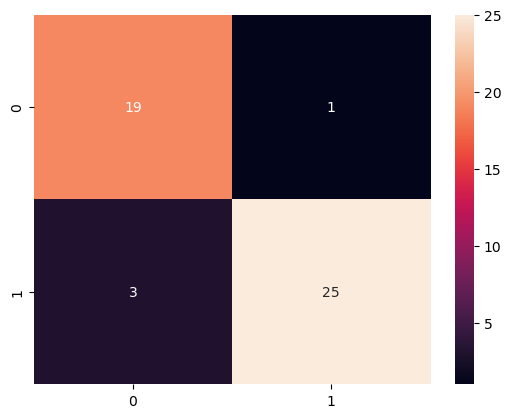

In [52]:
# matriz de confusión: Los falsos positivos y falsos negativos no representan una cantidad significativa
sns.heatmap(confusion_matrix(y_test,preds_nn), annot=True)

### Buscando los mejores parámetros para SVC

In [53]:
# creando una instancia de SVC
model_svc2 = SVC()

In [54]:
# grilla de parámetros a buscar
# C es un parámetro de regularización que indica el grado de penalización por clasificaciones erróneas
# kernel es una función que cuantifica la similitud de dos observaciones
# gamma es el coeficiente del kernel
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10],
    'kernel': ['linear', 'rbf', ],
    'gamma': ['auto', 'scale']
}

In [55]:
# creando la grilla de búsqueda de hiperparámetros
grid_svc = GridSearchCV(model_svc2, param_grid, cv=5, verbose=1)

In [56]:
# entrenando el modelo de grilla
grid_svc.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10],
                         'gamma': ['auto', 'scale'],
                         'kernel': ['linear', 'rbf']},
             verbose=1)

In [57]:
# obteniendo el mejor resultado del modelo
grid_svc.best_score_

0.9238916256157635

In [58]:
# obteniendo los mejores parámetros
# el unico valor que ha cambiado del modelo por defecto es el de gamma de scale a auto
grid_svc.best_params_

{'C': 1, 'gamma': 'auto', 'kernel': 'rbf'}

In [59]:
# obtenemos el mismo resultado que el modelo por defecto
grid_svc.score(X_test, y_test)

0.9166666666666666

In [60]:
# obteniendo las predicciones sobre datos de prueba
preds_svc = grid_svc.predict(X_test)

In [61]:
# classification report del modelo 
print(classification_report(y_test,preds_svc))

              precision    recall  f1-score   support

           0       0.86      0.95      0.90        20
           1       0.96      0.89      0.93        28

    accuracy                           0.92        48
   macro avg       0.91      0.92      0.92        48
weighted avg       0.92      0.92      0.92        48



<AxesSubplot: >

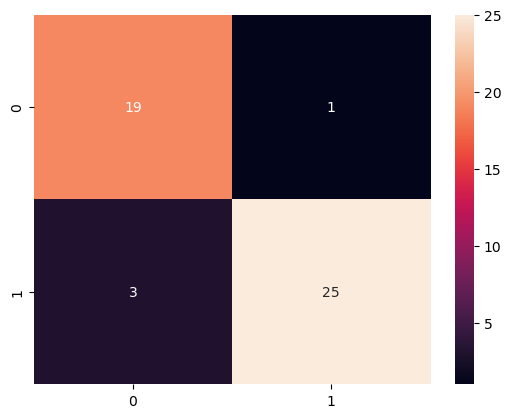

In [62]:
# matriz de correlaciones
# observe que son los mismos resultados que el modelo neuronal
sns.heatmap(confusion_matrix(y_test,preds_svc), annot=True)

### 7. Cross-Validation

In [63]:
# haremos un modelo con los hiperparámetros para
# analizar el accuracy usando cross-validation
from sklearn.model_selection import cross_val_score

In [64]:
# modelo final de redes neuronales
final_model_nn = MLPClassifier(
    activation= 'relu',
    alpha= 0.0001,
    beta_1= 0.9,
    beta_2= 0.999,
    early_stopping= False,
    epsilon= 1e-08,
    hidden_layer_sizes= 500,
    learning_rate= 'constant',
    learning_rate_init= 0.001,
    max_iter= 300,
    random_state= 1,
    solver= 'adam',
    verbose= True
)

In [70]:
# puntajes del modelo con cross validation
# se escalan nuevamente los datos ya que X no había sido escalado
scores = cross_val_score(final_model_nn,scaler.transform(X), y, verbose=0)
scores

Iteration 1, loss = 0.68892106
Iteration 2, loss = 0.65172070
Iteration 3, loss = 0.61759704
Iteration 4, loss = 0.58647449
Iteration 5, loss = 0.55816262
Iteration 6, loss = 0.53241362
Iteration 7, loss = 0.50894560
Iteration 8, loss = 0.48750950
Iteration 9, loss = 0.46785450
Iteration 10, loss = 0.44976471
Iteration 11, loss = 0.43303549
Iteration 12, loss = 0.41748272
Iteration 13, loss = 0.40294839
Iteration 14, loss = 0.38933082
Iteration 15, loss = 0.37653262
Iteration 16, loss = 0.36446414
Iteration 17, loss = 0.35304609
Iteration 18, loss = 0.34222029
Iteration 19, loss = 0.33193594
Iteration 20, loss = 0.32214024
Iteration 21, loss = 0.31278610
Iteration 22, loss = 0.30383476
Iteration 23, loss = 0.29526325
Iteration 24, loss = 0.28704528
Iteration 25, loss = 0.27915851
Iteration 26, loss = 0.27158386
Iteration 27, loss = 0.26430961
Iteration 28, loss = 0.25731834
Iteration 29, loss = 0.25059053
Iteration 30, loss = 0.24411658
Iteration 31, loss = 0.23787840
Iteration 32, los

Iteration 274, loss = 0.01279144
Iteration 275, loss = 0.01268942
Iteration 276, loss = 0.01258772
Iteration 277, loss = 0.01248736
Iteration 278, loss = 0.01238885
Iteration 279, loss = 0.01229157
Iteration 280, loss = 0.01219474
Iteration 281, loss = 0.01209887
Iteration 282, loss = 0.01200424
Iteration 283, loss = 0.01191070
Iteration 284, loss = 0.01181853
Iteration 285, loss = 0.01172714
Iteration 286, loss = 0.01163638
Iteration 287, loss = 0.01154568
Iteration 288, loss = 0.01145626
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 0.67930571
Iteration 2, loss = 0.64295600
Iteration 3, loss = 0.60963242
Iteration 4, loss = 0.57930532
Iteration 5, loss = 0.55173554
Iteration 6, loss = 0.52671791
Iteration 7, loss = 0.50401736
Iteration 8, loss = 0.48340328
Iteration 9, loss = 0.46464019
Iteration 10, loss = 0.44751130
Iteration 11, loss = 0.43178243
Iteration 12, loss = 0.41727889
Iteration 13, loss = 0.40386286
Iteratio

Iteration 253, loss = 0.02107898
Iteration 254, loss = 0.02090776
Iteration 255, loss = 0.02073752
Iteration 256, loss = 0.02056917
Iteration 257, loss = 0.02040256
Iteration 258, loss = 0.02023723
Iteration 259, loss = 0.02007451
Iteration 260, loss = 0.01991400
Iteration 261, loss = 0.01975360
Iteration 262, loss = 0.01959499
Iteration 263, loss = 0.01943848
Iteration 264, loss = 0.01928316
Iteration 265, loss = 0.01913007
Iteration 266, loss = 0.01897862
Iteration 267, loss = 0.01882923
Iteration 268, loss = 0.01868007
Iteration 269, loss = 0.01853352
Iteration 270, loss = 0.01838840
Iteration 271, loss = 0.01824617
Iteration 272, loss = 0.01810491
Iteration 273, loss = 0.01796592
Iteration 274, loss = 0.01782799
Iteration 275, loss = 0.01769123
Iteration 276, loss = 0.01755593
Iteration 277, loss = 0.01742196
Iteration 278, loss = 0.01728975
Iteration 279, loss = 0.01715781
Iteration 280, loss = 0.01702812
Iteration 281, loss = 0.01689917
Iteration 282, loss = 0.01677144
Iteration 

/Users/joelorellana/anaconda3/envs/ML/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 98, loss = 0.08870385
Iteration 99, loss = 0.08765513
Iteration 100, loss = 0.08662198
Iteration 101, loss = 0.08560831
Iteration 102, loss = 0.08461579
Iteration 103, loss = 0.08364121
Iteration 104, loss = 0.08268146
Iteration 105, loss = 0.08173587
Iteration 106, loss = 0.08080519
Iteration 107, loss = 0.07988887
Iteration 108, loss = 0.07898640
Iteration 109, loss = 0.07810019
Iteration 110, loss = 0.07722850
Iteration 111, loss = 0.07637023
Iteration 112, loss = 0.07552457
Iteration 113, loss = 0.07469220
Iteration 114, loss = 0.07387621
Iteration 115, loss = 0.07307254
Iteration 116, loss = 0.07227978
Iteration 117, loss = 0.07149812
Iteration 118, loss = 0.07072801
Iteration 119, loss = 0.06996920
Iteration 120, loss = 0.06922084
Iteration 121, loss = 0.06848207
Iteration 122, loss = 0.06775537
Iteration 123, loss = 0.06704016
Iteration 124, loss = 0.06633468
Iteration 125, loss = 0.06563939
Iteration 126, loss = 0.06495685
Iteration 127, loss = 0.06428296
Iteration 12

/Users/joelorellana/anaconda3/envs/ML/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 78, loss = 0.13447940
Iteration 79, loss = 0.13301445
Iteration 80, loss = 0.13157221
Iteration 81, loss = 0.13015330
Iteration 82, loss = 0.12875482
Iteration 83, loss = 0.12737554
Iteration 84, loss = 0.12601844
Iteration 85, loss = 0.12468490
Iteration 86, loss = 0.12336925
Iteration 87, loss = 0.12207012
Iteration 88, loss = 0.12078887
Iteration 89, loss = 0.11953055
Iteration 90, loss = 0.11828967
Iteration 91, loss = 0.11706650
Iteration 92, loss = 0.11586441
Iteration 93, loss = 0.11467869
Iteration 94, loss = 0.11350815
Iteration 95, loss = 0.11235513
Iteration 96, loss = 0.11121832
Iteration 97, loss = 0.11009869
Iteration 98, loss = 0.10899394
Iteration 99, loss = 0.10790682
Iteration 100, loss = 0.10683643
Iteration 101, loss = 0.10578134
Iteration 102, loss = 0.10473739
Iteration 103, loss = 0.10370757
Iteration 104, loss = 0.10268796
Iteration 105, loss = 0.10167932
Iteration 106, loss = 0.10068398
Iteration 107, loss = 0.09970146
Iteration 108, loss = 0.09873494

/Users/joelorellana/anaconda3/envs/ML/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 13, loss = 0.42076258
Iteration 14, loss = 0.40782223
Iteration 15, loss = 0.39567232
Iteration 16, loss = 0.38424655
Iteration 17, loss = 0.37346827
Iteration 18, loss = 0.36328836
Iteration 19, loss = 0.35366017
Iteration 20, loss = 0.34452427
Iteration 21, loss = 0.33584404
Iteration 22, loss = 0.32758547
Iteration 23, loss = 0.31971955
Iteration 24, loss = 0.31221490
Iteration 25, loss = 0.30505617
Iteration 26, loss = 0.29821796
Iteration 27, loss = 0.29167241
Iteration 28, loss = 0.28539800
Iteration 29, loss = 0.27937703
Iteration 30, loss = 0.27359537
Iteration 31, loss = 0.26804873
Iteration 32, loss = 0.26272710
Iteration 33, loss = 0.25761513
Iteration 34, loss = 0.25269400
Iteration 35, loss = 0.24795536
Iteration 36, loss = 0.24338673
Iteration 37, loss = 0.23898417
Iteration 38, loss = 0.23474304
Iteration 39, loss = 0.23064883
Iteration 40, loss = 0.22669433
Iteration 41, loss = 0.22286966
Iteration 42, loss = 0.21917927
Iteration 43, loss = 0.21561819
Iteratio

Iteration 293, loss = 0.02020214
Iteration 294, loss = 0.02005374
Iteration 295, loss = 0.01990801
Iteration 296, loss = 0.01976342
Iteration 297, loss = 0.01962091
Iteration 298, loss = 0.01947839
Iteration 299, loss = 0.01933837
Iteration 300, loss = 0.01919958


/Users/joelorellana/anaconda3/envs/ML/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


array([0.84615385, 0.8974359 , 0.86842105, 0.94736842, 0.94736842])

In [66]:
# puntaje promedio usando cross-validation
# un 90% de accuracy se considera aceptable
scores.mean()

0.9013495276653171

### Cross_Val con el modelo final de SVC

In [67]:
# creando modelo final con hiperparámetros de support vector classifier
final_model_svc = SVC(
    C= 1,
    gamma= 'auto',
    kernel= 'rbf'
)

In [68]:
# obteniendo los scores de validación cruzada
scores = cross_val_score(final_model_svc,scaler.transform(X), y)
scores

array([0.87179487, 0.94871795, 0.89473684, 0.92105263, 0.97368421])

In [69]:
# promedio de accuracy, observe que es incluso mejor que el modelo de redes neuronales
scores.mean()

0.9219973009446694

### 8. Conclusiones finales

1. Ambos módelos alcanzan una cantidad mayor al 90%, su matriz de confusión es igual, sin embargo, en la validacion cruzada, el mejor modelo es el support vector classifier. Por lo que ambos módelos son útiles para predecir la variable liked

2. El mejoramiento por hiperparámetros no mostró una mejora significativa en los modelos con parámetros por defecto para SVC, pero sí para redes neuronales.

3. Se necesitan más datos para formar un modelo de clasificación con mejores métricas, pero, hemos obtenido valores aceptables.

4. Aunque no se muestra en el notebook, el efecto de eliminar la columna "instrumentalness" no mejora los resultados.